Nutrient Estimation

The code calculates aeverage relectance, interpolates the 1nm reflectance to 10nm and computes first derivatives. The code also exports derivative data to excel file.



**We begin by importing relevant packages**

In [ ]:

##operational packages

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

##visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Mounted at /content/gdrive


#Loading Data into Google Colab

***We want to load the excel book and call each worksheet.
This saves us time from saving each worksheet seperately as a .csv file***

If you want to do instrument offset correction, you can do them before uploading the excel sheet. Also,before uploading the data, make sure to remove the bands with atmospheric noise. I have a seperate code the corrects the instrument offset

In [ ]:
VPCA = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/Corrected_Spring24_Data/VPCA_Scores.xlsx')
scores = pd.read_excel(VPCA, 'VPCA_Scores')

In [ ]:
scores

Sample   sample type  6VPCA Score 1  6VPCA Score 2  6VPCA Score 3  \
0       KB-5      Corn Res        0.58711        1.45673       -0.78512   
1       KB-3      Corn Res        0.47937        1.42302       -0.83547   
2       KB-1      Corn Res        0.51947        1.47856       -0.84628   
3       JB-5      Corn Res        0.22135        0.59156       -0.27654   
4       JB-4      Corn Res       -0.36003       -0.36478       -1.54492   
..       ...           ...            ...            ...            ...   
57   JanD-S9        Weeds        -0.20803       -1.18310        0.10094   
58  ZachA-12        Wheat        -0.18920       -1.28749       -0.23878   
59  ZachA-11        Wheat        -7.21512        1.88189        1.33297   
60      KB-5        Wheat        -0.26773       -1.34868       -0.64563   
61      KB-5  Drying Wheat       -0.14781       -0.75104       -0.69937   

    6VPCA Score 4  6VPCA Score 5  6VPCA Score 6  
0         0.95528        0.85001        1.35848  
1         1.16594        0.95517        0.77655  
2         1.32242        1.13929        0.74541  
3        -0.63017        0.09259        0.34682  
4        -1.79321       -1.13306        0.53164  
..            ...            ...            ...  
57        0.00556        1.22714        0.34596  
58        0.01147        0.45827        0.27256  
59        0.51429        0.75214        0.61856  
60       -0.80697        0.61665        0.38074  
61        0.26585       -2.86606        0.51895  

[62 rows x 8 columns]

In [ ]:
nutrients = pd.ExcelFile('/content/gdrive/MyDrive/Spring_2023_Field_Data_Processing/New_10D_spring_2023/Soil Nutrients spring 2023.xlsx')

In [ ]:
soil_nutrients = pd.read_excel(nutrients , "Sheet1")
soil_nutrients

soil sample id Sample date site initials soil type code location name  \
0             1001  2023-04-19         JDcol       Soil CcC     HWHF22_06   
1             1002  2023-04-19         JDcol       Soil CcC     HWHF22_06   
2             1003  2023-04-19         JDcol       Soil CcC     HWHF22_07   
3             1004  2023-04-19         JDcol       Soil CcC     HWHF22_07   
4             1005  2023-04-19         JDcol       Soil CcC     HWHF22_08   
..             ...         ...           ...            ...           ...   
210       SS21_136         NaT      RF WOODS            NaN           NaN   
211       SS21_137         NaT      RF WOODS            NaN           NaN   
212       SS21_138         NaT      RF WOODS            NaN           NaN   
213       SS21_139         NaT      RF WOODS            NaN           NaN   
214       SS21_140         NaT      RF WOODS            NaN           NaN   

     Unnamed: 5    depth max soil sample depth (cm)        %N        %C  ...  \
0           NaN  shallow                         15  0.172788  2.074065  ...   
1           NaN     deep                         30  0.076982  0.935711  ...   
2           NaN  shallow                         15  0.162039  1.828898  ...   
3           NaN     deep                         30  0.073627  0.878283  ...   
4           NaN  shallow                         15   0.16772  1.940012  ...   
..          ...      ...                        ...       ...       ...  ...   
210        30.0     deep                        NaN  0.112036  1.399425  ...   
211        15.0  shallow                        NaN  0.218071  2.565202  ...   
212        30.0     deep                        NaN  0.089919  1.091988  ...   
213        15.0  shallow                        NaN  0.292636  2.955299  ...   
214        30.0     deep                        NaN  0.077334  0.761685  ...   

        Fe    K     Mg     Mn     Mo     Na     P      S      Zn  \
0    21620  1473  2498   1607  1.423  149.1  667.6  239.8  90.14   
1    22340  1349  2464  874.3  1.363    114    376  108.4  67.46   
2    21230  1351  2531   1011  1.486  135.3  556.2  201.2  77.78   
3    20010  1254  2485  829.8  1.082  146.3  422.3  108.8  67.03   
4    22930  1202  2529   1311  1.325  170.1  693.1  218.1  78.74   
..     ...   ...   ...    ...    ...    ...    ...    ...    ...   
210    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
211    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
212    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
213    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
214    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   

    THESE ARE "TOTAL NUTRIENTS" DIGESTION/ICIP; NOT meihlich3/icp plant available  
0                                                  NaN                             
1                                                  NaN                             
2                                                  NaN                             
3                                                  NaN                             
4                                                  NaN                             
..                                                 ...                             
210                                                NaN                             
211                                                NaN                             
212                                                NaN                             
213                                                NaN                             
214                                                NaN                             

[215 rows x 24 columns]

In [ ]:
JD = soil_nutrients[soil_nutrients['site initials'].str.contains('JDcol')]
JD_shallow =  JD[JD['depth'].str.contains('shallow')]
JD_shallow_subset = JD_shallow[0:5]
JD_shallow_subset

soil sample id Sample date site initials soil type code location name  \
0           1001  2023-04-19         JDcol       Soil CcC     HWHF22_06   
2           1003  2023-04-19         JDcol       Soil CcC     HWHF22_07   
4           1005  2023-04-19         JDcol       Soil CcC     HWHF22_08   
6           1007  2023-04-19         JDcol       Soil CcC     HWHF22_09   
8           1009  2023-04-19         JDcol       Soil CcB     HWHF22_10   

   Unnamed: 5    depth max soil sample depth (cm)        %N        %C  ...  \
0         NaN  shallow                         15  0.172788  2.074065  ...   
2         NaN  shallow                         15  0.162039  1.828898  ...   
4         NaN  shallow                         15   0.16772  1.940012  ...   
6         NaN  shallow                         15   0.17725  2.087645  ...   
8         NaN  shallow                         15  0.153691  1.891964  ...   

      Fe    K     Mg    Mn     Mo     Na     P      S      Zn  \
0  21620  1473  2498  1607  1.423  149.1  667.6  239.8  90.14   
2  21230  1351  2531  1011  1.486  135.3  556.2  201.2  77.78   
4  22930  1202  2529  1311  1.325  170.1  693.1  218.1  78.74   
6  20950  1551  2584  2040  1.545    146  724.7  224.5  86.27   
8  20410  1438  2544  1320  1.285  132.6  636.5  208.5  74.34   

  THESE ARE "TOTAL NUTRIENTS" DIGESTION/ICIP; NOT meihlich3/icp plant available  
0                                                NaN                             
2                                                NaN                             
4                                                NaN                             
6                                                NaN                             
8                                                NaN                             

[5 rows x 24 columns]

In [ ]:
LynnW = soil_nutrients[soil_nutrients['site initials'].str.contains('LW')]
LynnW_shallow =  LynnW[LynnW['depth'].str.contains('shallow')]
LynnW_shallow

soil sample id Sample date site initials soil type code location name  \
10           1011  2023-04-26            LW       Soil ReB     HWHF22_01   
12           1013  2023-04-26            LW       Soil ReB     HWHF22_02   
14           1015  2023-04-26            LW       Soil WaB     HWHF22_03   
16           1017  2023-04-26            LW       Soil WaB     HWHF22_04   
18           1019  2023-04-26            LW       Soil WaB     HWHF22_05   

    Unnamed: 5    depth max soil sample depth (cm)        %N        %C  ...  \
10         NaN  shallow                         15  0.188487  2.045878  ...   
12         NaN  shallow                         15  0.212801   2.30806  ...   
14         NaN  shallow                         15  0.214617  2.341782  ...   
16         NaN  shallow                         15  0.237412  2.498699  ...   
18         NaN  shallow                         15  0.216933  2.246912  ...   

       Fe    K     Mg     Mn      Mo     Na     P      S      Zn  \
10  19510  1835  2845  766.5   1.298  97.91  651.2  277.3  69.07   
12  15620  1376  2419  656.5  0.9858  92.44  538.4  269.9   54.1   
14  17970  1749  2809  590.1  0.9259  93.63  539.9  251.2  57.82   
16  22120  1986  2949   1190   1.636  109.3  707.5  322.1  59.29   
18  22900  2190  3112   1712   1.555  133.6    688  283.4  69.94   

   THESE ARE "TOTAL NUTRIENTS" DIGESTION/ICIP; NOT meihlich3/icp plant available  
10                                                NaN                             
12                                                NaN                             
14                                                NaN                             
16                                                NaN                             
18                                                NaN                             

[5 rows x 24 columns]

In [ ]:
JB = soil_nutrients[soil_nutrients['site initials'].str.contains('JB')]
JB_shallow =  JB[JB['depth'].str.contains('shallow')][0:5]
JB_shallow


soil sample id Sample date site initials soil type code location name  \
30           1031  2023-05-22            JB       Soil CdB     HWHF22_21   
32           1033  2023-05-22            JB       Soil CdB     HWHF22_22   
34           1035  2023-05-22            JB       Soil CdB     HWHF22_23   
36           1037  2023-05-22            JB       Soil CdB     HWHF22_24   
38           1039  2023-05-22            JB       Soil CdB     HWHF22_25   

    Unnamed: 5    depth max soil sample depth (cm)        %N        %C  ...  \
30         NaN  shallow                         15  0.118419   1.43893  ...   
32         NaN  shallow                         15  0.105754  1.364152  ...   
34         NaN  shallow                         15  0.127393  1.424687  ...   
36         NaN  shallow                         15  0.104404  1.307025  ...   
38         NaN  shallow                         15   0.12718  1.507939  ...   

       Fe    K     Mg     Mn     Mo     Na     P      S      Zn  \
30  20450  1276  2413   1046  2.073  118.9  530.2  180.4  68.83   
32  20930  1240  2334   1050  2.206  113.3  443.1  164.5  62.78   
34  22400  1481  2718  814.3   2.75  105.3    487  174.1  68.23   
36  19450   997  2106  940.9  3.244  112.2  434.6  150.6  59.86   
38  19210  1212  2639  573.9  1.964  98.71    420  180.4  62.86   

   THESE ARE "TOTAL NUTRIENTS" DIGESTION/ICIP; NOT meihlich3/icp plant available  
30                                                NaN                             
32                                                NaN                             
34                                                NaN                             
36                                                NaN                             
38                                                NaN                             

[5 rows x 24 columns]

In [ ]:
KB = soil_nutrients[soil_nutrients['site initials'].str.contains('KB')]
KB_shallow =  KB[KB['depth'].str.contains('shallow')][0:5]
KB_shallow


soil sample id Sample date site initials soil type code location name  \
40           1041  2023-05-22            KB       Soil CdB     HWHF22_26   
42           1043  2023-05-22            KB       Soil CdB     HWHF22_27   
44           1045  2023-05-22            KB       Soil CdB     HWHF22_28   
46           1047  2023-05-22            KB       Soil CdB     HWHF22_29   
48           1049  2023-05-22            KB       Soil CdB     HWHF22_30   

    Unnamed: 5    depth max soil sample depth (cm)        %N        %C  ...  \
40         NaN  shallow                         15  0.202028  2.405326  ...   
42         NaN  shallow                         15  0.247813  2.647091  ...   
44         NaN  shallow                         15  0.297025  3.057169  ...   
46         NaN  shallow                         15  0.215263  2.269842  ...   
48         NaN  shallow                         15  0.255589  2.629215  ...   

       Fe    K     Mg     Mn     Mo     Na     P      S      Zn  \
40  20240  1562  2257   1114  2.064  120.7   1110  276.7  97.24   
42  19040  1657  2259   1082  2.051  114.2   1106  305.4  95.27   
44  19000  1516  2134  803.9  2.414   89.5   1141  324.7  91.83   
46  22410  1867  2526  665.7  2.358  93.67  875.7  286.8  100.3   
48  21040  1450  2323  928.9  3.693    103   1087  307.6  97.01   

   THESE ARE "TOTAL NUTRIENTS" DIGESTION/ICIP; NOT meihlich3/icp plant available  
40                                                NaN                             
42                                                NaN                             
44                                                NaN                             
46                                                NaN                             
48                                                NaN                             

[5 rows x 24 columns]

In [ ]:
KB_shallow[' Ca']

40    2070
42    2417
44    2596
46    2291
48    2881
Name:  Ca, dtype: object

In [ ]:
LynnW_score = scores[scores['Sample'].str.contains('Lynn')]
LynnW_score

Sample sample type  6VPCA Score 1  6VPCA Score 2  6VPCA Score 3  \
11  LynnW-5    CornRes         0.13039        0.47146       -1.06606   
12  LynnW-4    CornRes         0.58994        1.16021       -0.71404   
13  LynnW-3    CornRes         0.39453        0.93831       -0.94355   
14  LynnW-2    CornRes         0.02326        0.36264       -1.17524   
15  LynnW-1    CornRes         0.79962        1.08088        0.03101   
30  LynnW-5       Soil        -0.03934        0.17518       -0.63764   
31  LynnW-4       Soil        -0.04935        0.14814       -0.59636   
32  LynnW-3       Soil        -0.12356        0.11297       -0.57648   
33  LynnW-2       Soil        -0.06290        0.09099       -0.73817   
34  LynnW-1       Soil         0.45344        0.49939        0.77485   

    6VPCA Score 4  6VPCA Score 5  6VPCA Score 6  
11       -0.41610        0.06507        0.18301  
12        0.52023        1.66768       -1.04353  
13        0.02916        0.77398        0.59516  
14       -0.62427        0.04059        0.55469  
15        0.04077        1.19361       -1.85869  
30       -0.48317       -0.99343       -0.25075  
31       -0.55109       -0.23841       -1.18819  
32       -0.91078        0.14304       -1.42339  
33       -0.32865       -1.09834       -0.64372  
34        0.17617       -0.80337       -2.83282

In [ ]:
JD_score = scores[scores['Sample'].str.contains('Jan')]
JD_score

Sample sample type  6VPCA Score 1  6VPCA Score 2  6VPCA Score 3  \
8    JanD-S9    Corn Res        0.26717        0.69057       -0.86472   
9    JanD-S8    Corn Res        0.79154        1.46062       -0.46650   
10   JanD-S6   Corn Rewd        0.69243        1.08887       -0.43473   
25   JanD-S8   Bare Soil        0.03192        0.64042       -0.81841   
50   JanD-S6       Weed         0.04317       -1.23126        0.60679   
51   JanD-S6      Weed 2        0.28172       -1.57183        1.91510   
52   JanD-S6      Weed 3        0.02569       -2.00416        1.48579   
56  JanD-S10      Weeds        -0.16037       -0.77824       -0.10602   
57   JanD-S9      Weeds        -0.20803       -1.18310        0.10094   

    6VPCA Score 4  6VPCA Score 5  6VPCA Score 6  
8         0.33886        0.03211        0.98996  
9         0.25406        0.10170        2.98642  
10        0.43256        0.31608        2.43502  
25        0.35069       -0.38309       -0.13945  
50        0.77980        0.03040        0.55147  
51        2.72241       -1.20414        0.79381  
52        1.74496        0.61252        1.07818  
56        0.06051        0.77434        0.44745  
57        0.00556        1.22714        0.34596

In [ ]:
ZK_score = scores[scores['Sample'].str.contains('Zach')]
ZK = ZK_score[ZK_score['sample type'].str.contains('o')].sort_values(by = 'Sample', ascending =True)
ZK

Sample sample type  6VPCA Score 1  6VPCA Score 2  6VPCA Score 3  \
29  ZachA-11       Soil        -1.10787        0.18996       -0.20594   
23  ZachA-12       Road        -0.15460       -1.26814       -0.35687   
28  ZachA-13       Soil         0.02198        0.07955        0.29294   
27  ZachA-14       Soil         0.21687        0.50350        1.05752   
26  ZachA-15       Soil         0.30610        0.43203        1.04386   

    6VPCA Score 4  6VPCA Score 5  6VPCA Score 6  
29       -0.66953       -3.02616       -0.42628  
23       -0.11656        0.76114       -0.35351  
28       -1.37950        0.17003       -1.26736  
27       -1.10075        0.57432       -1.13913  
26       -1.45887        0.59110       -1.13809

In [ ]:
ZK_n = soil_nutrients[soil_nutrients['site initials'].str.contains('ZA')]
ZK_n_shallow =  ZK_n[ZK_n['depth'].str.contains('shallow')][0:5]
ZK_n_shallow


soil sample id Sample date site initials soil type code location name  \
20           1021  2023-04-26            ZA       Soil CdB     HWHF22_11   
22           1023  2023-04-26            ZA       Soil CdB     HWHF22_12   
24           1025  2023-04-26            ZA       Soil ReB     HWHF22_13   
26           1027  2023-04-26            ZA       Soil ReB     HWHF22_14   
28           1029  2023-04-26            ZA       Soil CdB     HWHF22_15   

    Unnamed: 5    depth max soil sample depth (cm)        %N        %C  ...  \
20         NaN  shallow                         15  0.362453  3.411606  ...   
22         NaN  shallow                         15    0.2512  2.471185  ...   
24         NaN  shallow                         15  0.146495   1.83589  ...   
26         NaN  shallow                         15  0.162385  1.915844  ...   
28         NaN  shallow                         15  0.153059  1.877914  ...   

       Fe    K     Mg     Mn     Mo     Na     P      S      Zn  \
20  15790  1405  1992  678.9  1.361   77.4   1147  336.7  76.06   
22  15390  1456  2313  768.1  1.293  91.64  815.7  285.4  73.05   
24  24060  1313  2202   1560  1.701  117.7  740.4    203  67.53   
26  26630  1301  2320   1058  3.071   92.2  605.4  223.3  68.05   
28  20720  1211  2312  670.1  1.269  99.19    643    195  69.96   

   THESE ARE "TOTAL NUTRIENTS" DIGESTION/ICIP; NOT meihlich3/icp plant available  
20                                                NaN                             
22                                                NaN                             
24                                                NaN                             
26                                                NaN                             
28                                                NaN                             

[5 rows x 24 columns]

In [ ]:
JB_score = scores[scores['Sample'].str.contains('JB')]
JB_score

Sample  sample type  6VPCA Score 1  6VPCA Score 2  6VPCA Score 3  \
3       JB-5     Corn Res        0.22135        0.59156       -0.27654   
4       JB-4     Corn Res       -0.36003       -0.36478       -1.54492   
5       JB-3     Corn Res        0.10088        0.33024       -0.12889   
6       JB-2     Corn Res        0.68073        0.99558        1.91077   
7       JB-1     Corn Res        0.71224        1.24818        0.79963   
17  JB-Grass  Grass Filt        -0.24803       -1.43721       -0.31468   
24      JB-0        Road         0.82569        0.55711        1.75469   
44      JB-5        Soil         0.33195        0.37671        1.08634   
45      JB-4        Soil         0.48866        0.49995        1.99945   
46      JB-3        Soil        -0.30734       -0.32592       -1.19419   
47      JB-2        Soil         0.69563        0.95687        2.47929   
48      JB-1        Soil         0.69685        0.97202        2.78105   
49      JB-1    Soya Bean        0.34731       -0.34267        1.67154   

    6VPCA Score 4  6VPCA Score 5  6VPCA Score 6  
3        -0.63017        0.09259        0.34682  
4        -1.79321       -1.13306        0.53164  
5        -0.98110       -0.49311        0.21719  
6        -0.37851        0.29252       -0.04124  
7         0.21658        0.96426        0.23944  
17       -0.63768        1.22855        0.29335  
24       -0.35000       -2.29446        2.39378  
44       -1.02188       -1.07993        0.21160  
45       -0.81329       -1.53388        0.30797  
46       -1.84323       -1.14022        0.39229  
47       -0.66567        0.13843       -0.20964  
48       -0.76941        0.22750       -0.39316  
49       -0.59478        0.44177        0.38146

In [ ]:
JB_score_soil = JB_score[JB_score['sample type'].str.contains('Soil')].sort_values(by='Sample', ascending = True)
JB_score_soil

Sample sample type  6VPCA Score 1  6VPCA Score 2  6VPCA Score 3  \
48   JB-1       Soil         0.69685        0.97202        2.78105   
47   JB-2       Soil         0.69563        0.95687        2.47929   
46   JB-3       Soil        -0.30734       -0.32592       -1.19419   
45   JB-4       Soil         0.48866        0.49995        1.99945   
44   JB-5       Soil         0.33195        0.37671        1.08634   

    6VPCA Score 4  6VPCA Score 5  6VPCA Score 6  
48       -0.76941        0.22750       -0.39316  
47       -0.66567        0.13843       -0.20964  
46       -1.84323       -1.14022        0.39229  
45       -0.81329       -1.53388        0.30797  
44       -1.02188       -1.07993        0.21160

In [ ]:
SK_score = scores[scores['Sample'].str.contains('SK')]
SK_score

Sample sample type  6VPCA Score 1  6VPCA Score 2  6VPCA Score 3  \
18   SK-5      Grass        -0.20154       -1.63808       -0.08945   
19   SK-4      Grass        -0.10447       -1.75455        0.28321   
20   SK-3      Grass        -0.17191       -1.62548       -0.25792   
21   SK-2      Grass        -0.28412       -1.36299       -0.57340   
22   SK-1      Grass        -0.26351       -1.43892       -0.41211   
35   SK-5       Soil        -0.07686       -0.31692       -0.33524   
36   SK-4       Soil        -0.02377        0.09830       -0.24788   
37   SK-3       Soil         0.15137        0.19895       -0.04729   
38   SK-2       Soil        -0.04729       -0.53887       -0.47901   
39   SK-1       Soil        -0.23491        0.02016       -1.08362   

    6VPCA Score 4  6VPCA Score 5  6VPCA Score 6  
18       -0.04205        0.75973        0.18793  
19        0.63363        0.82836       -0.11966  
20       -0.07938        0.48653        0.12025  
21       -0.50372        0.20397        0.32225  
22       -0.44106        0.52328        0.27347  
35        1.19890       -0.29101       -0.82981  
36        1.81853       -1.07998       -1.15046  
37        3.72846       -1.37945       -1.74569  
38        1.49406       -0.91579       -1.06076  
39        0.26146       -0.91090       -0.88448

In [ ]:
SK_score_soil = SK_score[SK_score['sample type'].str.contains('Soil')].sort_values(by='Sample', ascending = True)
SK_score_soil

Sample sample type  6VPCA Score 1  6VPCA Score 2  6VPCA Score 3  \
39   SK-1       Soil        -0.23491        0.02016       -1.08362   
38   SK-2       Soil        -0.04729       -0.53887       -0.47901   
37   SK-3       Soil         0.15137        0.19895       -0.04729   
36   SK-4       Soil        -0.02377        0.09830       -0.24788   
35   SK-5       Soil        -0.07686       -0.31692       -0.33524   

    6VPCA Score 4  6VPCA Score 5  6VPCA Score 6  
39        0.26146       -0.91090       -0.88448  
38        1.49406       -0.91579       -1.06076  
37        3.72846       -1.37945       -1.74569  
36        1.81853       -1.07998       -1.15046  
35        1.19890       -0.29101       -0.82981

In [ ]:
KB_score = scores[scores['Sample'].str.contains('KB')]
KB_score
KB_score_soil = KB_score[KB_score['sample type'].str.contains('Soil')].sort_values(by='Sample', ascending = True)
KB_score_soil

Sample sample type  6VPCA Score 1  6VPCA Score 2  6VPCA Score 3  \
43   KB-1       Soil         0.01915        0.72211       -0.73923   
42   KB-3       Soil         0.18556        0.97270       -0.23655   
41   KB-4       Soil        -0.19888        0.03979       -0.94479   
40   KB-5       Soil         0.03470        0.70528       -0.88410   

    6VPCA Score 4  6VPCA Score 5  6VPCA Score 6  
43        0.48231        0.63664       -0.94430  
42        0.55060        0.80060       -0.77671  
41       -1.09063       -0.37563       -0.25845  
40        0.37965        0.57783       -0.70456

In [ ]:
LynnW_score_soil = LynnW_score[LynnW_score['sample type'].str.contains('Soil')].sort_values(by='Sample', ascending = True)
LynnW_score_soil

Sample sample type  6VPCA Score 1  6VPCA Score 2  6VPCA Score 3  \
34  LynnW-1       Soil         0.45344        0.49939        0.77485   
33  LynnW-2       Soil        -0.06290        0.09099       -0.73817   
32  LynnW-3       Soil        -0.12356        0.11297       -0.57648   
31  LynnW-4       Soil        -0.04935        0.14814       -0.59636   
30  LynnW-5       Soil        -0.03934        0.17518       -0.63764   

    6VPCA Score 4  6VPCA Score 5  6VPCA Score 6  
34        0.17617       -0.80337       -2.83282  
33       -0.32865       -1.09834       -0.64372  
32       -0.91078        0.14304       -1.42339  
31       -0.55109       -0.23841       -1.18819  
30       -0.48317       -0.99343       -0.25075

In [ ]:
SK = soil_nutrients[soil_nutrients['site initials'].str.contains('SK')]
SK_shallow =  SK[SK['depth'].str.contains('shallow')][0:5]
SK_shallow


soil sample id Sample date site initials soil type code location name  \
50           1051  2023-05-24            SK       Soil CdB     HWHF22_31   
52           1053  2023-05-24            SK       Soil CdB     HWHF22_32   
54           1055  2023-05-24            SK       Soil CdB     HWHF22_33   
56           1057  2023-05-24            SK       Soil CdB     HWHF22_34   
58           1059  2023-05-24            SK       Soil CdB     HWHF22_35   

    Unnamed: 5    depth max soil sample depth (cm)        %N        %C  ...  \
50         NaN  shallow                         15  0.240906  2.736293  ...   
52         NaN  shallow                         15  0.268734  2.880688  ...   
54         NaN  shallow                         15  0.204062  2.307436  ...   
56         NaN  shallow                         15  0.246382  2.749396  ...   
58         NaN  shallow                         15  0.229665  2.491531  ...   

       Fe     K     Mg    Mn     Mo     Na     P      S      Zn  \
50  19340   1049  2720  1312  2.205  165.1  734.8  286.9  74.27   
52  21410   1129  2625  1307  1.851  157.2  783.9  293.4   79.9   
54  19400   1082  2622   911  1.807  138.8  733.3  265.3  75.06   
56  20290  973.1  2815  1123   1.98  142.4   1071  313.6  85.26   
58  17750  845.8  2446  1398  1.771  188.2  728.5  267.1  74.47   

   THESE ARE "TOTAL NUTRIENTS" DIGESTION/ICIP; NOT meihlich3/icp plant available  
50                                                NaN                             
52                                                NaN                             
54                                                NaN                             
56                                                NaN                             
58                                                NaN                             

[5 rows x 24 columns]

In [ ]:
 merged_VPCA = pd.concat([JB_score_soil, LynnW_score_soil, KB_score_soil,ZK,SK_score_soil])
 merged_VPCA

Sample sample type  6VPCA Score 1  6VPCA Score 2  6VPCA Score 3  \
48      JB-1       Soil         0.69685        0.97202        2.78105   
47      JB-2       Soil         0.69563        0.95687        2.47929   
46      JB-3       Soil        -0.30734       -0.32592       -1.19419   
45      JB-4       Soil         0.48866        0.49995        1.99945   
44      JB-5       Soil         0.33195        0.37671        1.08634   
34   LynnW-1       Soil         0.45344        0.49939        0.77485   
33   LynnW-2       Soil        -0.06290        0.09099       -0.73817   
32   LynnW-3       Soil        -0.12356        0.11297       -0.57648   
31   LynnW-4       Soil        -0.04935        0.14814       -0.59636   
30   LynnW-5       Soil        -0.03934        0.17518       -0.63764   
43      KB-1       Soil         0.01915        0.72211       -0.73923   
42      KB-3       Soil         0.18556        0.97270       -0.23655   
41      KB-4       Soil        -0.19888        0.03979       -0.94479   
40      KB-5       Soil         0.03470        0.70528       -0.88410   
29  ZachA-11       Soil        -1.10787        0.18996       -0.20594   
23  ZachA-12       Road        -0.15460       -1.26814       -0.35687   
28  ZachA-13       Soil         0.02198        0.07955        0.29294   
27  ZachA-14       Soil         0.21687        0.50350        1.05752   
26  ZachA-15       Soil         0.30610        0.43203        1.04386   
39      SK-1       Soil        -0.23491        0.02016       -1.08362   
38      SK-2       Soil        -0.04729       -0.53887       -0.47901   
37      SK-3       Soil         0.15137        0.19895       -0.04729   
36      SK-4       Soil        -0.02377        0.09830       -0.24788   
35      SK-5       Soil        -0.07686       -0.31692       -0.33524   

    6VPCA Score 4  6VPCA Score 5  6VPCA Score 6  
48       -0.76941        0.22750       -0.39316  
47       -0.66567        0.13843       -0.20964  
46       -1.84323       -1.14022        0.39229  
45       -0.81329       -1.53388        0.30797  
44       -1.02188       -1.07993        0.21160  
34        0.17617       -0.80337       -2.83282  
33       -0.32865       -1.09834       -0.64372  
32       -0.91078        0.14304       -1.42339  
31       -0.55109       -0.23841       -1.18819  
30       -0.48317       -0.99343       -0.25075  
43        0.48231        0.63664       -0.94430  
42        0.55060        0.80060       -0.77671  
41       -1.09063       -0.37563       -0.25845  
40        0.37965        0.57783       -0.70456  
29       -0.66953       -3.02616       -0.42628  
23       -0.11656        0.76114       -0.35351  
28       -1.37950        0.17003       -1.26736  
27       -1.10075        0.57432       -1.13913  
26       -1.45887        0.59110       -1.13809  
39        0.26146       -0.91090       -0.88448  
38        1.49406       -0.91579       -1.06076  
37        3.72846       -1.37945       -1.74569  
36        1.81853       -1.07998       -1.15046  
35        1.19890       -0.29101       -0.82981

In [ ]:
merged_shallow = pd.concat([JB_shallow, LynnW_shallow,KB_shallow,ZK_n_shallow, SK_shallow])
merged_shallow

soil sample id Sample date site initials soil type code location name  \
30           1031  2023-05-22            JB       Soil CdB     HWHF22_21   
32           1033  2023-05-22            JB       Soil CdB     HWHF22_22   
34           1035  2023-05-22            JB       Soil CdB     HWHF22_23   
36           1037  2023-05-22            JB       Soil CdB     HWHF22_24   
38           1039  2023-05-22            JB       Soil CdB     HWHF22_25   
10           1011  2023-04-26            LW       Soil ReB     HWHF22_01   
12           1013  2023-04-26            LW       Soil ReB     HWHF22_02   
14           1015  2023-04-26            LW       Soil WaB     HWHF22_03   
16           1017  2023-04-26            LW       Soil WaB     HWHF22_04   
18           1019  2023-04-26            LW       Soil WaB     HWHF22_05   
40           1041  2023-05-22            KB       Soil CdB     HWHF22_26   
42           1043  2023-05-22            KB       Soil CdB     HWHF22_27   
44           1045  2023-05-22            KB       Soil CdB     HWHF22_28   
46           1047  2023-05-22            KB       Soil CdB     HWHF22_29   
48           1049  2023-05-22            KB       Soil CdB     HWHF22_30   
20           1021  2023-04-26            ZA       Soil CdB     HWHF22_11   
22           1023  2023-04-26            ZA       Soil CdB     HWHF22_12   
24           1025  2023-04-26            ZA       Soil ReB     HWHF22_13   
26           1027  2023-04-26            ZA       Soil ReB     HWHF22_14   
28           1029  2023-04-26            ZA       Soil CdB     HWHF22_15   
50           1051  2023-05-24            SK       Soil CdB     HWHF22_31   
52           1053  2023-05-24            SK       Soil CdB     HWHF22_32   
54           1055  2023-05-24            SK       Soil CdB     HWHF22_33   
56           1057  2023-05-24            SK       Soil CdB     HWHF22_34   
58           1059  2023-05-24            SK       Soil CdB     HWHF22_35   

    Unnamed: 5    depth max soil sample depth (cm)        %N        %C  ...  \
30         NaN  shallow                         15  0.118419   1.43893  ...   
32         NaN  shallow                         15  0.105754  1.364152  ...   
34         NaN  shallow                         15  0.127393  1.424687  ...   
36         NaN  shallow                         15  0.104404  1.307025  ...   
38         NaN  shallow                         15   0.12718  1.507939  ...   
10         NaN  shallow                         15  0.188487  2.045878  ...   
12         NaN  shallow                         15  0.212801   2.30806  ...   
14         NaN  shallow                         15  0.214617  2.341782  ...   
16         NaN  shallow                         15  0.237412  2.498699  ...   
18         NaN  shallow                         15  0.216933  2.246912  ...   
40         NaN  shallow                         15  0.202028  2.405326  ...   
42         NaN  shallow                         15  0.247813  2.647091  ...   
44         NaN  shallow                         15  0.297025  3.057169  ...   
46         NaN  shallow                         15  0.215263  2.269842  ...   
48         NaN  shallow                         15  0.255589  2.629215  ...   
20         NaN  shallow                         15  0.362453  3.411606  ...   
22         NaN  shallow                         15    0.2512  2.471185  ...   
24         NaN  shallow                         15  0.146495   1.83589  ...   
26         NaN  shallow                         15  0.162385  1.915844  ...   
28         NaN  shallow                         15  0.153059  1.877914  ...   
50         NaN  shallow                         15  0.240906  2.736293  ...   
52         NaN  shallow                         15  0.268734  2.880688  ...   
54         NaN  shallow                         15  0.204062  2.307436  ...   
56         NaN  shallow                         15  0.246382  2.749396  ...   
58         NaN  shallow                         15 

In [ ]:

merged_shallow_s = merged_shallow.drop([42])
merged_shallow_s

soil sample id Sample date site initials soil type code location name  \
30           1031  2023-05-22            JB       Soil CdB     HWHF22_21   
32           1033  2023-05-22            JB       Soil CdB     HWHF22_22   
34           1035  2023-05-22            JB       Soil CdB     HWHF22_23   
36           1037  2023-05-22            JB       Soil CdB     HWHF22_24   
38           1039  2023-05-22            JB       Soil CdB     HWHF22_25   
10           1011  2023-04-26            LW       Soil ReB     HWHF22_01   
12           1013  2023-04-26            LW       Soil ReB     HWHF22_02   
14           1015  2023-04-26            LW       Soil WaB     HWHF22_03   
16           1017  2023-04-26            LW       Soil WaB     HWHF22_04   
18           1019  2023-04-26            LW       Soil WaB     HWHF22_05   
40           1041  2023-05-22            KB       Soil CdB     HWHF22_26   
44           1045  2023-05-22            KB       Soil CdB     HWHF22_28   
46           1047  2023-05-22            KB       Soil CdB     HWHF22_29   
48           1049  2023-05-22            KB       Soil CdB     HWHF22_30   
20           1021  2023-04-26            ZA       Soil CdB     HWHF22_11   
22           1023  2023-04-26            ZA       Soil CdB     HWHF22_12   
24           1025  2023-04-26            ZA       Soil ReB     HWHF22_13   
26           1027  2023-04-26            ZA       Soil ReB     HWHF22_14   
28           1029  2023-04-26            ZA       Soil CdB     HWHF22_15   
50           1051  2023-05-24            SK       Soil CdB     HWHF22_31   
52           1053  2023-05-24            SK       Soil CdB     HWHF22_32   
54           1055  2023-05-24            SK       Soil CdB     HWHF22_33   
56           1057  2023-05-24            SK       Soil CdB     HWHF22_34   
58           1059  2023-05-24            SK       Soil CdB     HWHF22_35   

    Unnamed: 5    depth max soil sample depth (cm)        %N        %C  ...  \
30         NaN  shallow                         15  0.118419   1.43893  ...   
32         NaN  shallow                         15  0.105754  1.364152  ...   
34         NaN  shallow                         15  0.127393  1.424687  ...   
36         NaN  shallow                         15  0.104404  1.307025  ...   
38         NaN  shallow                         15   0.12718  1.507939  ...   
10         NaN  shallow                         15  0.188487  2.045878  ...   
12         NaN  shallow                         15  0.212801   2.30806  ...   
14         NaN  shallow                         15  0.214617  2.341782  ...   
16         NaN  shallow                         15  0.237412  2.498699  ...   
18         NaN  shallow                         15  0.216933  2.246912  ...   
40         NaN  shallow                         15  0.202028  2.405326  ...   
44         NaN  shallow                         15  0.297025  3.057169  ...   
46         NaN  shallow                         15  0.215263  2.269842  ...   
48         NaN  shallow                         15  0.255589  2.629215  ...   
20         NaN  shallow                         15  0.362453  3.411606  ...   
22         NaN  shallow                         15    0.2512  2.471185  ...   
24         NaN  shallow                         15  0.146495   1.83589  ...   
26         NaN  shallow                         15  0.162385  1.915844  ...   
28         NaN  shallow                         15  0.153059  1.877914  ...   
50         NaN  shallow                         15  0.240906  2.736293  ...   
52         NaN  shallow                         15  0.268734  2.880688  ...   
54         NaN  shallow                         15  0.204062  2.307436  ...   
56         NaN  shallow                         15  0.246382  2.749396  ...   
58         NaN  shallow                         15  0.229665  2.491531  ...   

       Fe     K     Mg     Mn      Mo     Na     P      S      Zn  \
30  20450   1276  2413   1046   2.073  118.9  530.2  180.

Text(0.5, 0, 'VPCA Score 6')

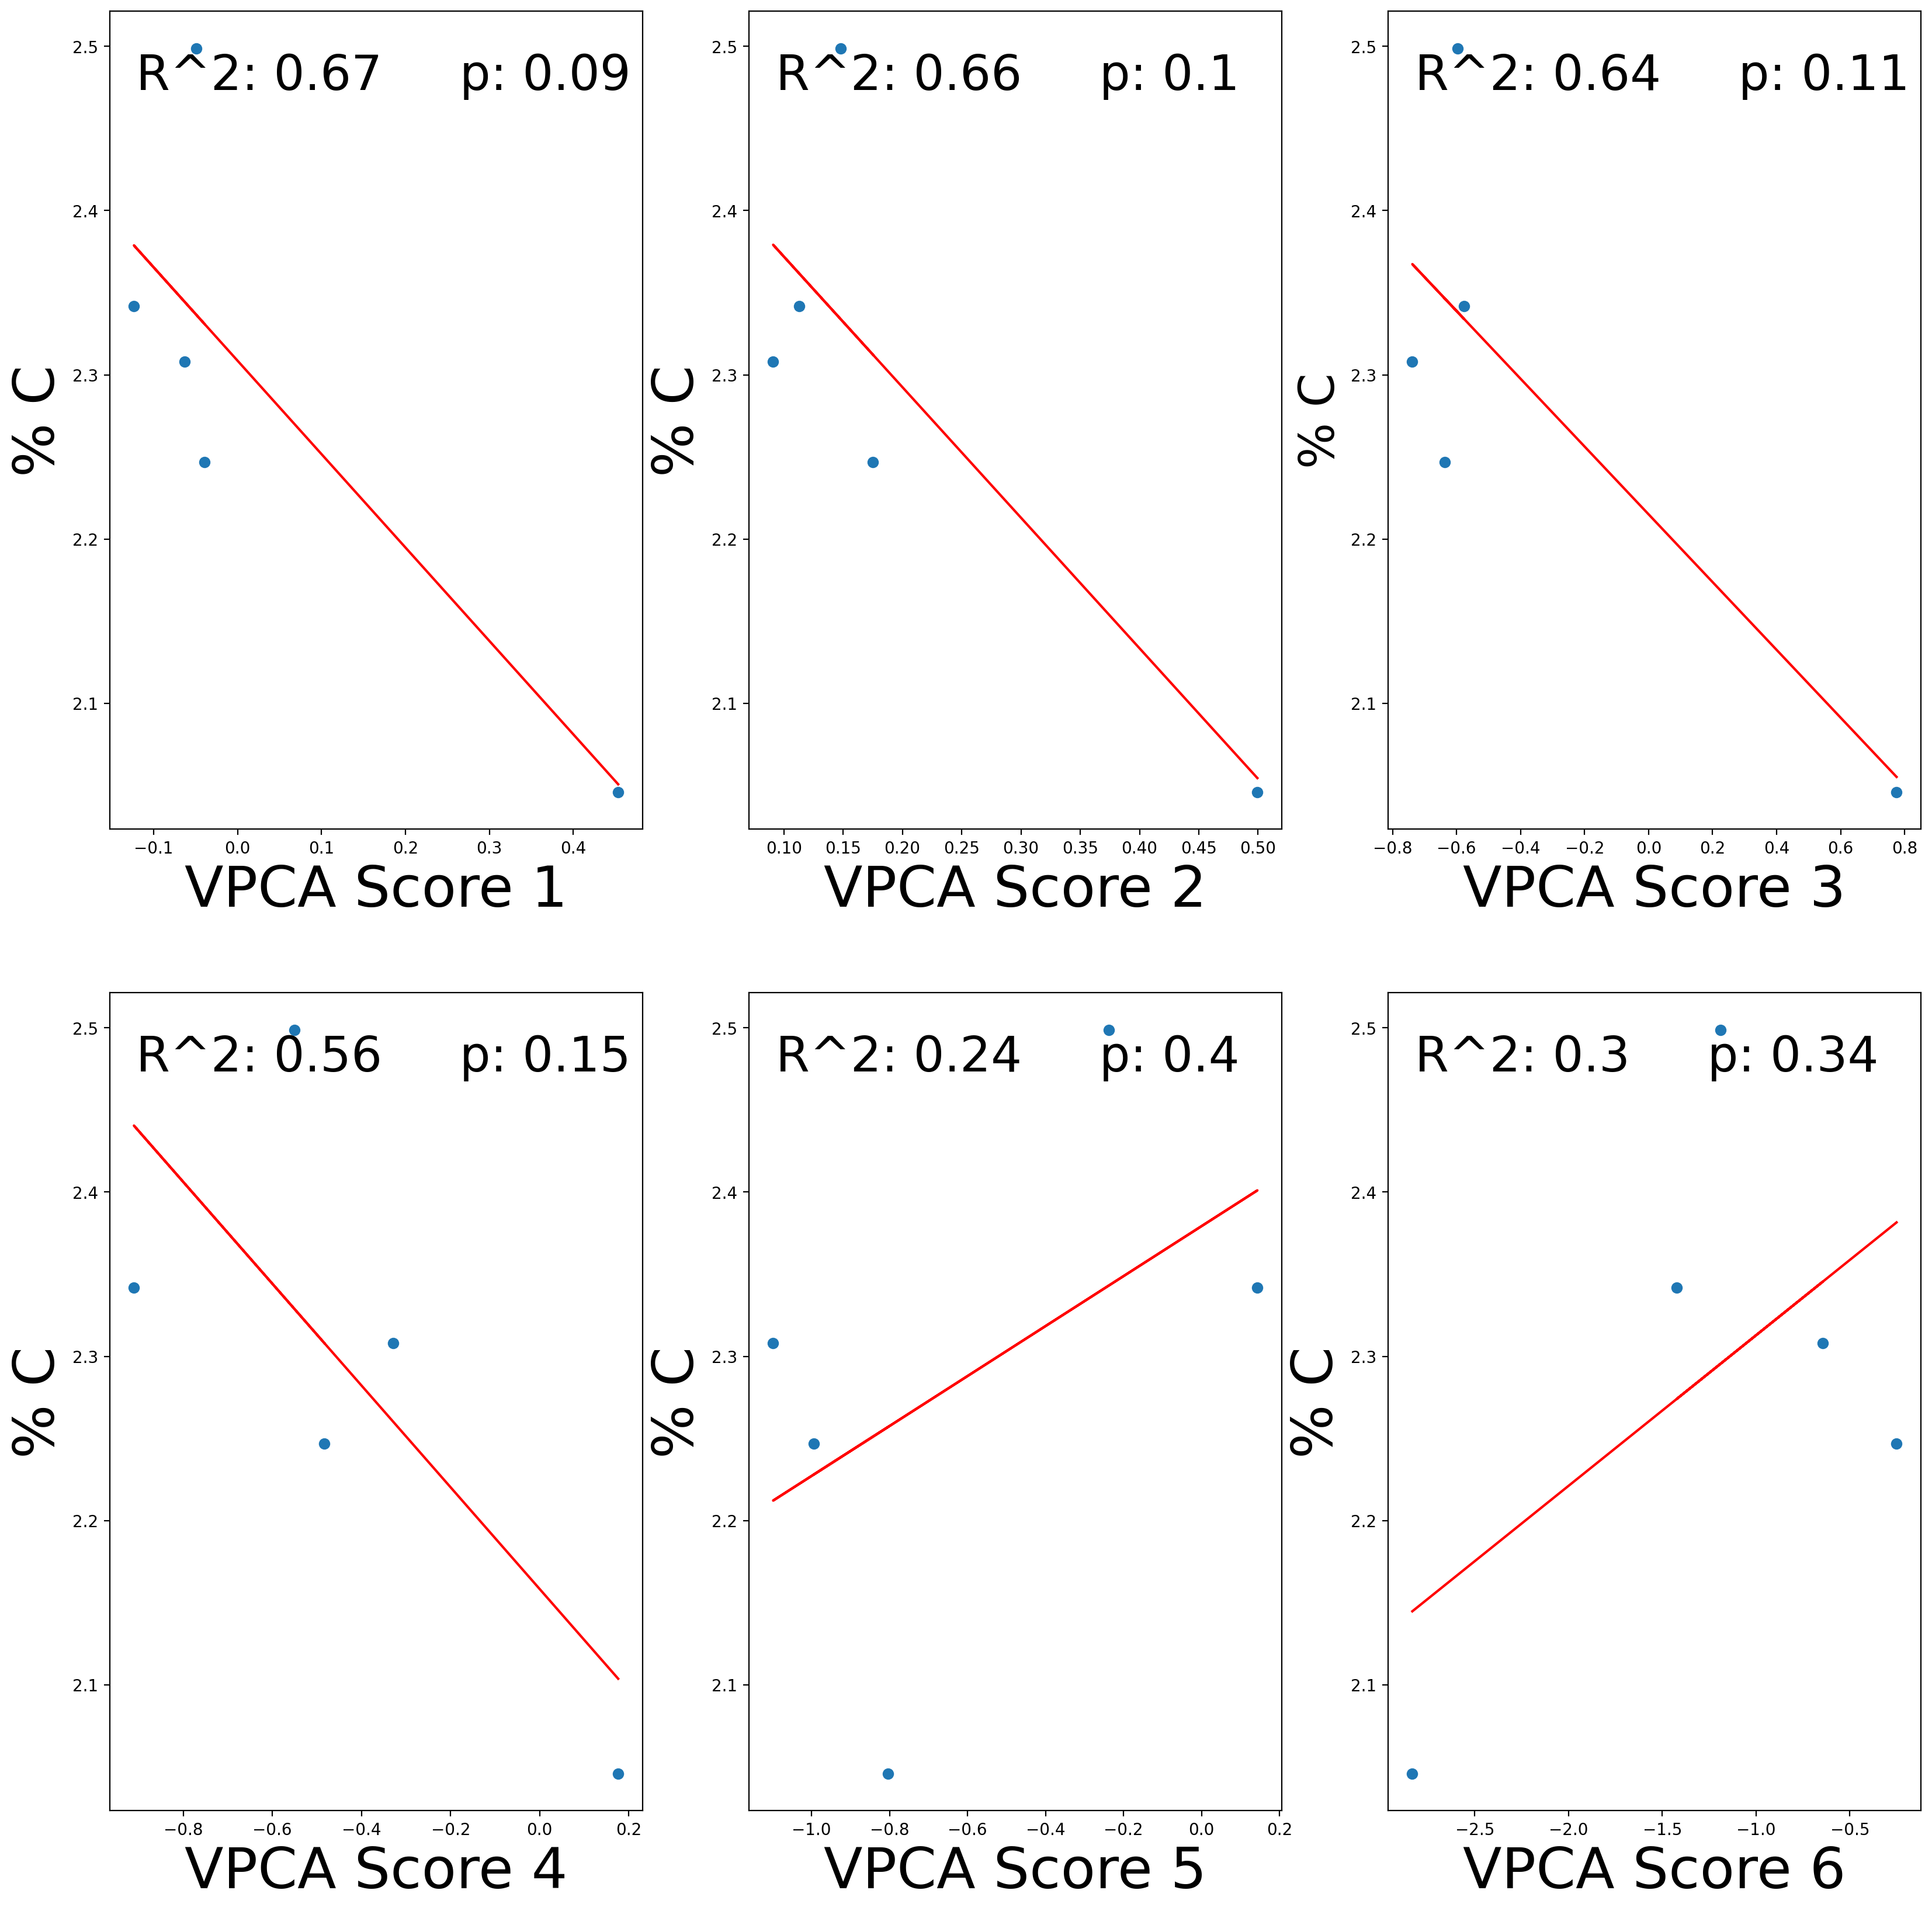

In [ ]:
from scipy.stats import linregress
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(2,3 , figsize= (20,20))
ax[0,0].scatter(LynnW_score_soil['6VPCA Score 1'], LynnW_shallow['%C'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 1'].astype(float), LynnW_shallow['%C'].astype(float))
ax[0,0].plot(LynnW_score_soil['6VPCA Score 1'], intercept + slope*LynnW_score_soil['6VPCA Score 1'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,0].text(0.05, 0.95, text1, transform=ax[0,0].transAxes,
     fontsize=30, verticalalignment='top')
ax[0,0].set_ylabel('% C',fontsize=35)
ax[0,0].set_xlabel('VPCA Score 1',fontsize=35)




ax[0,1].scatter(LynnW_score_soil['6VPCA Score 2'], LynnW_shallow['%C'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 2'].astype(float), LynnW_shallow['%C'].astype(float))
ax[0,1].plot(LynnW_score_soil['6VPCA Score 2'], intercept + slope*LynnW_score_soil['6VPCA Score 2'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,1].text(0.05, 0.95, text1, transform=ax[0,1].transAxes,
     fontsize=30, verticalalignment='top')
ax[0,1].set_ylabel('% C',fontsize=35)
ax[0,1].set_xlabel('VPCA Score 2',fontsize=35)


ax[0,2].scatter(LynnW_score_soil['6VPCA Score 3'], LynnW_shallow['%C'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 3'].astype(float), LynnW_shallow['%C'].astype(float))
ax[0,2].plot(LynnW_score_soil['6VPCA Score 3'], intercept + slope*LynnW_score_soil['6VPCA Score 3'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,2].text(0.05, 0.95, text1, transform=ax[0,2].transAxes,
     fontsize=30, verticalalignment='top')
ax[0,2].set_ylabel('% C',fontsize=30)
ax[0,2].set_xlabel('VPCA Score 3',fontsize=35)

ax[1,0].scatter(LynnW_score_soil['6VPCA Score 4'], LynnW_shallow['%C'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 4'].astype(float), LynnW_shallow['%C'].astype(float))
ax[1,0].plot(LynnW_score_soil['6VPCA Score 4'], intercept + slope*LynnW_score_soil['6VPCA Score 4'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,0].text(0.05, 0.95, text1, transform=ax[1,0].transAxes,
     fontsize=30, verticalalignment='top')
ax[1,0].set_ylabel('% C',fontsize=35)
ax[1,0].set_xlabel('VPCA Score 4',fontsize=35)


ax[1,1].scatter(LynnW_score_soil['6VPCA Score 5'], LynnW_shallow['%C'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 5'].astype(float), LynnW_shallow['%C'].astype(float))
ax[1,1].plot(LynnW_score_soil['6VPCA Score 5'], intercept + slope*LynnW_score_soil['6VPCA Score 5'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,1].text(0.05, 0.95, text1, transform=ax[1,1].transAxes,
     fontsize=30, verticalalignment='top')
ax[1,1].set_ylabel('% C',fontsize=35)
ax[1,1].set_xlabel('VPCA Score 5',fontsize=35)


ax[1,2].scatter(LynnW_score_soil['6VPCA Score 6'], LynnW_shallow['%C'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 6'].astype(float), LynnW_shallow['%C'].astype(float))
ax[1,2].plot(LynnW_score_soil['6VPCA Score 6'], intercept + slope*LynnW_score_soil['6VPCA Score 6'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,2].text(0.05, 0.95, text1, transform=ax[1,2].transAxes,
     fontsize=30, verticalalignment='top')
ax[1,2].set_ylabel('% C',fontsize=35)
ax[1,2].set_xlabel('VPCA Score 6',fontsize=35)


Text(0.5, 0, 'VPCA Score 6')

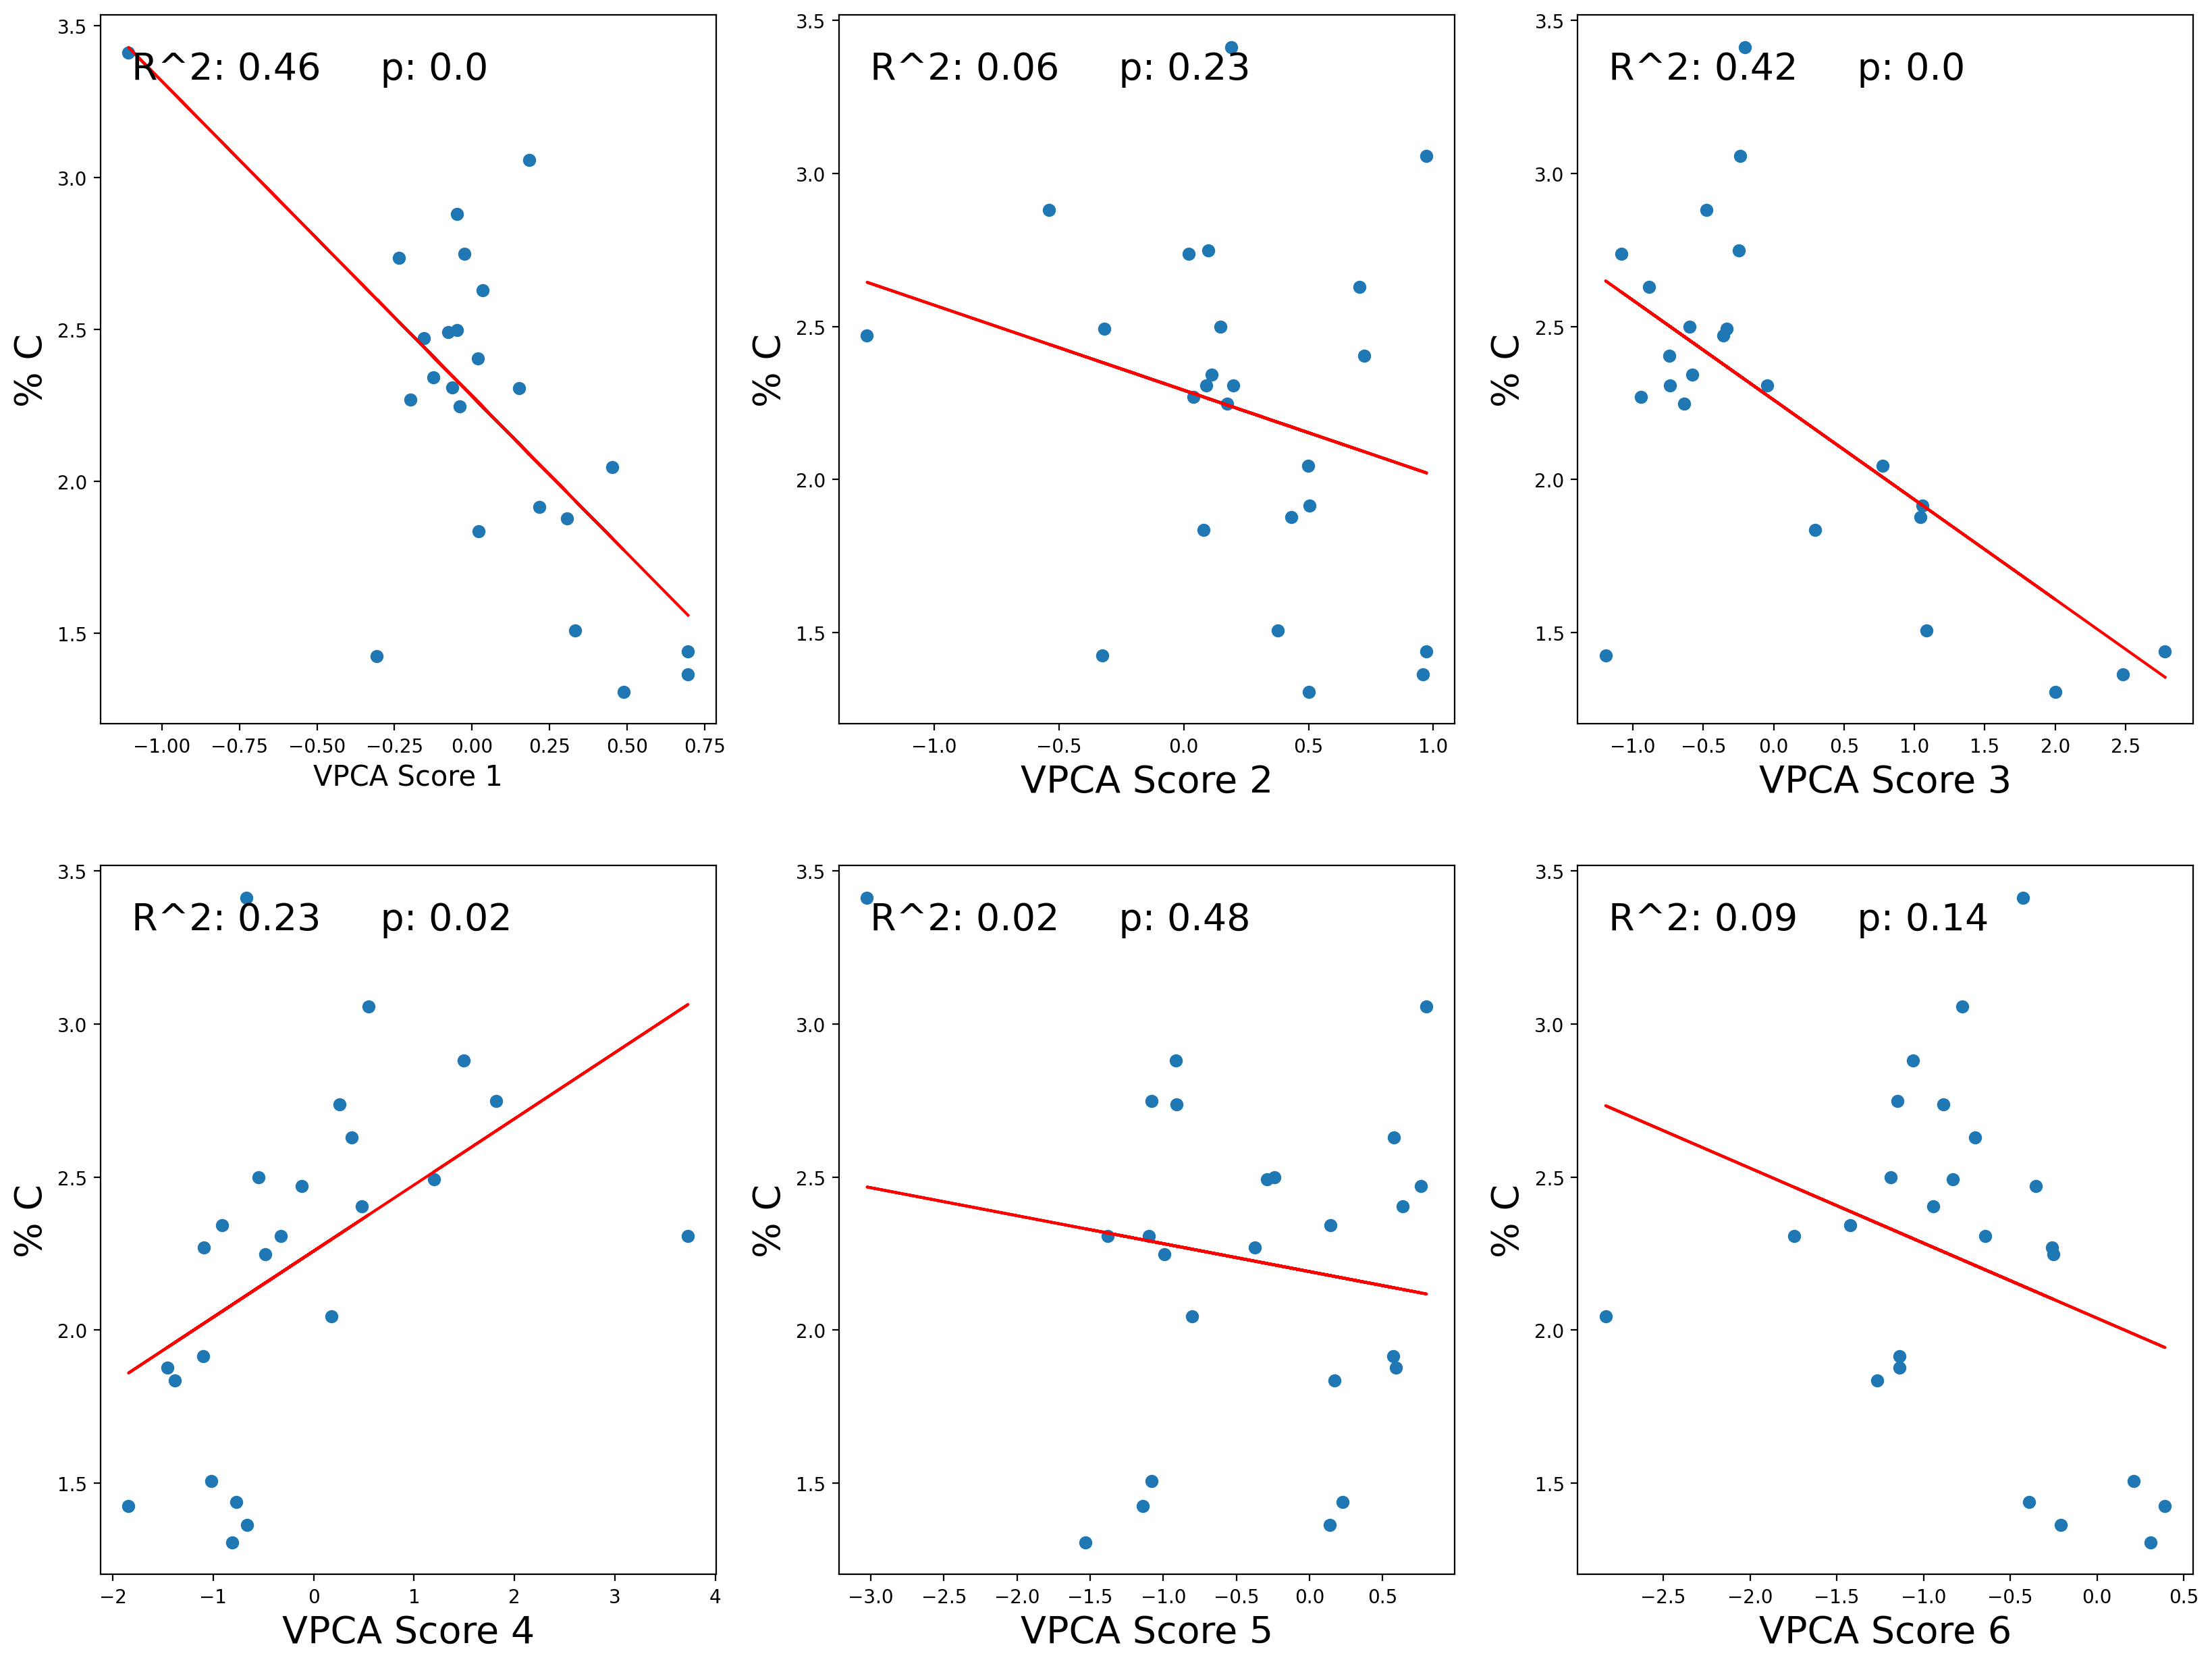

In [ ]:
from scipy.stats import linregress
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(2,3 , figsize= (20,15))
ax[0,0].scatter(merged_VPCA['6VPCA Score 1'], merged_shallow_s['%C'])
slope, intercept, r_value, p_value, std_err = linregress(merged_VPCA['6VPCA Score 1'].astype(float), merged_shallow_s['%C'].astype(float))
ax[0,0].plot(merged_VPCA['6VPCA Score 1'], intercept + slope*merged_VPCA['6VPCA Score 1'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,0].text(0.05, 0.95, text1, transform=ax[0,0].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,0].set_ylabel('% C',fontsize=20)
ax[0,0].set_xlabel('VPCA Score 1',fontsize=15)




ax[0,1].scatter(merged_VPCA['6VPCA Score 2'], merged_shallow_s['%C'])
slope, intercept, r_value, p_value, std_err = linregress(merged_VPCA['6VPCA Score 2'].astype(float), merged_shallow_s['%C'].astype(float))
ax[0,1].plot(merged_VPCA['6VPCA Score 2'], intercept + slope*merged_VPCA['6VPCA Score 2'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,1].text(0.05, 0.95, text1, transform=ax[0,1].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,1].set_ylabel('% C',fontsize=20)
ax[0,1].set_xlabel('VPCA Score 2',fontsize=20)


ax[0,2].scatter(merged_VPCA['6VPCA Score 3'], merged_shallow_s['%C'])
slope, intercept, r_value, p_value, std_err = linregress(merged_VPCA['6VPCA Score 3'].astype(float), merged_shallow_s['%C'].astype(float))
ax[0,2].plot(merged_VPCA['6VPCA Score 3'], intercept + slope*merged_VPCA['6VPCA Score 3'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,2].text(0.05, 0.95, text1, transform=ax[0,2].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,2].set_ylabel('% C',fontsize=20)
ax[0,2].set_xlabel('VPCA Score 3',fontsize=20)

ax[1,0].scatter(merged_VPCA['6VPCA Score 4'], merged_shallow_s['%C'])
slope, intercept, r_value, p_value, std_err = linregress(merged_VPCA['6VPCA Score 4'].astype(float),  merged_shallow_s['%C'].astype(float))
ax[1,0].plot(merged_VPCA['6VPCA Score 4'], intercept + slope*merged_VPCA['6VPCA Score 4'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,0].text(0.05, 0.95, text1, transform=ax[1,0].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,0].set_ylabel('% C',fontsize=20)
ax[1,0].set_xlabel('VPCA Score 4',fontsize=20)


ax[1,1].scatter(merged_VPCA['6VPCA Score 5'], merged_shallow_s['%C'])
slope, intercept, r_value, p_value, std_err = linregress(merged_VPCA['6VPCA Score 5'].astype(float), merged_shallow_s['%C'].astype(float))
ax[1,1].plot(merged_VPCA['6VPCA Score 5'], intercept + slope*merged_VPCA['6VPCA Score 5'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,1].text(0.05, 0.95, text1, transform=ax[1,1].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,1].set_ylabel('% C',fontsize=20)
ax[1,1].set_xlabel('VPCA Score 5',fontsize=20)


ax[1,2].scatter(merged_VPCA['6VPCA Score 6'], merged_shallow_s['%C'])
slope, intercept, r_value, p_value, std_err = linregress(merged_VPCA['6VPCA Score 6'].astype(float), merged_shallow_s['%C'].astype(float))
ax[1,2].plot(merged_VPCA['6VPCA Score 6'], intercept + slope*merged_VPCA['6VPCA Score 6'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,2].text(0.05, 0.95, text1, transform=ax[1,2].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,2].set_ylabel('% C',fontsize=20)
ax[1,2].set_xlabel('VPCA Score 6',fontsize=20)


Text(0.5, 0, 'VPCA Score 6')

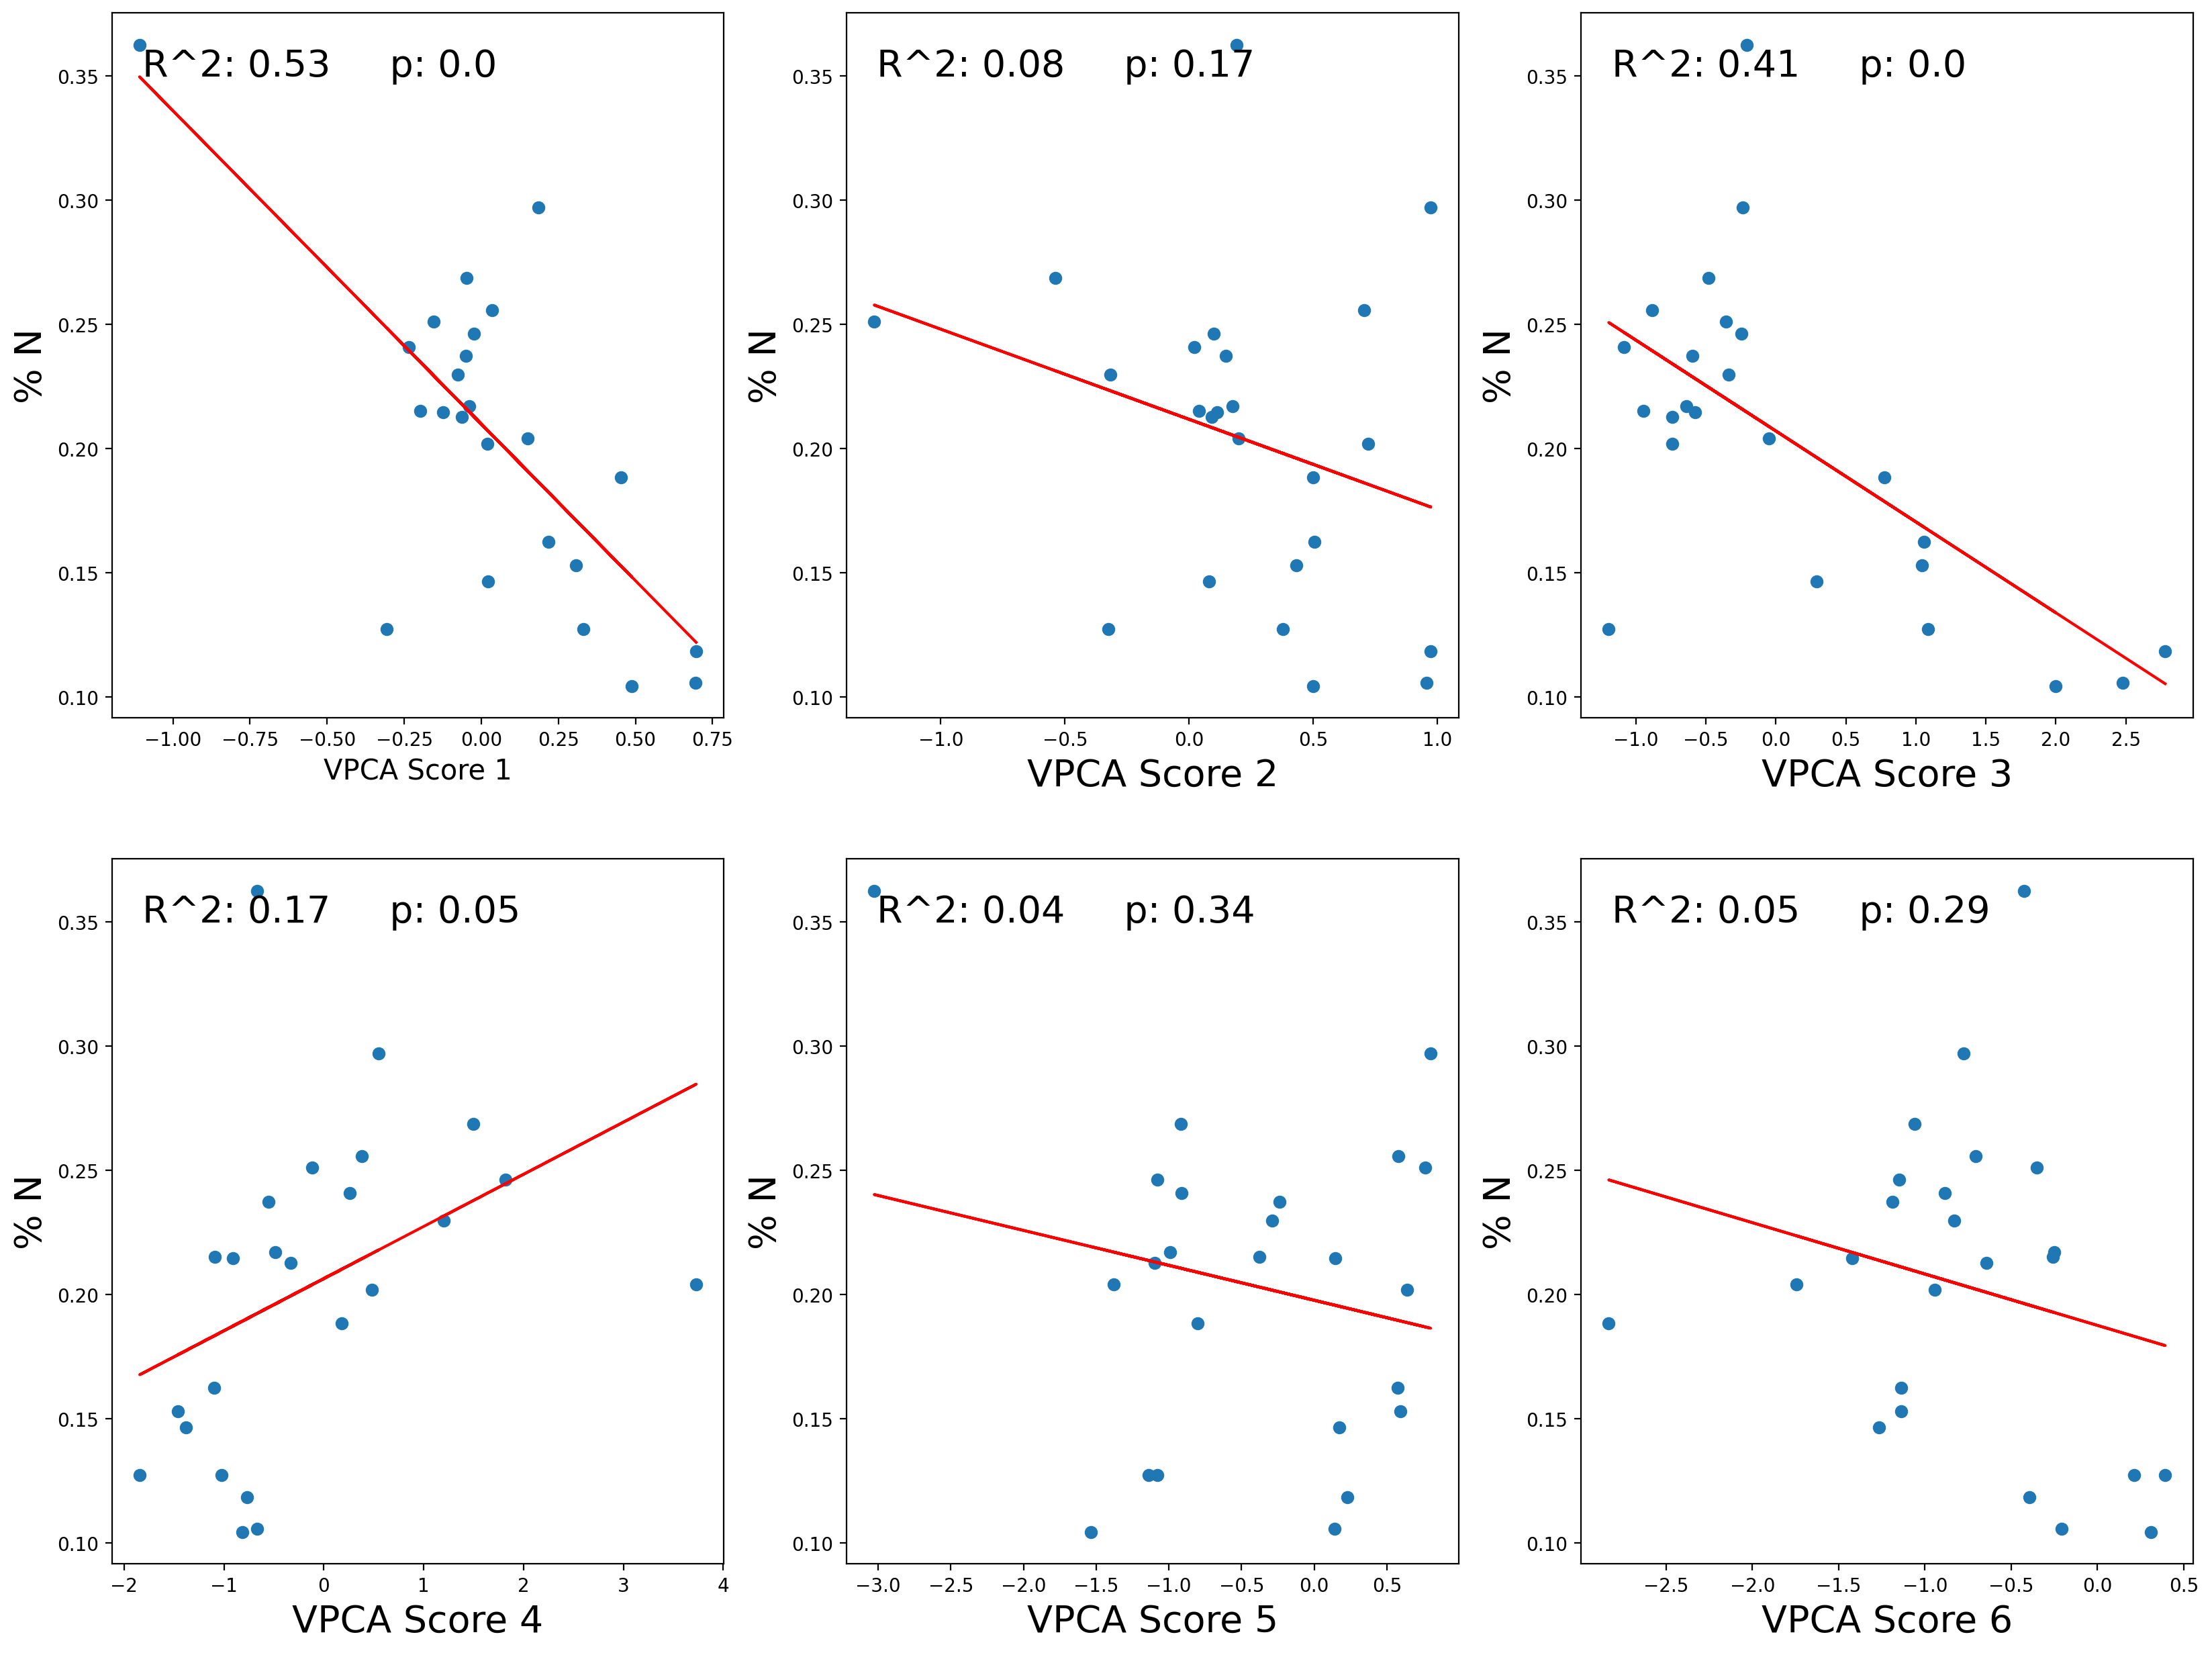

In [ ]:
from scipy.stats import linregress
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(2,3 , figsize= (20,15))
ax[0,0].scatter(merged_VPCA['6VPCA Score 1'], merged_shallow_s['%N'])
slope, intercept, r_value, p_value, std_err = linregress(merged_VPCA['6VPCA Score 1'].astype(float), merged_shallow_s['%N'].astype(float))
ax[0,0].plot(merged_VPCA['6VPCA Score 1'], intercept + slope*merged_VPCA['6VPCA Score 1'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,0].text(0.05, 0.95, text1, transform=ax[0,0].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,0].set_ylabel('% N',fontsize=20)
ax[0,0].set_xlabel('VPCA Score 1',fontsize=15)




ax[0,1].scatter(merged_VPCA['6VPCA Score 2'], merged_shallow_s['%N'])
slope, intercept, r_value, p_value, std_err = linregress(merged_VPCA['6VPCA Score 2'].astype(float), merged_shallow_s['%N'].astype(float))
ax[0,1].plot(merged_VPCA['6VPCA Score 2'], intercept + slope*merged_VPCA['6VPCA Score 2'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,1].text(0.05, 0.95, text1, transform=ax[0,1].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,1].set_ylabel('% N',fontsize=20)
ax[0,1].set_xlabel('VPCA Score 2',fontsize=20)


ax[0,2].scatter(merged_VPCA['6VPCA Score 3'], merged_shallow_s['%N'])
slope, intercept, r_value, p_value, std_err = linregress(merged_VPCA['6VPCA Score 3'].astype(float), merged_shallow_s['%N'].astype(float))
ax[0,2].plot(merged_VPCA['6VPCA Score 3'], intercept + slope*merged_VPCA['6VPCA Score 3'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,2].text(0.05, 0.95, text1, transform=ax[0,2].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,2].set_ylabel('% N',fontsize=20)
ax[0,2].set_xlabel('VPCA Score 3',fontsize=20)

ax[1,0].scatter(merged_VPCA['6VPCA Score 4'], merged_shallow_s['%N'])
slope, intercept, r_value, p_value, std_err = linregress(merged_VPCA['6VPCA Score 4'].astype(float),  merged_shallow_s['%N'].astype(float))
ax[1,0].plot(merged_VPCA['6VPCA Score 4'], intercept + slope*merged_VPCA['6VPCA Score 4'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,0].text(0.05, 0.95, text1, transform=ax[1,0].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,0].set_ylabel('% N',fontsize=20)
ax[1,0].set_xlabel('VPCA Score 4',fontsize=20)


ax[1,1].scatter(merged_VPCA['6VPCA Score 5'], merged_shallow_s['%N'])
slope, intercept, r_value, p_value, std_err = linregress(merged_VPCA['6VPCA Score 5'].astype(float), merged_shallow_s['%N'].astype(float))
ax[1,1].plot(merged_VPCA['6VPCA Score 5'], intercept + slope*merged_VPCA['6VPCA Score 5'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,1].text(0.05, 0.95, text1, transform=ax[1,1].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,1].set_ylabel('% N',fontsize=20)
ax[1,1].set_xlabel('VPCA Score 5',fontsize=20)


ax[1,2].scatter(merged_VPCA['6VPCA Score 6'], merged_shallow_s['%N'])
slope, intercept, r_value, p_value, std_err = linregress(merged_VPCA['6VPCA Score 6'].astype(float), merged_shallow_s['%N'].astype(float))
ax[1,2].plot(merged_VPCA['6VPCA Score 6'], intercept + slope*merged_VPCA['6VPCA Score 6'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,2].text(0.05, 0.95, text1, transform=ax[1,2].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,2].set_ylabel('% N',fontsize=20)
ax[1,2].set_xlabel('VPCA Score 6',fontsize=20)

Text(0.5, 0, 'VPCA Score 6')

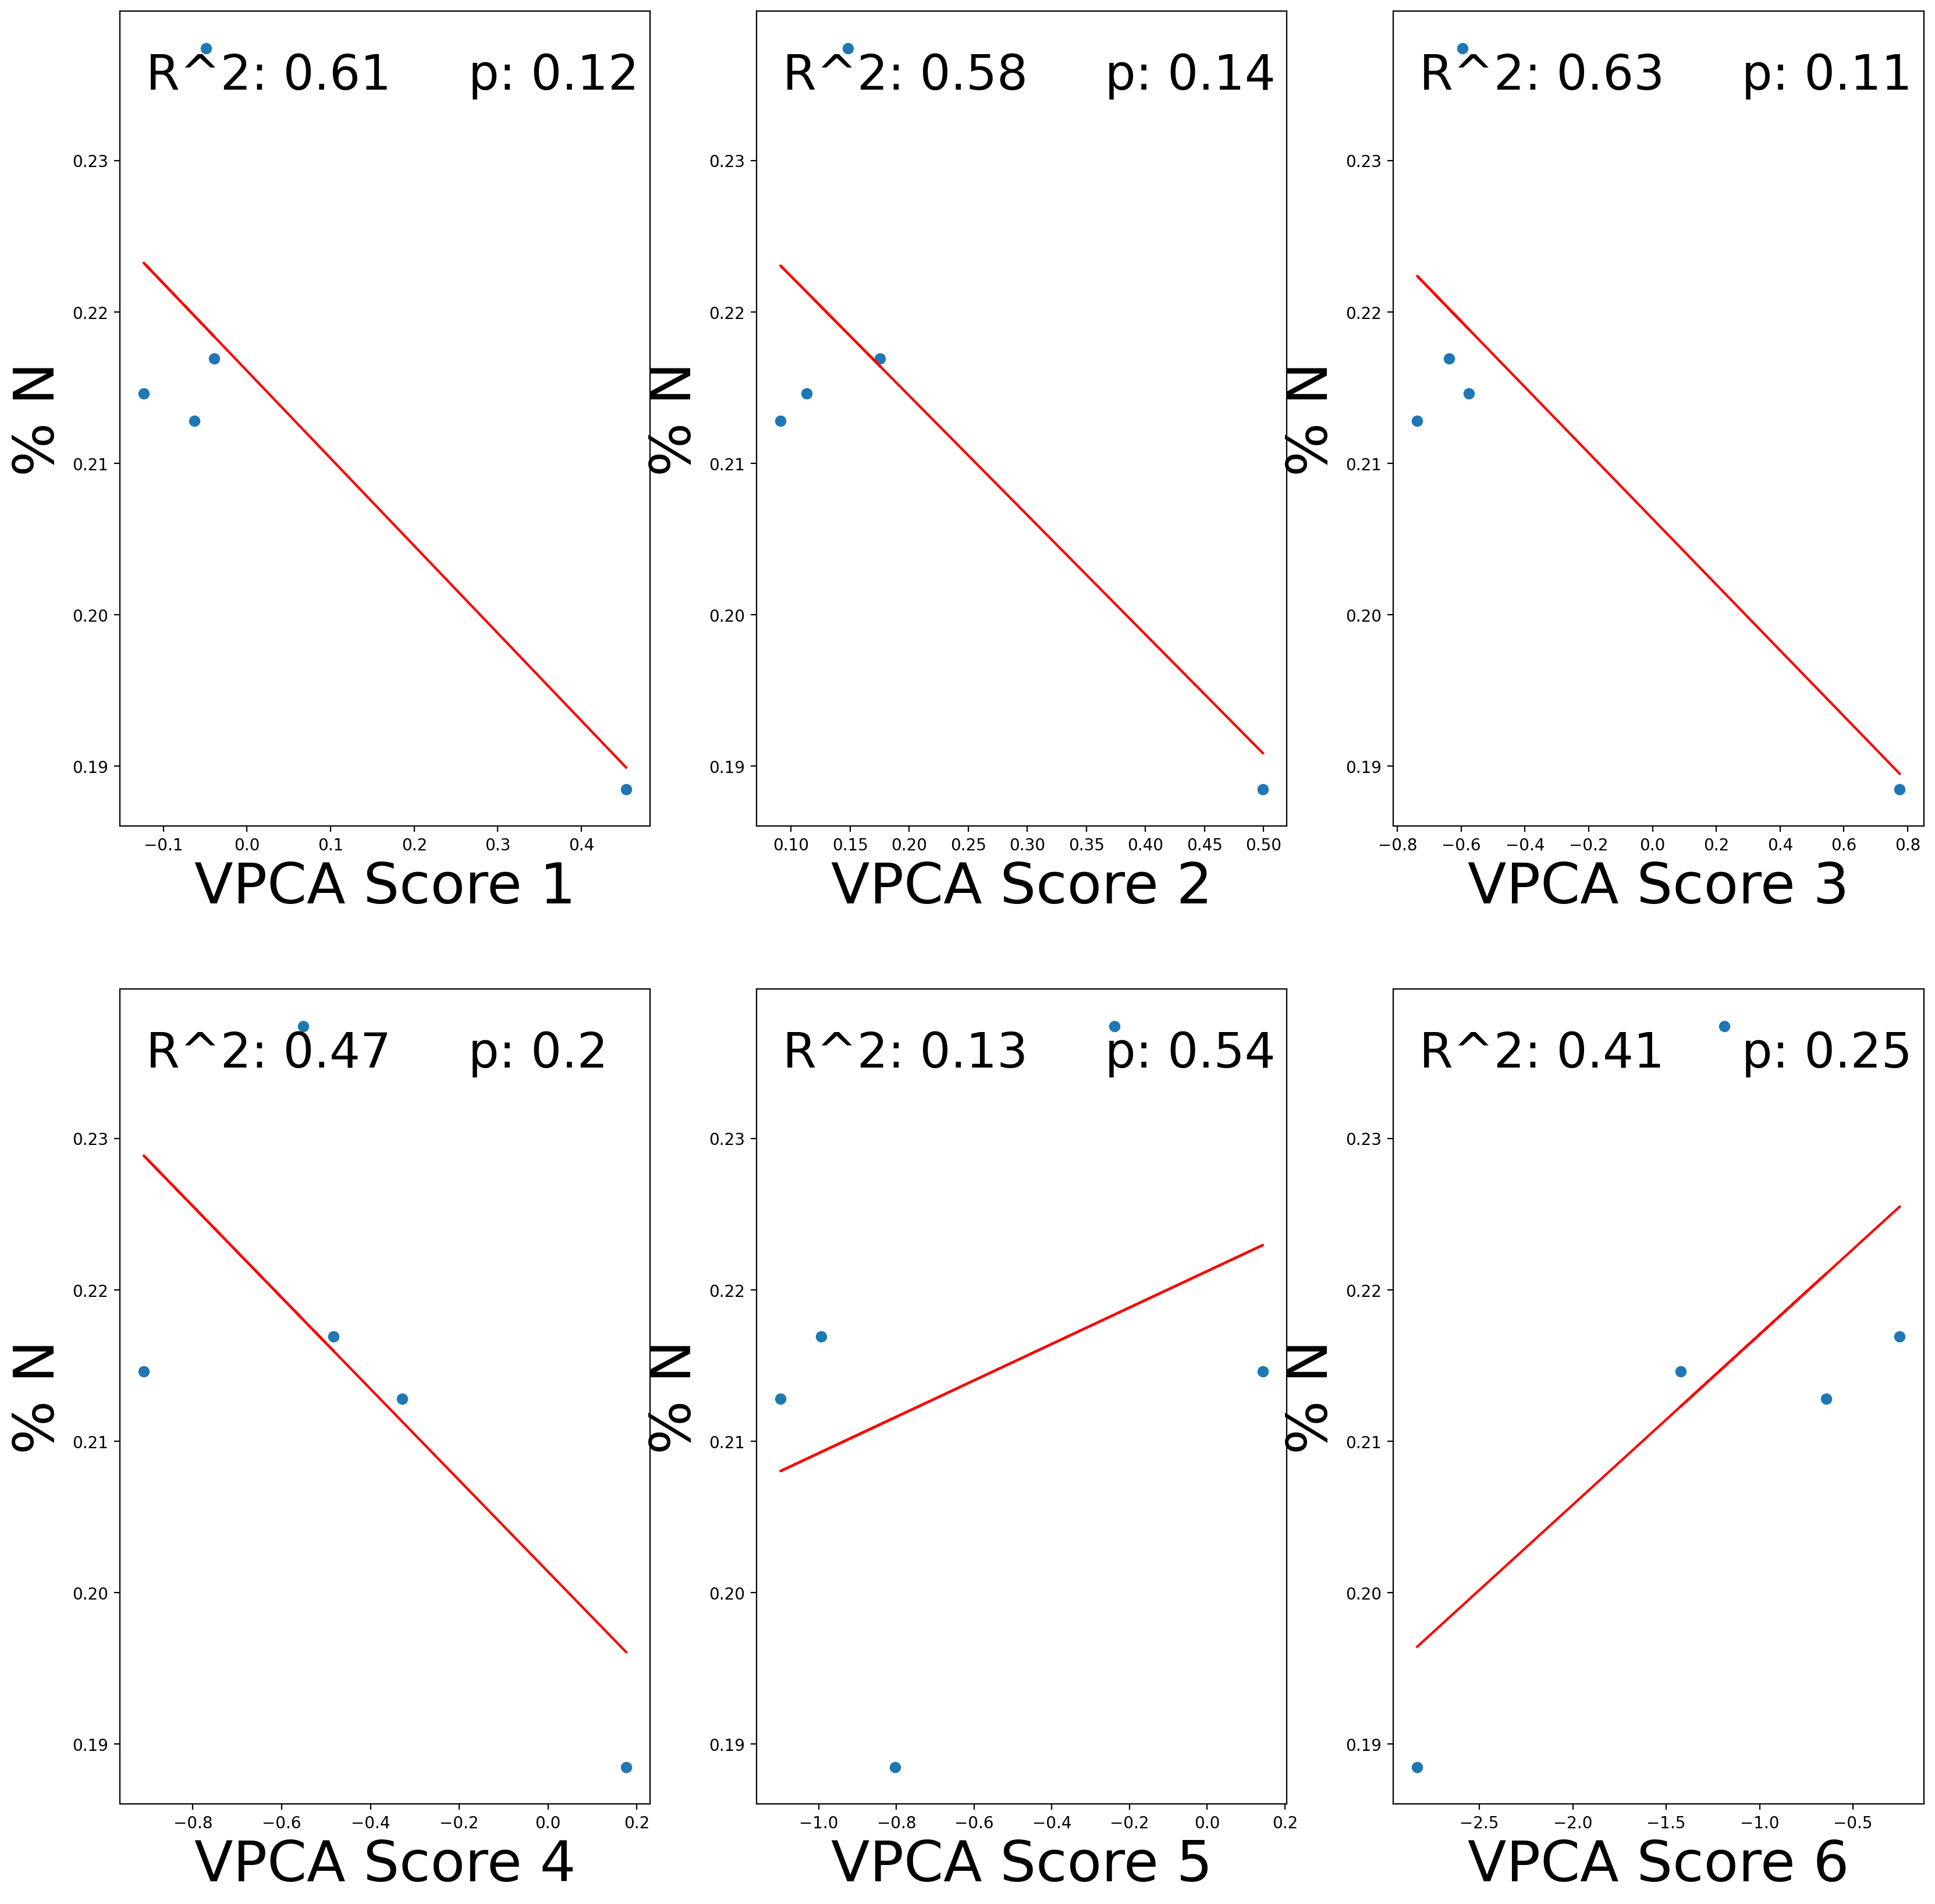

In [ ]:
from scipy.stats import linregress
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(2,3 , figsize= (20,20))
ax[0,0].scatter(LynnW_score_soil['6VPCA Score 1'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 1'].astype(float), LynnW_shallow['%N'].astype(float))
ax[0,0].plot(LynnW_score_soil['6VPCA Score 1'], intercept + slope*LynnW_score_soil['6VPCA Score 1'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,0].text(0.05, 0.95, text1, transform=ax[0,0].transAxes,
     fontsize=30, verticalalignment='top')
ax[0,0].set_ylabel('% N',fontsize=35)
ax[0,0].set_xlabel('VPCA Score 1',fontsize=35)




ax[0,1].scatter(LynnW_score_soil['6VPCA Score 2'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 2'].astype(float), LynnW_shallow['%N'].astype(float))
ax[0,1].plot(LynnW_score_soil['6VPCA Score 2'], intercept + slope*LynnW_score_soil['6VPCA Score 2'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,1].text(0.05, 0.95, text1, transform=ax[0,1].transAxes,
     fontsize=30, verticalalignment='top')
ax[0,1].set_ylabel('% N',fontsize=35)
ax[0,1].set_xlabel('VPCA Score 2',fontsize=35)


ax[0,2].scatter(LynnW_score_soil['6VPCA Score 3'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 3'].astype(float), LynnW_shallow['%N'].astype(float))
ax[0,2].plot(LynnW_score_soil['6VPCA Score 3'], intercept + slope*LynnW_score_soil['6VPCA Score 3'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,2].text(0.05, 0.95, text1, transform=ax[0,2].transAxes,
     fontsize=30, verticalalignment='top')
ax[0,2].set_ylabel('% N',fontsize=35)
ax[0,2].set_xlabel('VPCA Score 3',fontsize=35)

ax[1,0].scatter(LynnW_score_soil['6VPCA Score 4'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 4'].astype(float), LynnW_shallow['%N'].astype(float))
ax[1,0].plot(LynnW_score_soil['6VPCA Score 4'], intercept + slope*LynnW_score_soil['6VPCA Score 4'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,0].text(0.05, 0.95, text1, transform=ax[1,0].transAxes,
     fontsize=30, verticalalignment='top')
ax[1,0].set_ylabel('% N',fontsize=35)
ax[1,0].set_xlabel('VPCA Score 4',fontsize=35)


ax[1,1].scatter(LynnW_score_soil['6VPCA Score 5'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 5'].astype(float), LynnW_shallow['%N'].astype(float))
ax[1,1].plot(LynnW_score_soil['6VPCA Score 5'], intercept + slope*LynnW_score_soil['6VPCA Score 5'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,1].text(0.05, 0.95, text1, transform=ax[1,1].transAxes,
     fontsize=30, verticalalignment='top')
ax[1,1].set_ylabel('% N',fontsize=35)
ax[1,1].set_xlabel('VPCA Score 5',fontsize=35)


ax[1,2].scatter(LynnW_score_soil['6VPCA Score 6'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 6'].astype(float), LynnW_shallow['%N'].astype(float))
ax[1,2].plot(LynnW_score_soil['6VPCA Score 6'], intercept + slope*LynnW_score_soil['6VPCA Score 6'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,2].text(0.05, 0.95, text1, transform=ax[1,2].transAxes,
     fontsize=30, verticalalignment='top')
ax[1,2].set_ylabel('% N',fontsize=35)
ax[1,2].set_xlabel('VPCA Score 6',fontsize=35)

Text(0.5, 0, 'VPCA Score 6')

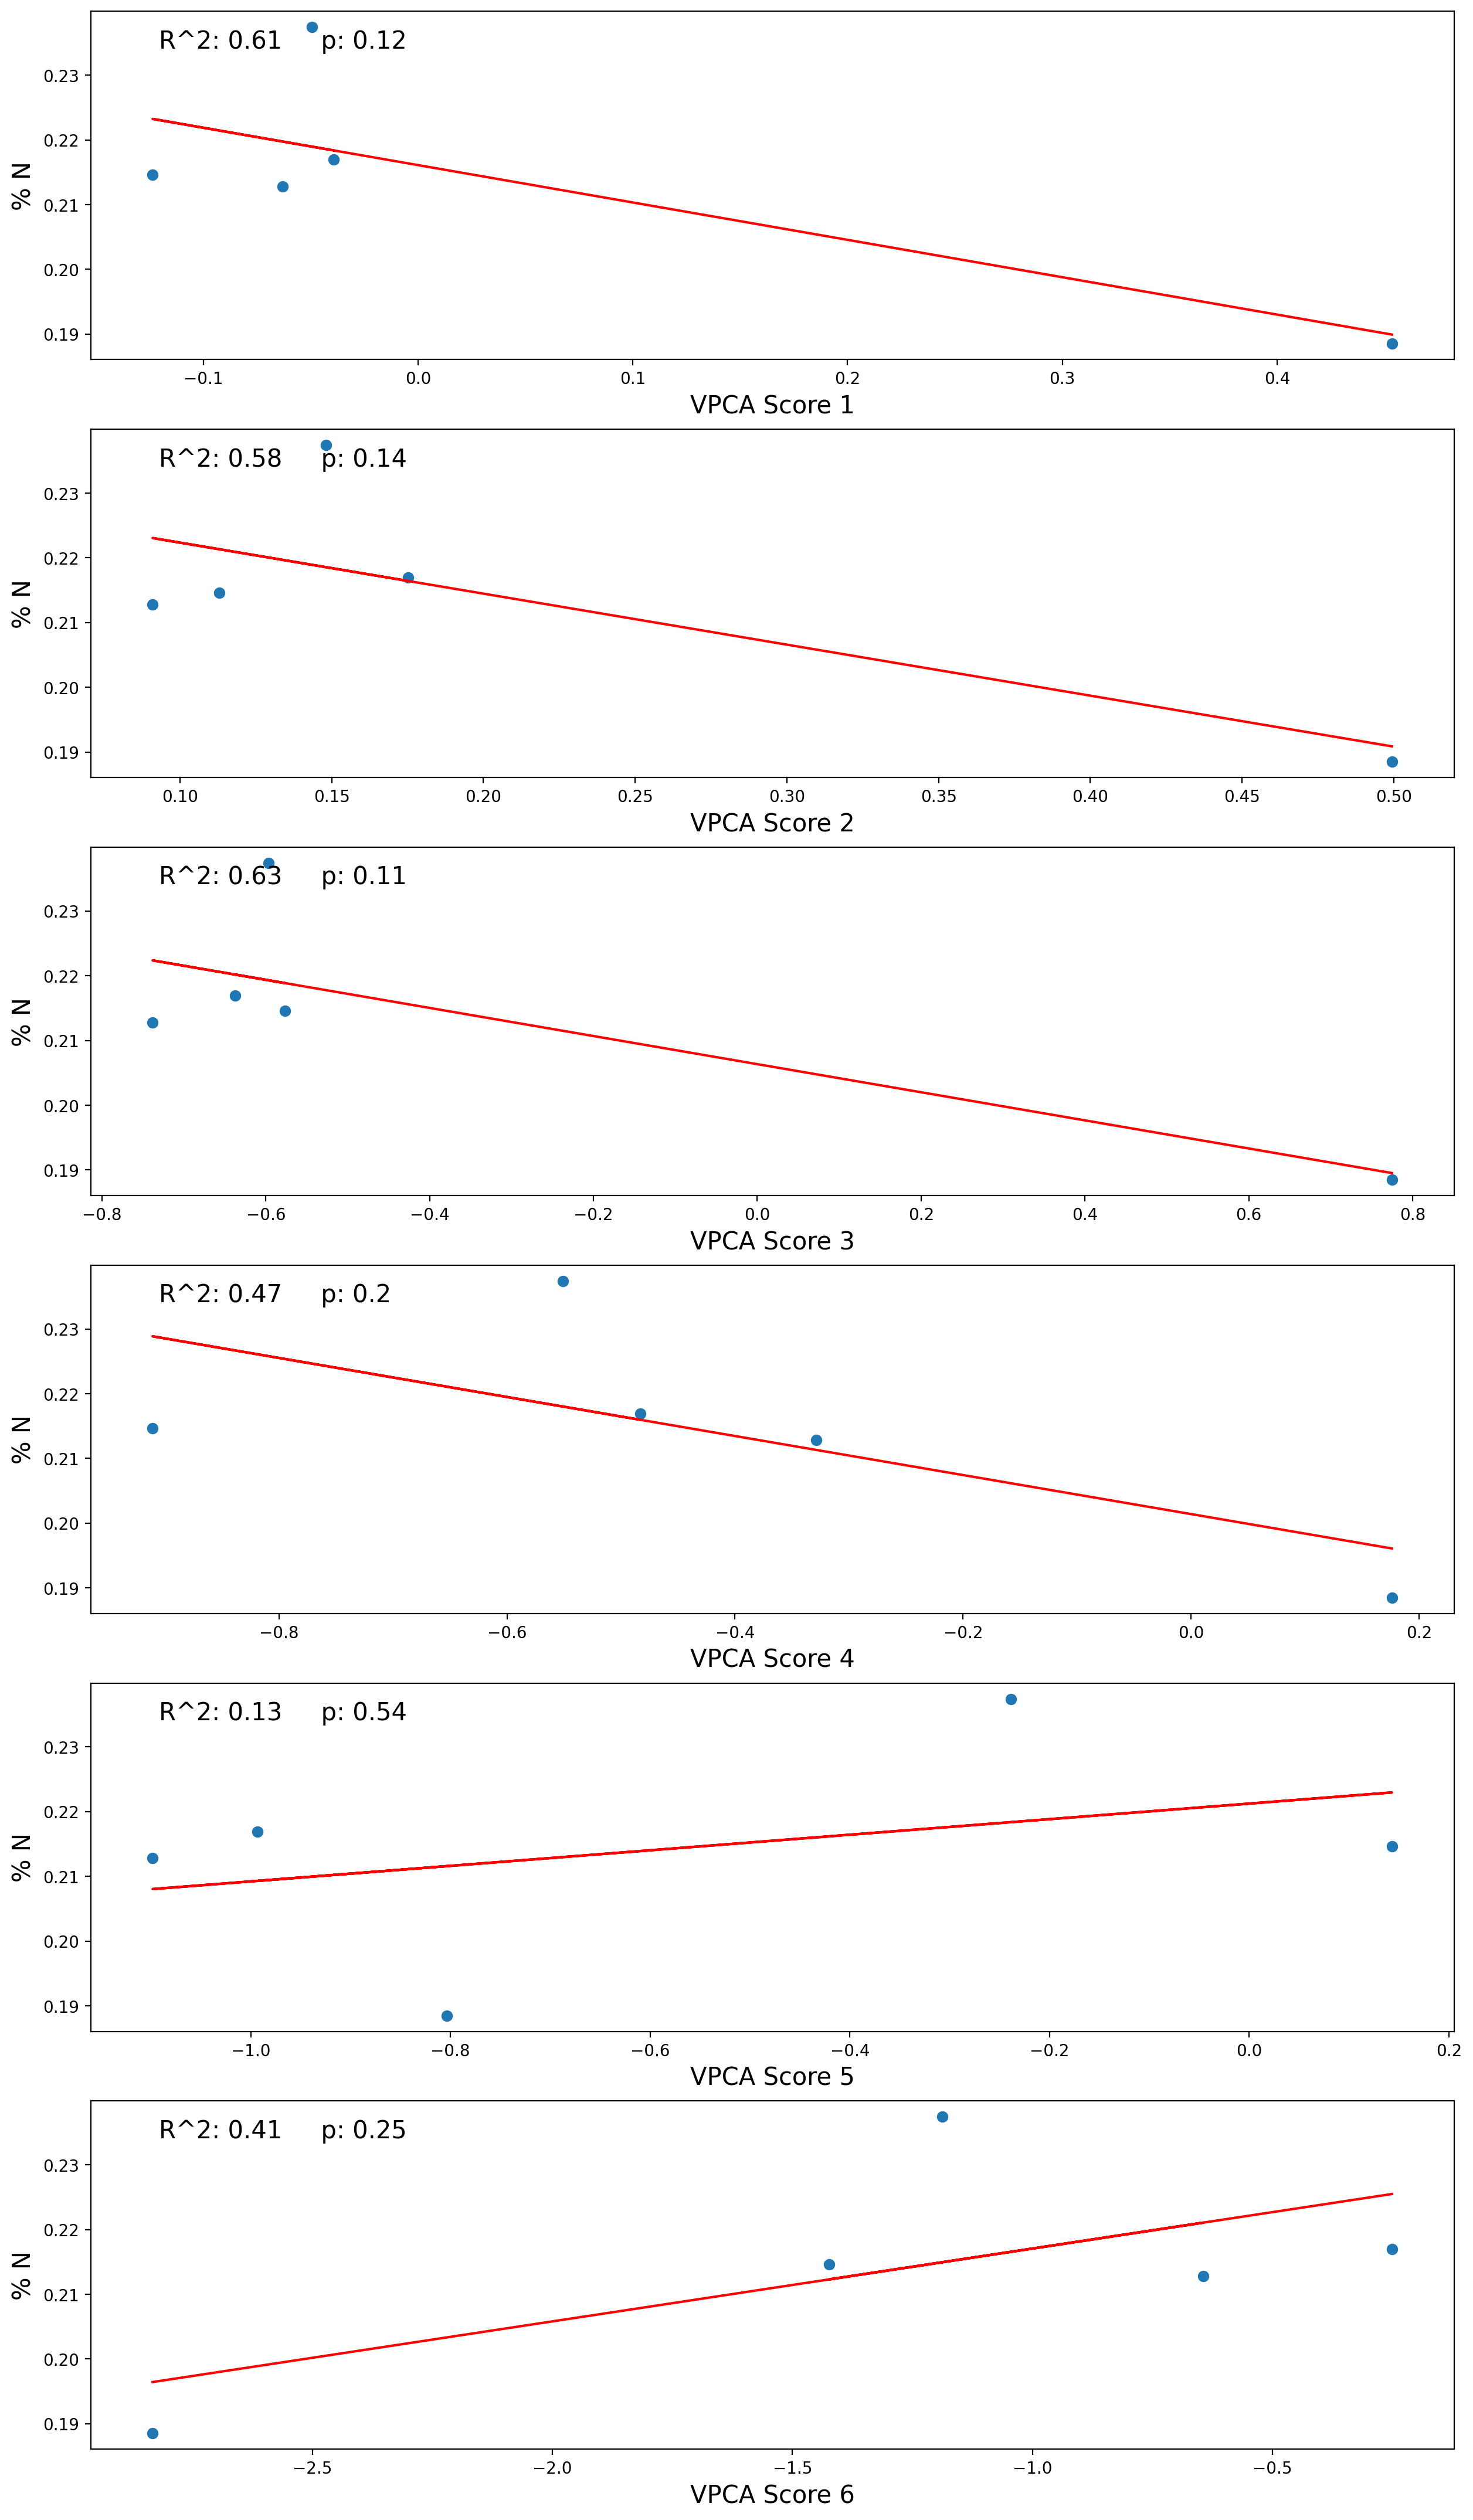

In [ ]:
from scipy.stats import linregress
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(6 , figsize= (15,27))
ax[0].scatter(LynnW_score_soil['6VPCA Score 1'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 1'].astype(float), LynnW_shallow['%N'].astype(float))
ax[0].plot(LynnW_score_soil['6VPCA Score 1'], intercept + slope*LynnW_score_soil['6VPCA Score 1'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0].text(0.05, 0.95, text1, transform=ax[0].transAxes,
     fontsize=15, verticalalignment='top')
ax[0].set_ylabel('% N',fontsize=15)
ax[0].set_xlabel('VPCA Score 1',fontsize=15)




ax[1].scatter(LynnW_score_soil['6VPCA Score 2'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 2'].astype(float), LynnW_shallow['%N'].astype(float))
ax[1].plot(LynnW_score_soil['6VPCA Score 2'], intercept + slope*LynnW_score_soil['6VPCA Score 2'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1].text(0.05, 0.95, text1, transform=ax[1].transAxes,
     fontsize=15, verticalalignment='top')
ax[1].set_ylabel('% N',fontsize=15)
ax[1].set_xlabel('VPCA Score 2',fontsize=15)


ax[2].scatter(LynnW_score_soil['6VPCA Score 3'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 3'].astype(float), LynnW_shallow['%N'].astype(float))
ax[2].plot(LynnW_score_soil['6VPCA Score 3'], intercept + slope*LynnW_score_soil['6VPCA Score 3'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[2].text(0.05, 0.95, text1, transform=ax[2].transAxes,
     fontsize=15, verticalalignment='top')
ax[2].set_ylabel('% N',fontsize=15)
ax[2].set_xlabel('VPCA Score 3',fontsize=15)

ax[3].scatter(LynnW_score_soil['6VPCA Score 4'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 4'].astype(float), LynnW_shallow['%N'].astype(float))
ax[3].plot(LynnW_score_soil['6VPCA Score 4'], intercept + slope*LynnW_score_soil['6VPCA Score 4'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[3].text(0.05, 0.95, text1, transform=ax[3].transAxes,
     fontsize=15, verticalalignment='top')
ax[3].set_ylabel('% N',fontsize=15)
ax[3].set_xlabel('VPCA Score 4',fontsize=15)


ax[4].scatter(LynnW_score_soil['6VPCA Score 5'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 5'].astype(float), LynnW_shallow['%N'].astype(float))
ax[4].plot(LynnW_score_soil['6VPCA Score 5'], intercept + slope*LynnW_score_soil['6VPCA Score 5'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[4].text(0.05, 0.95, text1, transform=ax[4].transAxes,
     fontsize=15, verticalalignment='top')
ax[4].set_ylabel('% N',fontsize=15)
ax[4].set_xlabel('VPCA Score 5',fontsize=15)

ax[5].scatter(LynnW_score_soil['6VPCA Score 6'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 6'].astype(float), LynnW_shallow['%N'].astype(float))
ax[5].plot(LynnW_score_soil['6VPCA Score 6'], intercept + slope*LynnW_score_soil['6VPCA Score 6'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[5].text(0.05, 0.95, text1, transform=ax[5].transAxes,
     fontsize=15, verticalalignment='top')
ax[5].set_ylabel('% N',fontsize=15)
ax[5].set_xlabel('VPCA Score 6',fontsize=15)

Text(0.5, 0, 'VPCA Score 6')

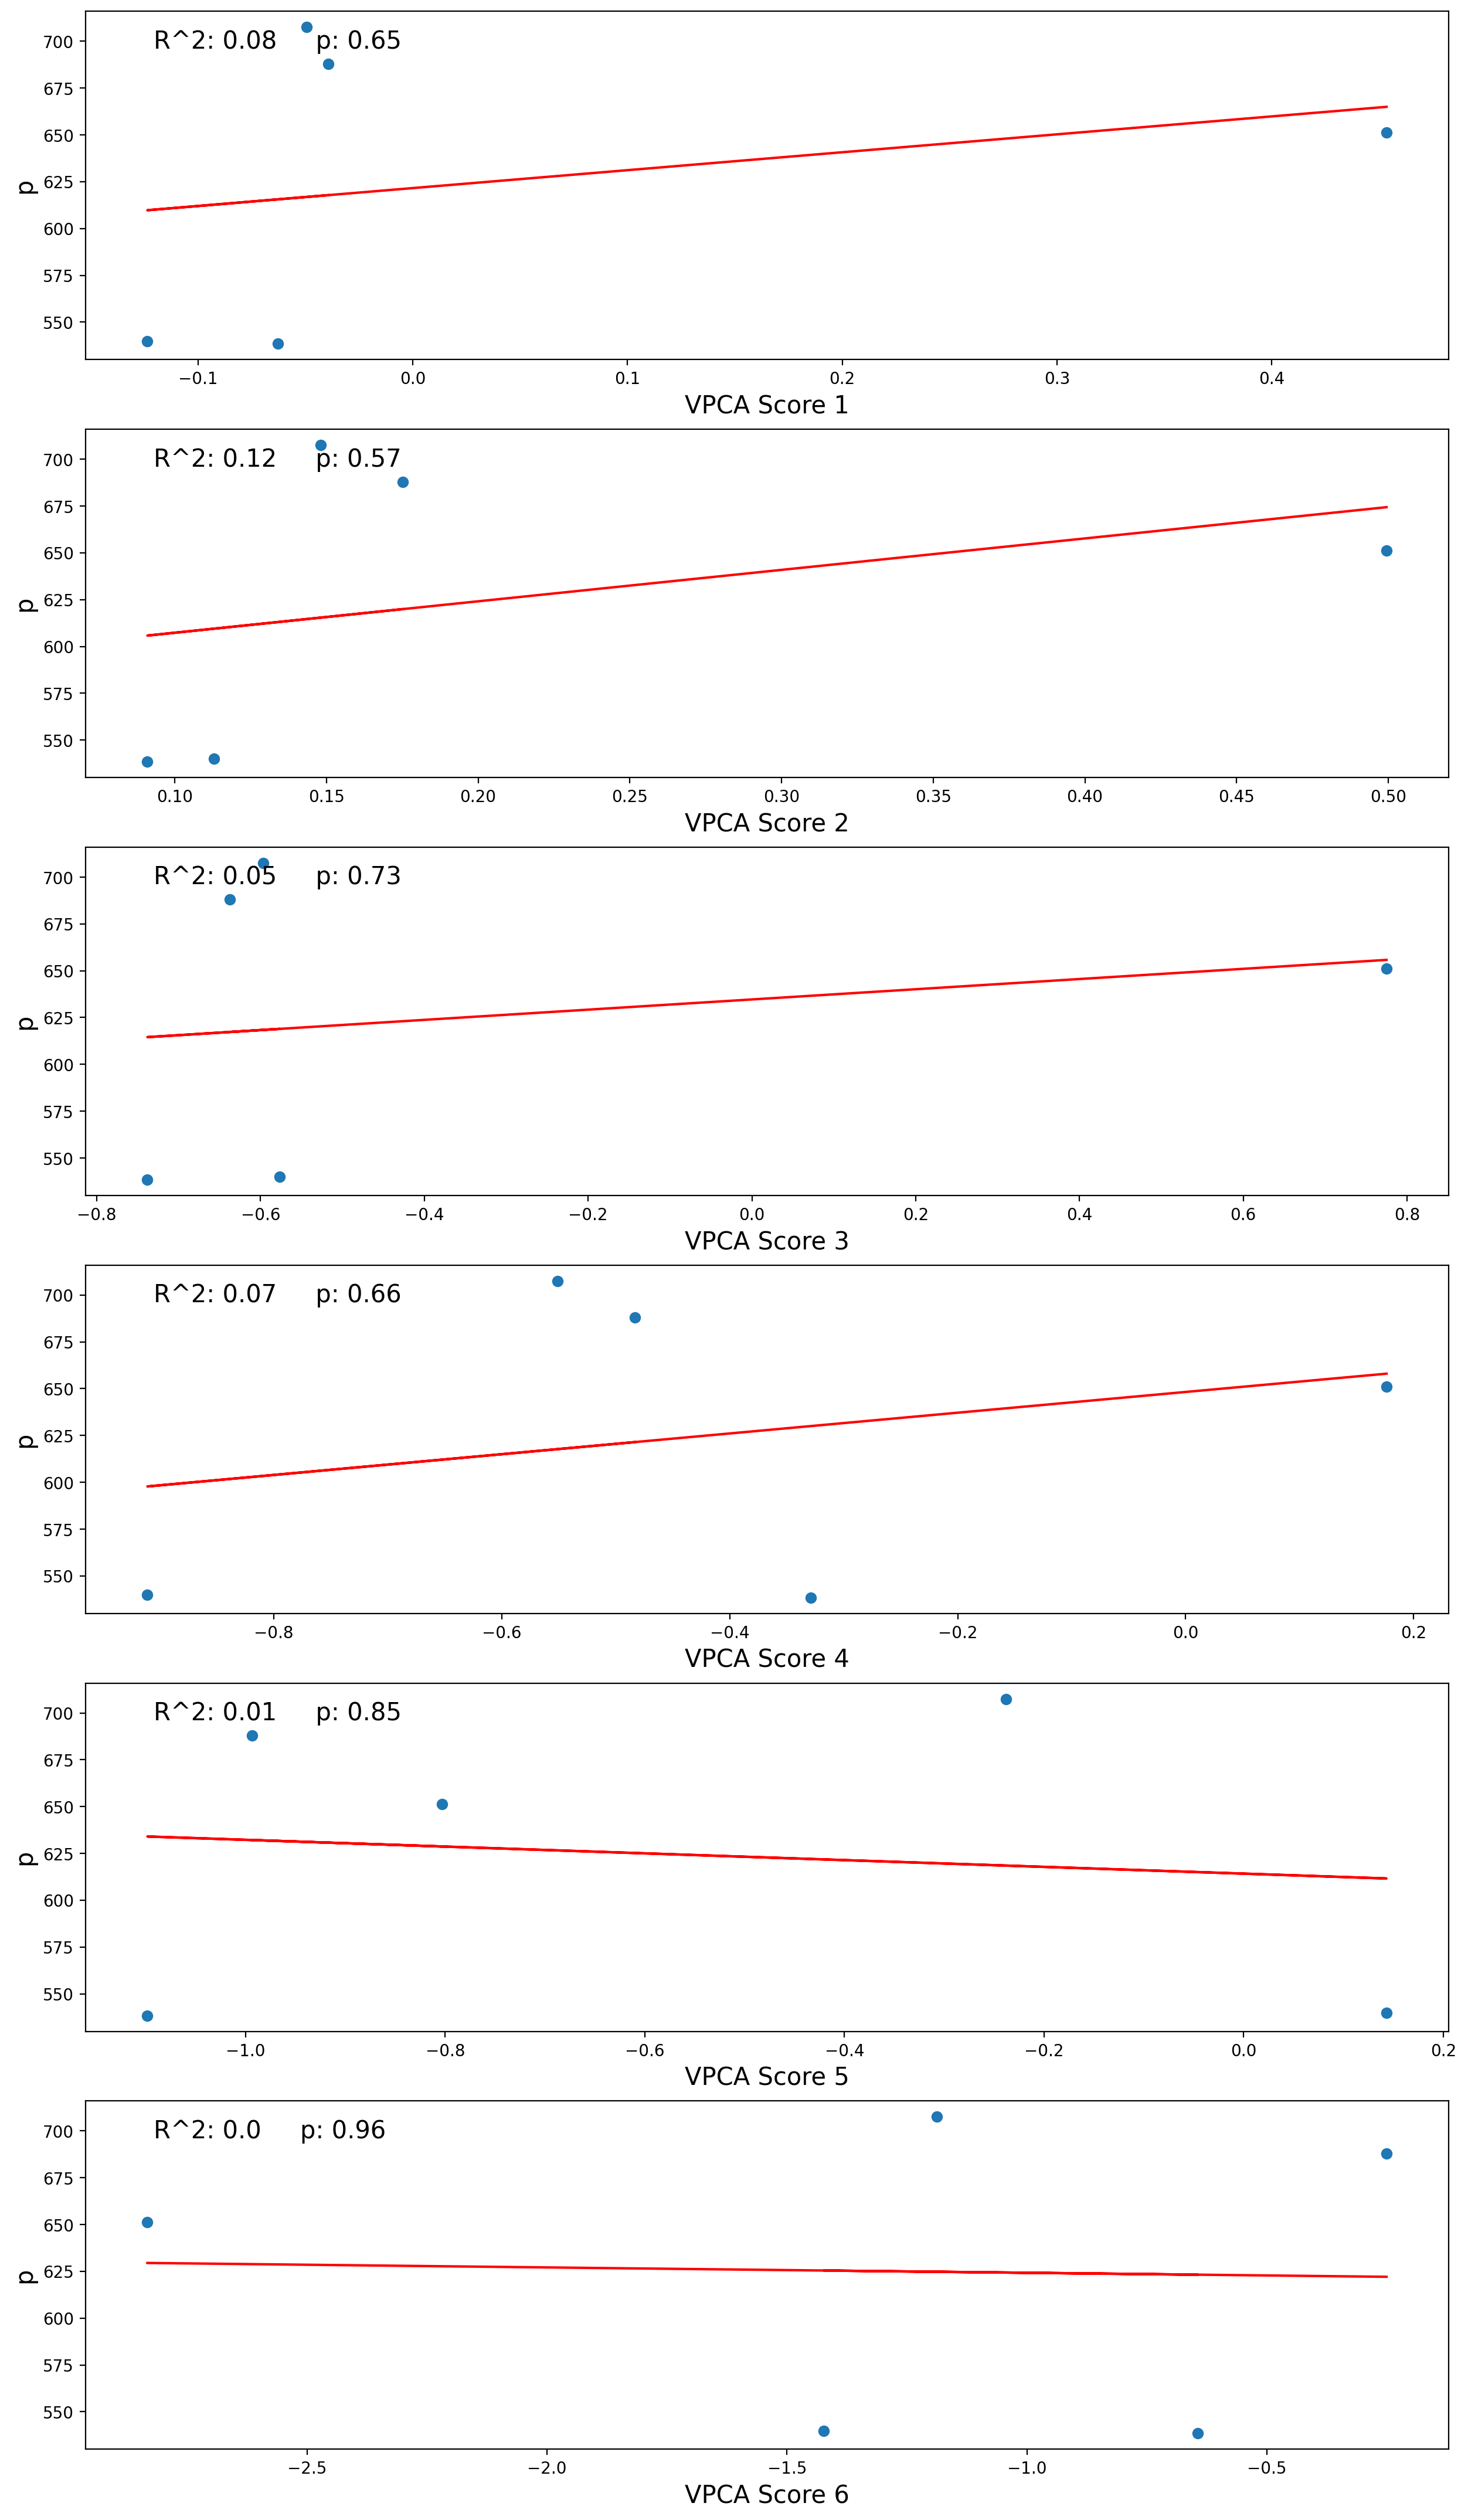

In [ ]:
from scipy.stats import linregress
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(6 , figsize= (15,27))
ax[0].scatter(LynnW_score_soil['6VPCA Score 1'], LynnW_shallow[' P '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 1'].astype(float), LynnW_shallow[' P '].astype(float))
ax[0].plot(LynnW_score_soil['6VPCA Score 1'], intercept + slope*LynnW_score_soil['6VPCA Score 1'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0].text(0.05, 0.95, text1, transform=ax[0].transAxes,
     fontsize=15, verticalalignment='top')
ax[0].set_ylabel('p',fontsize=15)
ax[0].set_xlabel('VPCA Score 1',fontsize=15)




ax[1].scatter(LynnW_score_soil['6VPCA Score 2'], LynnW_shallow[' P '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 2'].astype(float), LynnW_shallow[' P '].astype(float))
ax[1].plot(LynnW_score_soil['6VPCA Score 2'], intercept + slope*LynnW_score_soil['6VPCA Score 2'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1].text(0.05, 0.95, text1, transform=ax[1].transAxes,
     fontsize=15, verticalalignment='top')
ax[1].set_ylabel('p',fontsize=15)
ax[1].set_xlabel('VPCA Score 2',fontsize=15)


ax[2].scatter(LynnW_score_soil['6VPCA Score 3'], LynnW_shallow[' P '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 3'].astype(float), LynnW_shallow[' P '].astype(float))
ax[2].plot(LynnW_score_soil['6VPCA Score 3'], intercept + slope*LynnW_score_soil['6VPCA Score 3'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[2].text(0.05, 0.95, text1, transform=ax[2].transAxes,
     fontsize=15, verticalalignment='top')
ax[2].set_ylabel('p',fontsize=15)
ax[2].set_xlabel('VPCA Score 3',fontsize=15)

ax[3].scatter(LynnW_score_soil['6VPCA Score 4'], LynnW_shallow[' P '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 4'].astype(float), LynnW_shallow[' P '].astype(float))
ax[3].plot(LynnW_score_soil['6VPCA Score 4'], intercept + slope*LynnW_score_soil['6VPCA Score 4'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[3].text(0.05, 0.95, text1, transform=ax[3].transAxes,
     fontsize=15, verticalalignment='top')
ax[3].set_ylabel('p',fontsize=15)
ax[3].set_xlabel('VPCA Score 4',fontsize=15)


ax[4].scatter(LynnW_score_soil['6VPCA Score 5'], LynnW_shallow[' P '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 5'].astype(float), LynnW_shallow[' P '].astype(float))
ax[4].plot(LynnW_score_soil['6VPCA Score 5'], intercept + slope*LynnW_score_soil['6VPCA Score 5'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[4].text(0.05, 0.95, text1, transform=ax[4].transAxes,
     fontsize=15, verticalalignment='top')
ax[4].set_ylabel('p',fontsize=15)
ax[4].set_xlabel('VPCA Score 5',fontsize=15)


ax[5].scatter(LynnW_score_soil['6VPCA Score 6'], LynnW_shallow[' P '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 6'].astype(float), LynnW_shallow[' P '].astype(float))
ax[5].plot(LynnW_score_soil['6VPCA Score 6'], intercept + slope*LynnW_score_soil['6VPCA Score 6'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[5].text(0.05, 0.95, text1, transform=ax[5].transAxes,
     fontsize=15, verticalalignment='top')
ax[5].set_ylabel('p',fontsize=15)
ax[5].set_xlabel('VPCA Score 6',fontsize=15)

Text(0.5, 0, 'VPCA Score 6')

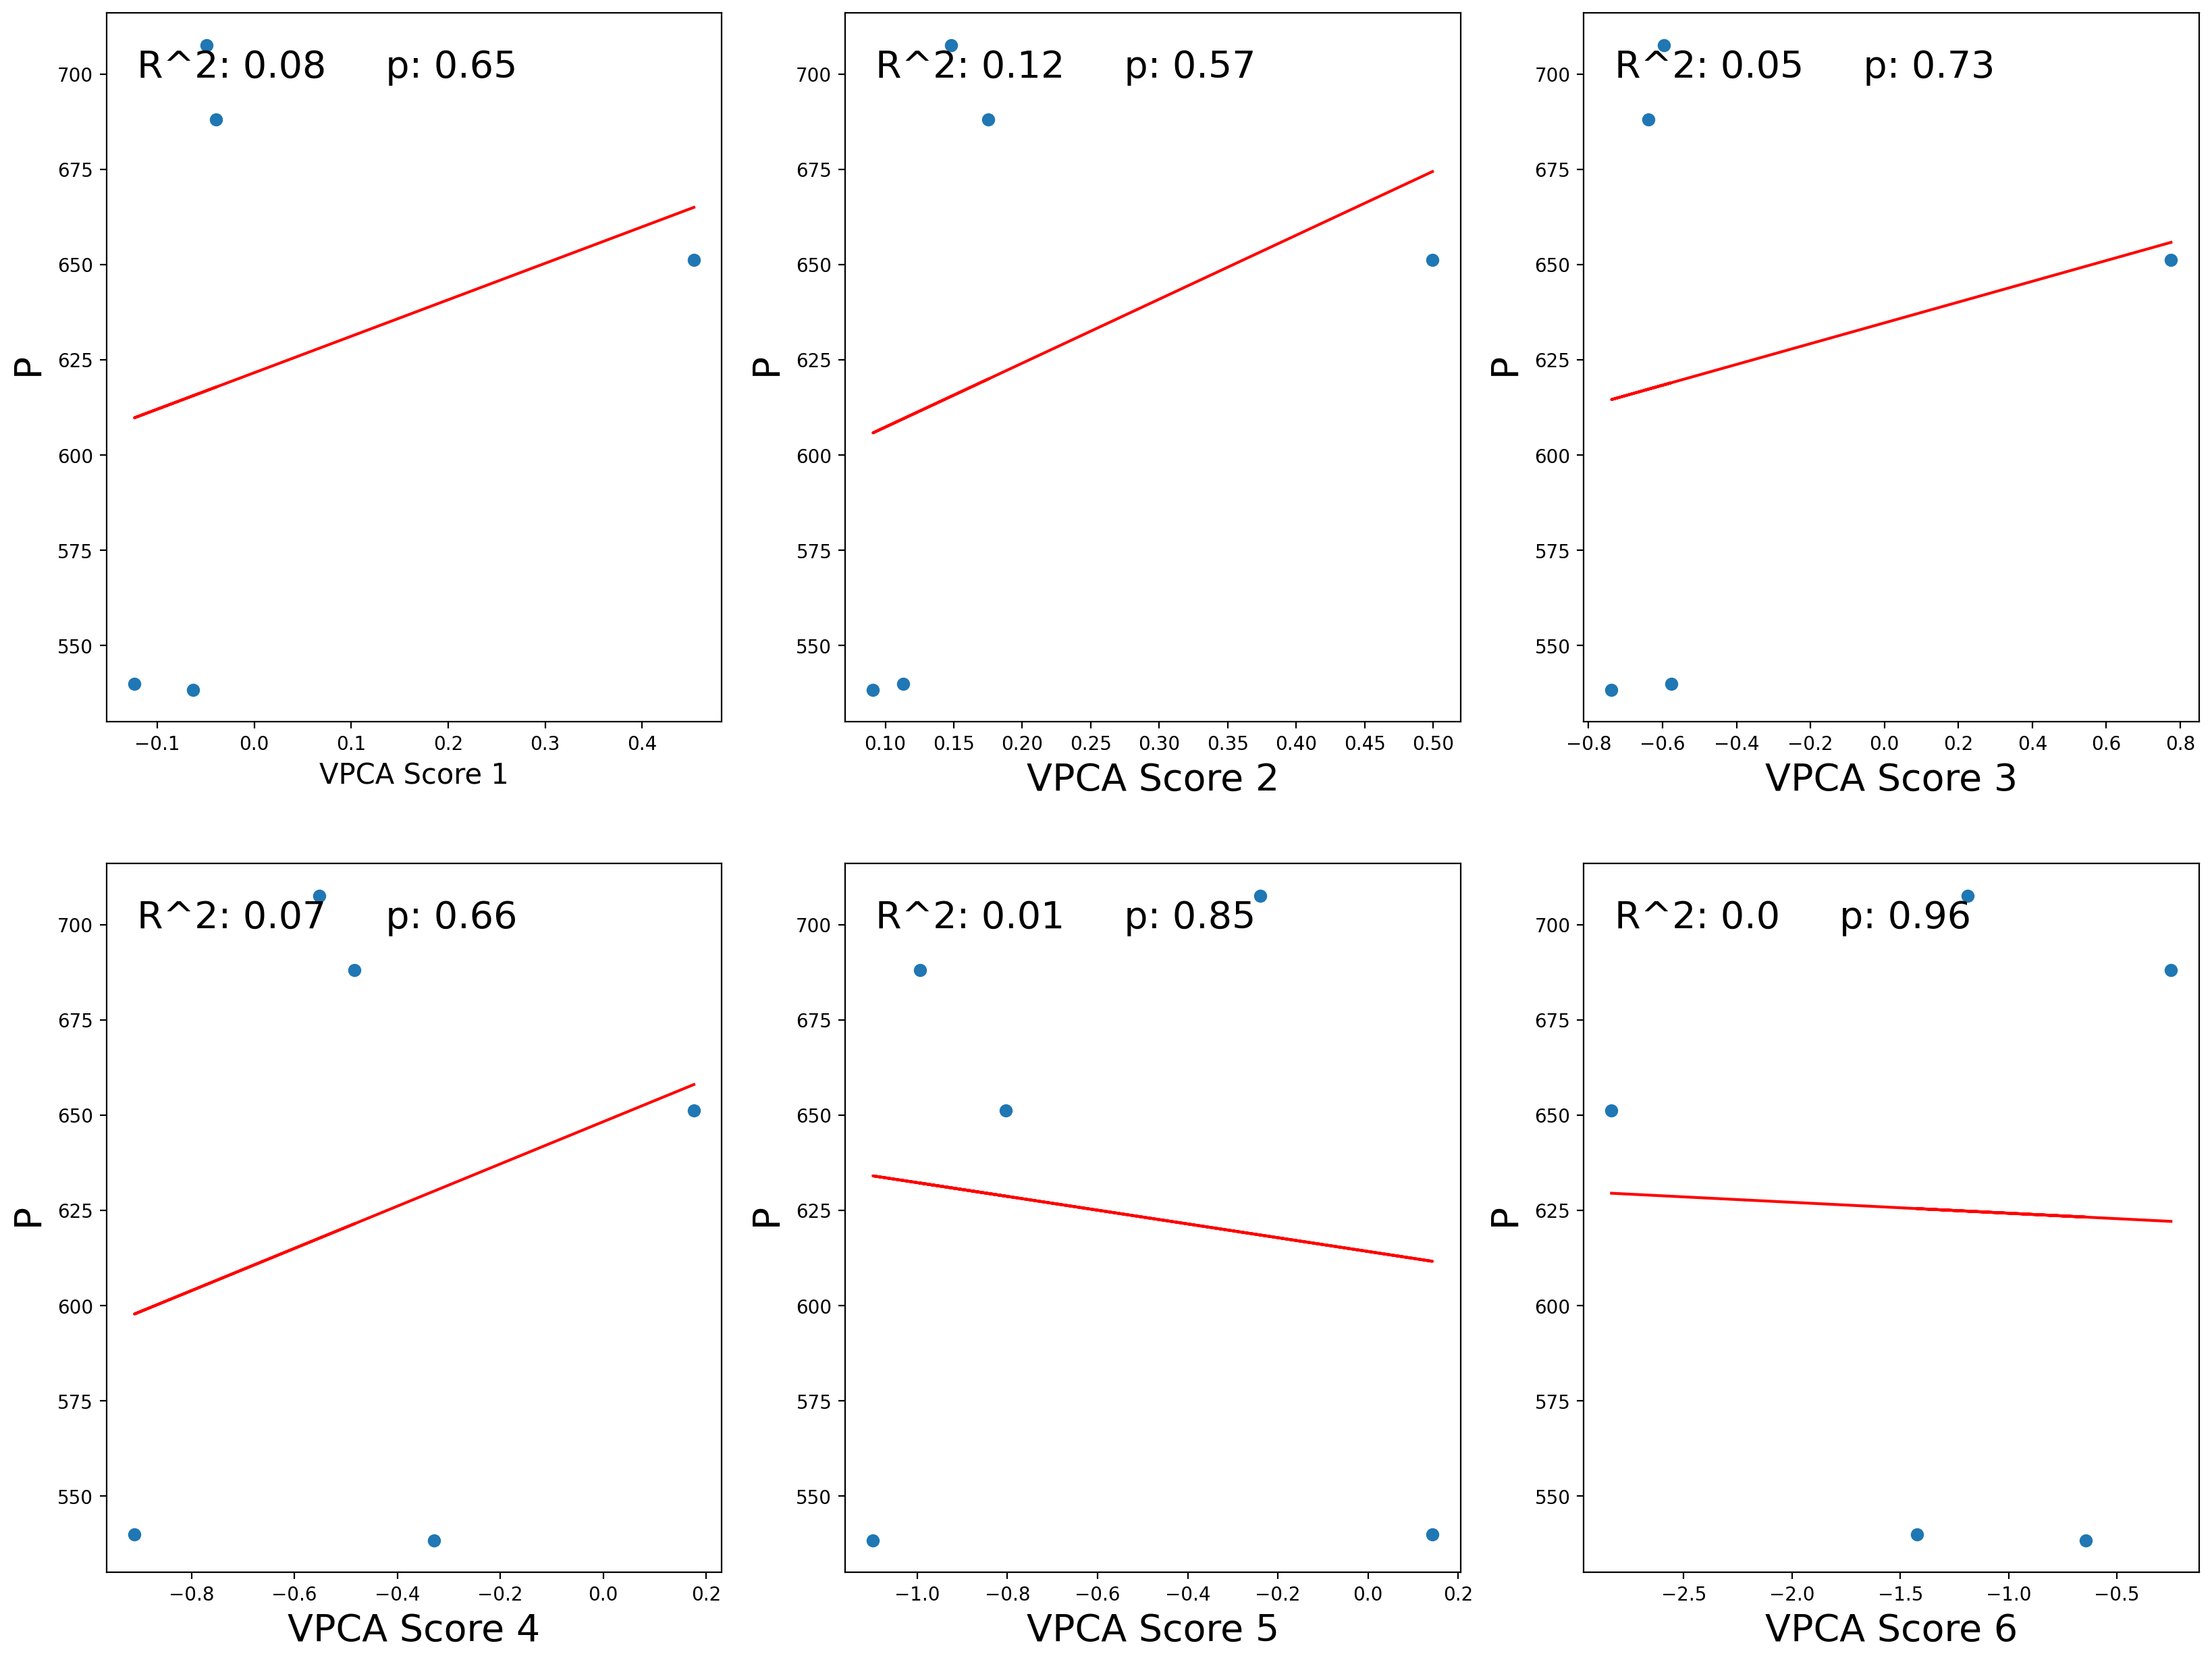

In [ ]:
from scipy.stats import linregress
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(2,3 , figsize= (20,15))
ax[0,0].scatter(LynnW_score_soil['6VPCA Score 1'], LynnW_shallow[' P '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 1'].astype(float), LynnW_shallow[' P '].astype(float))
ax[0,0].plot(LynnW_score_soil['6VPCA Score 1'], intercept + slope*LynnW_score_soil['6VPCA Score 1'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,0].text(0.05, 0.95, text1, transform=ax[0,0].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,0].set_ylabel(' P ',fontsize=20)
ax[0,0].set_xlabel('VPCA Score 1',fontsize=15)




ax[0,1].scatter(LynnW_score_soil['6VPCA Score 2'], LynnW_shallow[' P '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 2'].astype(float), LynnW_shallow[' P '].astype(float))
ax[0,1].plot(LynnW_score_soil['6VPCA Score 2'], intercept + slope*LynnW_score_soil['6VPCA Score 2'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,1].text(0.05, 0.95, text1, transform=ax[0,1].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,1].set_ylabel(' P ',fontsize=20)
ax[0,1].set_xlabel('VPCA Score 2',fontsize=20)


ax[0,2].scatter(LynnW_score_soil['6VPCA Score 3'], LynnW_shallow[' P '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 3'].astype(float), LynnW_shallow[' P '].astype(float))
ax[0,2].plot(LynnW_score_soil['6VPCA Score 3'], intercept + slope*LynnW_score_soil['6VPCA Score 3'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,2].text(0.05, 0.95, text1, transform=ax[0,2].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,2].set_ylabel(' P ',fontsize=20)
ax[0,2].set_xlabel('VPCA Score 3',fontsize=20)

ax[1,0].scatter(LynnW_score_soil['6VPCA Score 4'], LynnW_shallow[' P '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 4'].astype(float), LynnW_shallow[' P '].astype(float))
ax[1,0].plot(LynnW_score_soil['6VPCA Score 4'], intercept + slope*LynnW_score_soil['6VPCA Score 4'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,0].text(0.05, 0.95, text1, transform=ax[1,0].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,0].set_ylabel(' P ',fontsize=20)
ax[1,0].set_xlabel('VPCA Score 4',fontsize=20)


ax[1,1].scatter(LynnW_score_soil['6VPCA Score 5'], LynnW_shallow[' P '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 5'].astype(float), LynnW_shallow[' P '].astype(float))
ax[1,1].plot(LynnW_score_soil['6VPCA Score 5'], intercept + slope*LynnW_score_soil['6VPCA Score 5'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,1].text(0.05, 0.95, text1, transform=ax[1,1].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,1].set_ylabel(' P ',fontsize=20)
ax[1,1].set_xlabel('VPCA Score 5',fontsize=20)


ax[1,2].scatter(LynnW_score_soil['6VPCA Score 6'], LynnW_shallow[' P '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 6'].astype(float), LynnW_shallow[' P '].astype(float))
ax[1,2].plot(LynnW_score_soil['6VPCA Score 6'], intercept + slope*LynnW_score_soil['6VPCA Score 6'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,2].text(0.05, 0.95, text1, transform=ax[1,2].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,2].set_ylabel(' P ',fontsize=20)
ax[1,2].set_xlabel('VPCA Score 6',fontsize=20)

Text(0.5, 0, 'VPCA Score 6')

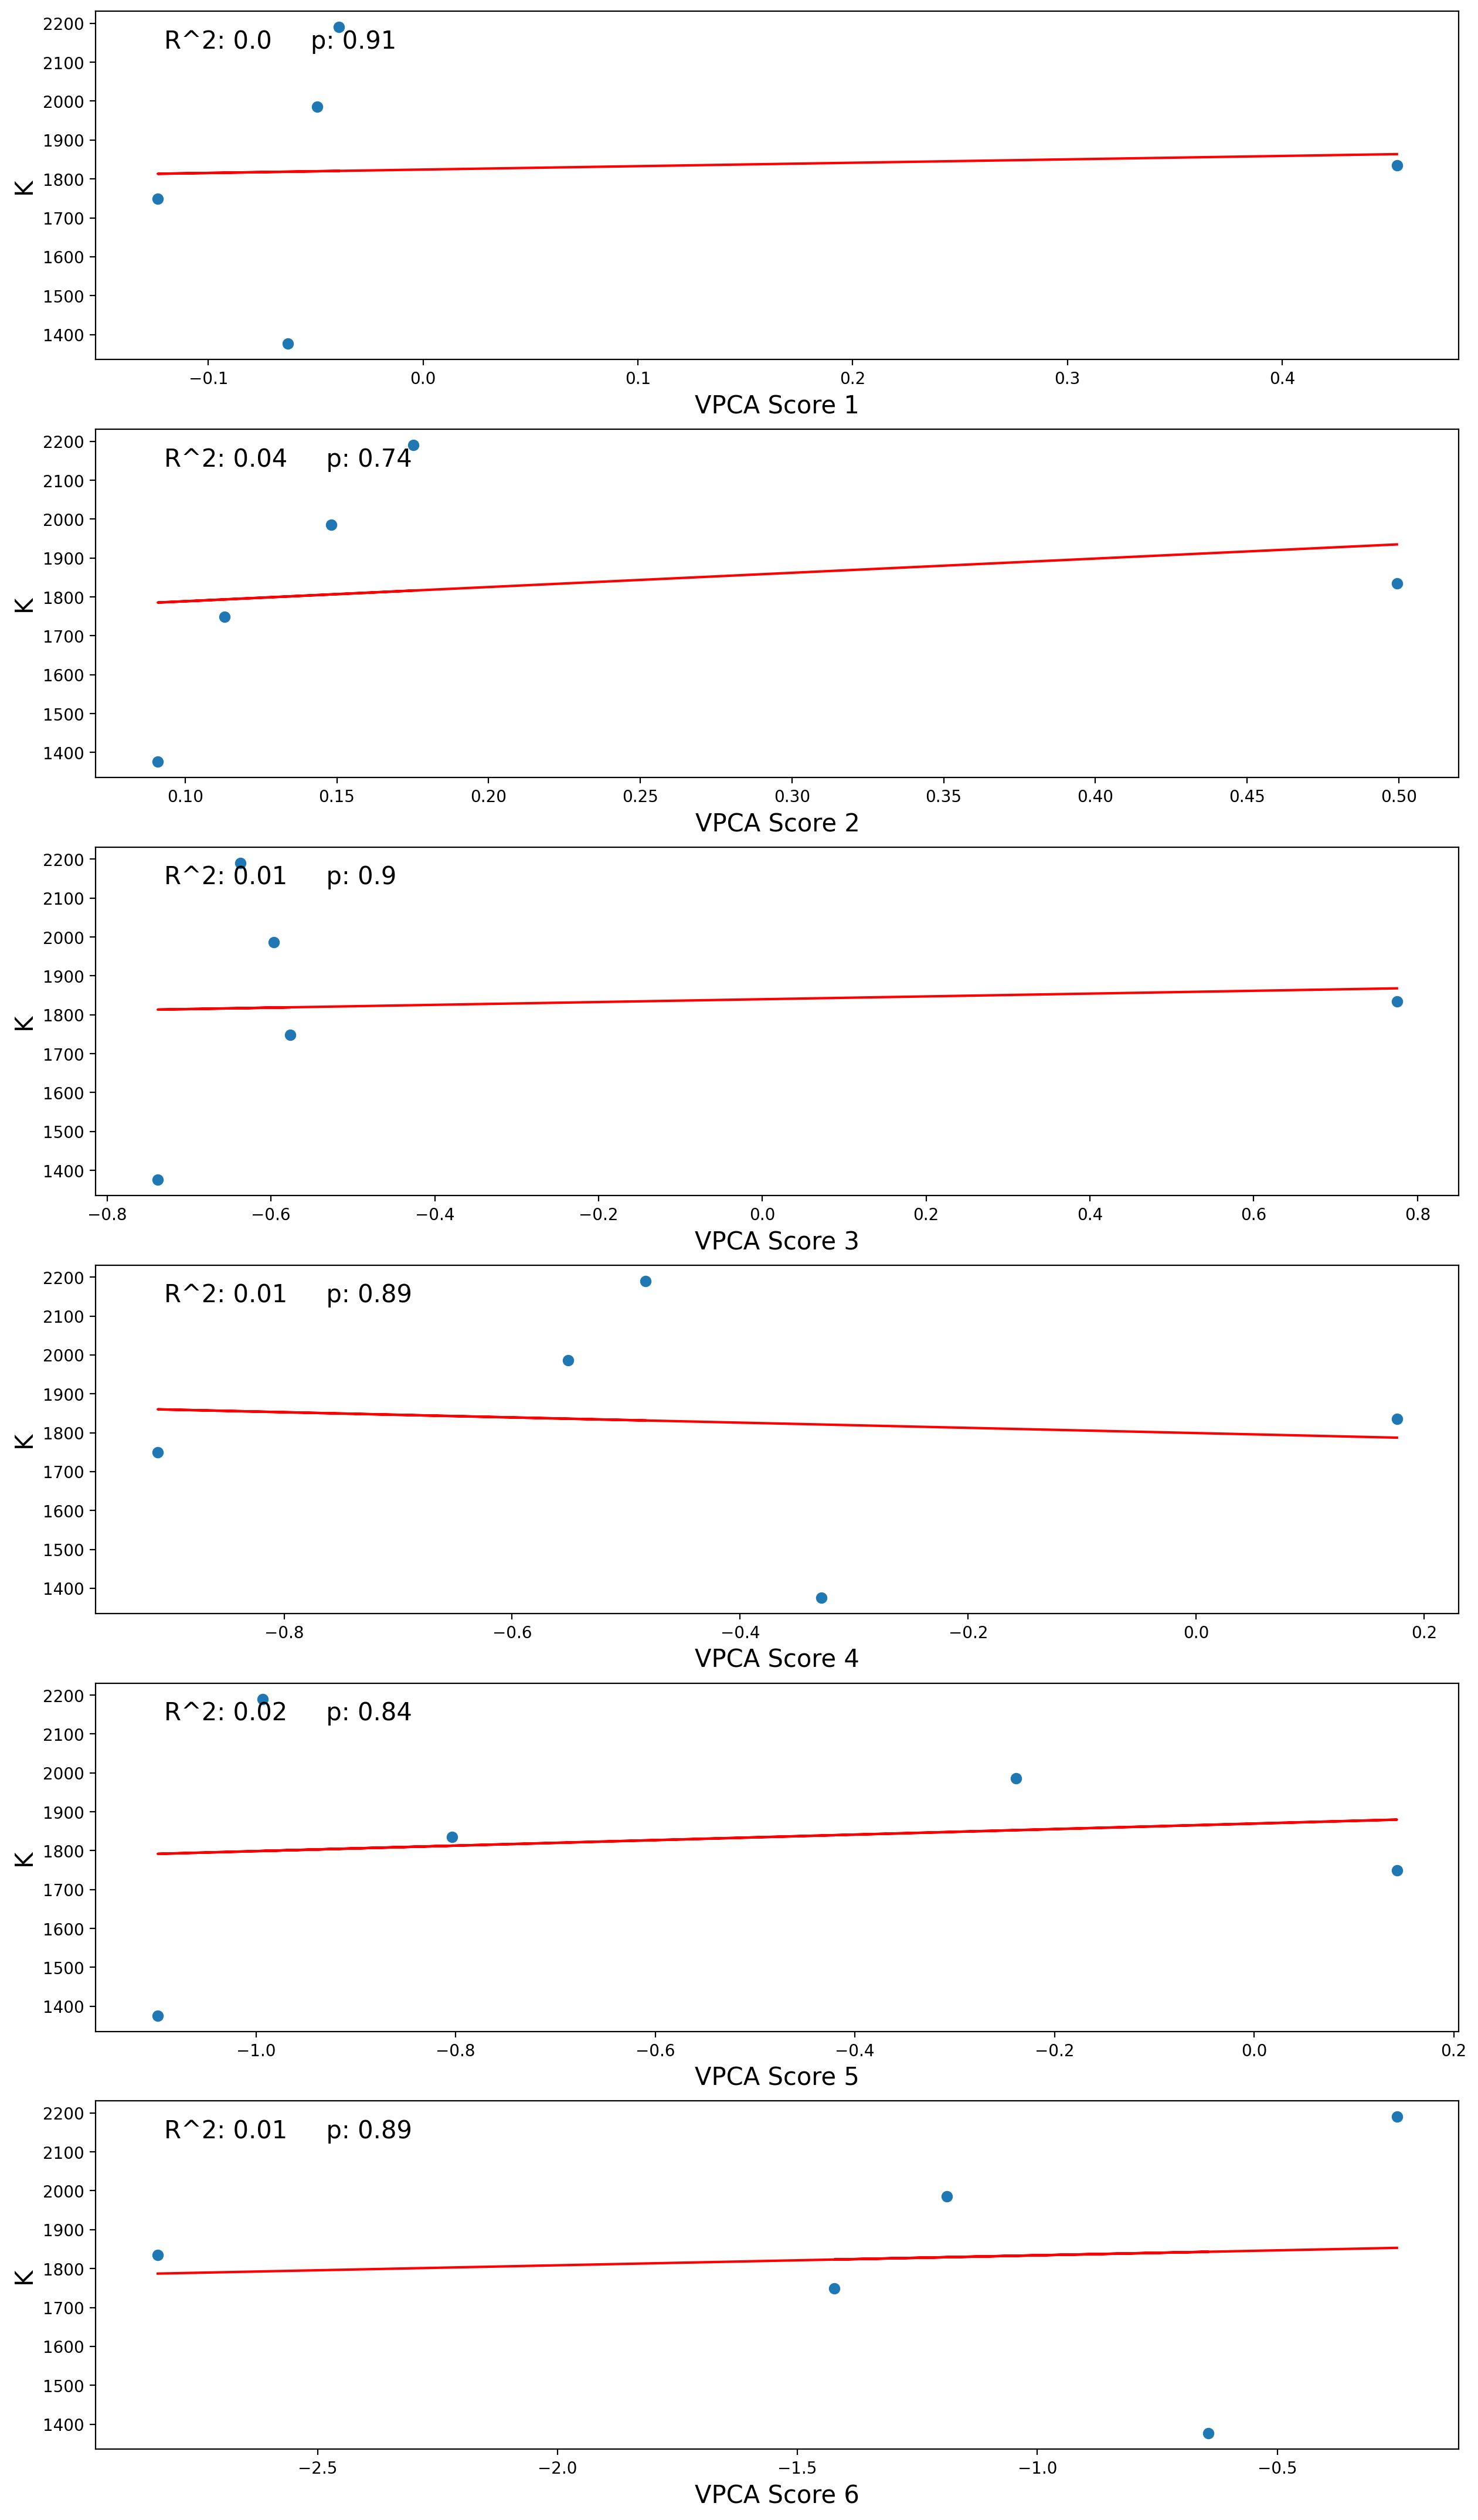

In [ ]:
from scipy.stats import linregress
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(6 , figsize= (15,27))
ax[0].scatter(LynnW_score_soil['6VPCA Score 1'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 1'].astype(float), LynnW_shallow[' K '].astype(float))
ax[0].plot(LynnW_score_soil['6VPCA Score 1'], intercept + slope*LynnW_score_soil['6VPCA Score 1'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0].text(0.05, 0.95, text1, transform=ax[0].transAxes,
     fontsize=15, verticalalignment='top')
ax[0].set_ylabel('K',fontsize=15)
ax[0].set_xlabel('VPCA Score 1',fontsize=15)




ax[1].scatter(LynnW_score_soil['6VPCA Score 2'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 2'].astype(float), LynnW_shallow[' K '].astype(float))
ax[1].plot(LynnW_score_soil['6VPCA Score 2'], intercept + slope*LynnW_score_soil['6VPCA Score 2'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1].text(0.05, 0.95, text1, transform=ax[1].transAxes,
     fontsize=15, verticalalignment='top')
ax[1].set_ylabel('K',fontsize=15)
ax[1].set_xlabel('VPCA Score 2',fontsize=15)


ax[2].scatter(LynnW_score_soil['6VPCA Score 3'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 3'].astype(float), LynnW_shallow[' K '].astype(float))
ax[2].plot(LynnW_score_soil['6VPCA Score 3'], intercept + slope*LynnW_score_soil['6VPCA Score 3'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[2].text(0.05, 0.95, text1, transform=ax[2].transAxes,
     fontsize=15, verticalalignment='top')
ax[2].set_ylabel('K',fontsize=15)
ax[2].set_xlabel('VPCA Score 3',fontsize=15)

ax[3].scatter(LynnW_score_soil['6VPCA Score 4'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 4'].astype(float), LynnW_shallow[' K '].astype(float))
ax[3].plot(LynnW_score_soil['6VPCA Score 4'], intercept + slope*LynnW_score_soil['6VPCA Score 4'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[3].text(0.05, 0.95, text1, transform=ax[3].transAxes,
     fontsize=15, verticalalignment='top')
ax[3].set_ylabel('K',fontsize=15)
ax[3].set_xlabel('VPCA Score 4',fontsize=15)


ax[4].scatter(LynnW_score_soil['6VPCA Score 5'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 5'].astype(float), LynnW_shallow[' K '].astype(float))
ax[4].plot(LynnW_score_soil['6VPCA Score 5'], intercept + slope*LynnW_score_soil['6VPCA Score 5'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[4].text(0.05, 0.95, text1, transform=ax[4].transAxes,
     fontsize=15, verticalalignment='top')
ax[4].set_ylabel('K',fontsize=15)
ax[4].set_xlabel('VPCA Score 5',fontsize=15)


ax[5].scatter(LynnW_score_soil['6VPCA Score 6'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 6'].astype(float), LynnW_shallow[' K '].astype(float))
ax[5].plot(LynnW_score_soil['6VPCA Score 6'], intercept + slope*LynnW_score_soil['6VPCA Score 6'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[5].text(0.05, 0.95, text1, transform=ax[5].transAxes,
     fontsize=15, verticalalignment='top')
ax[5].set_ylabel('K',fontsize=15)
ax[5].set_xlabel('VPCA Score 6',fontsize=15)

Text(0.5, 0, 'VPCA Score 6')

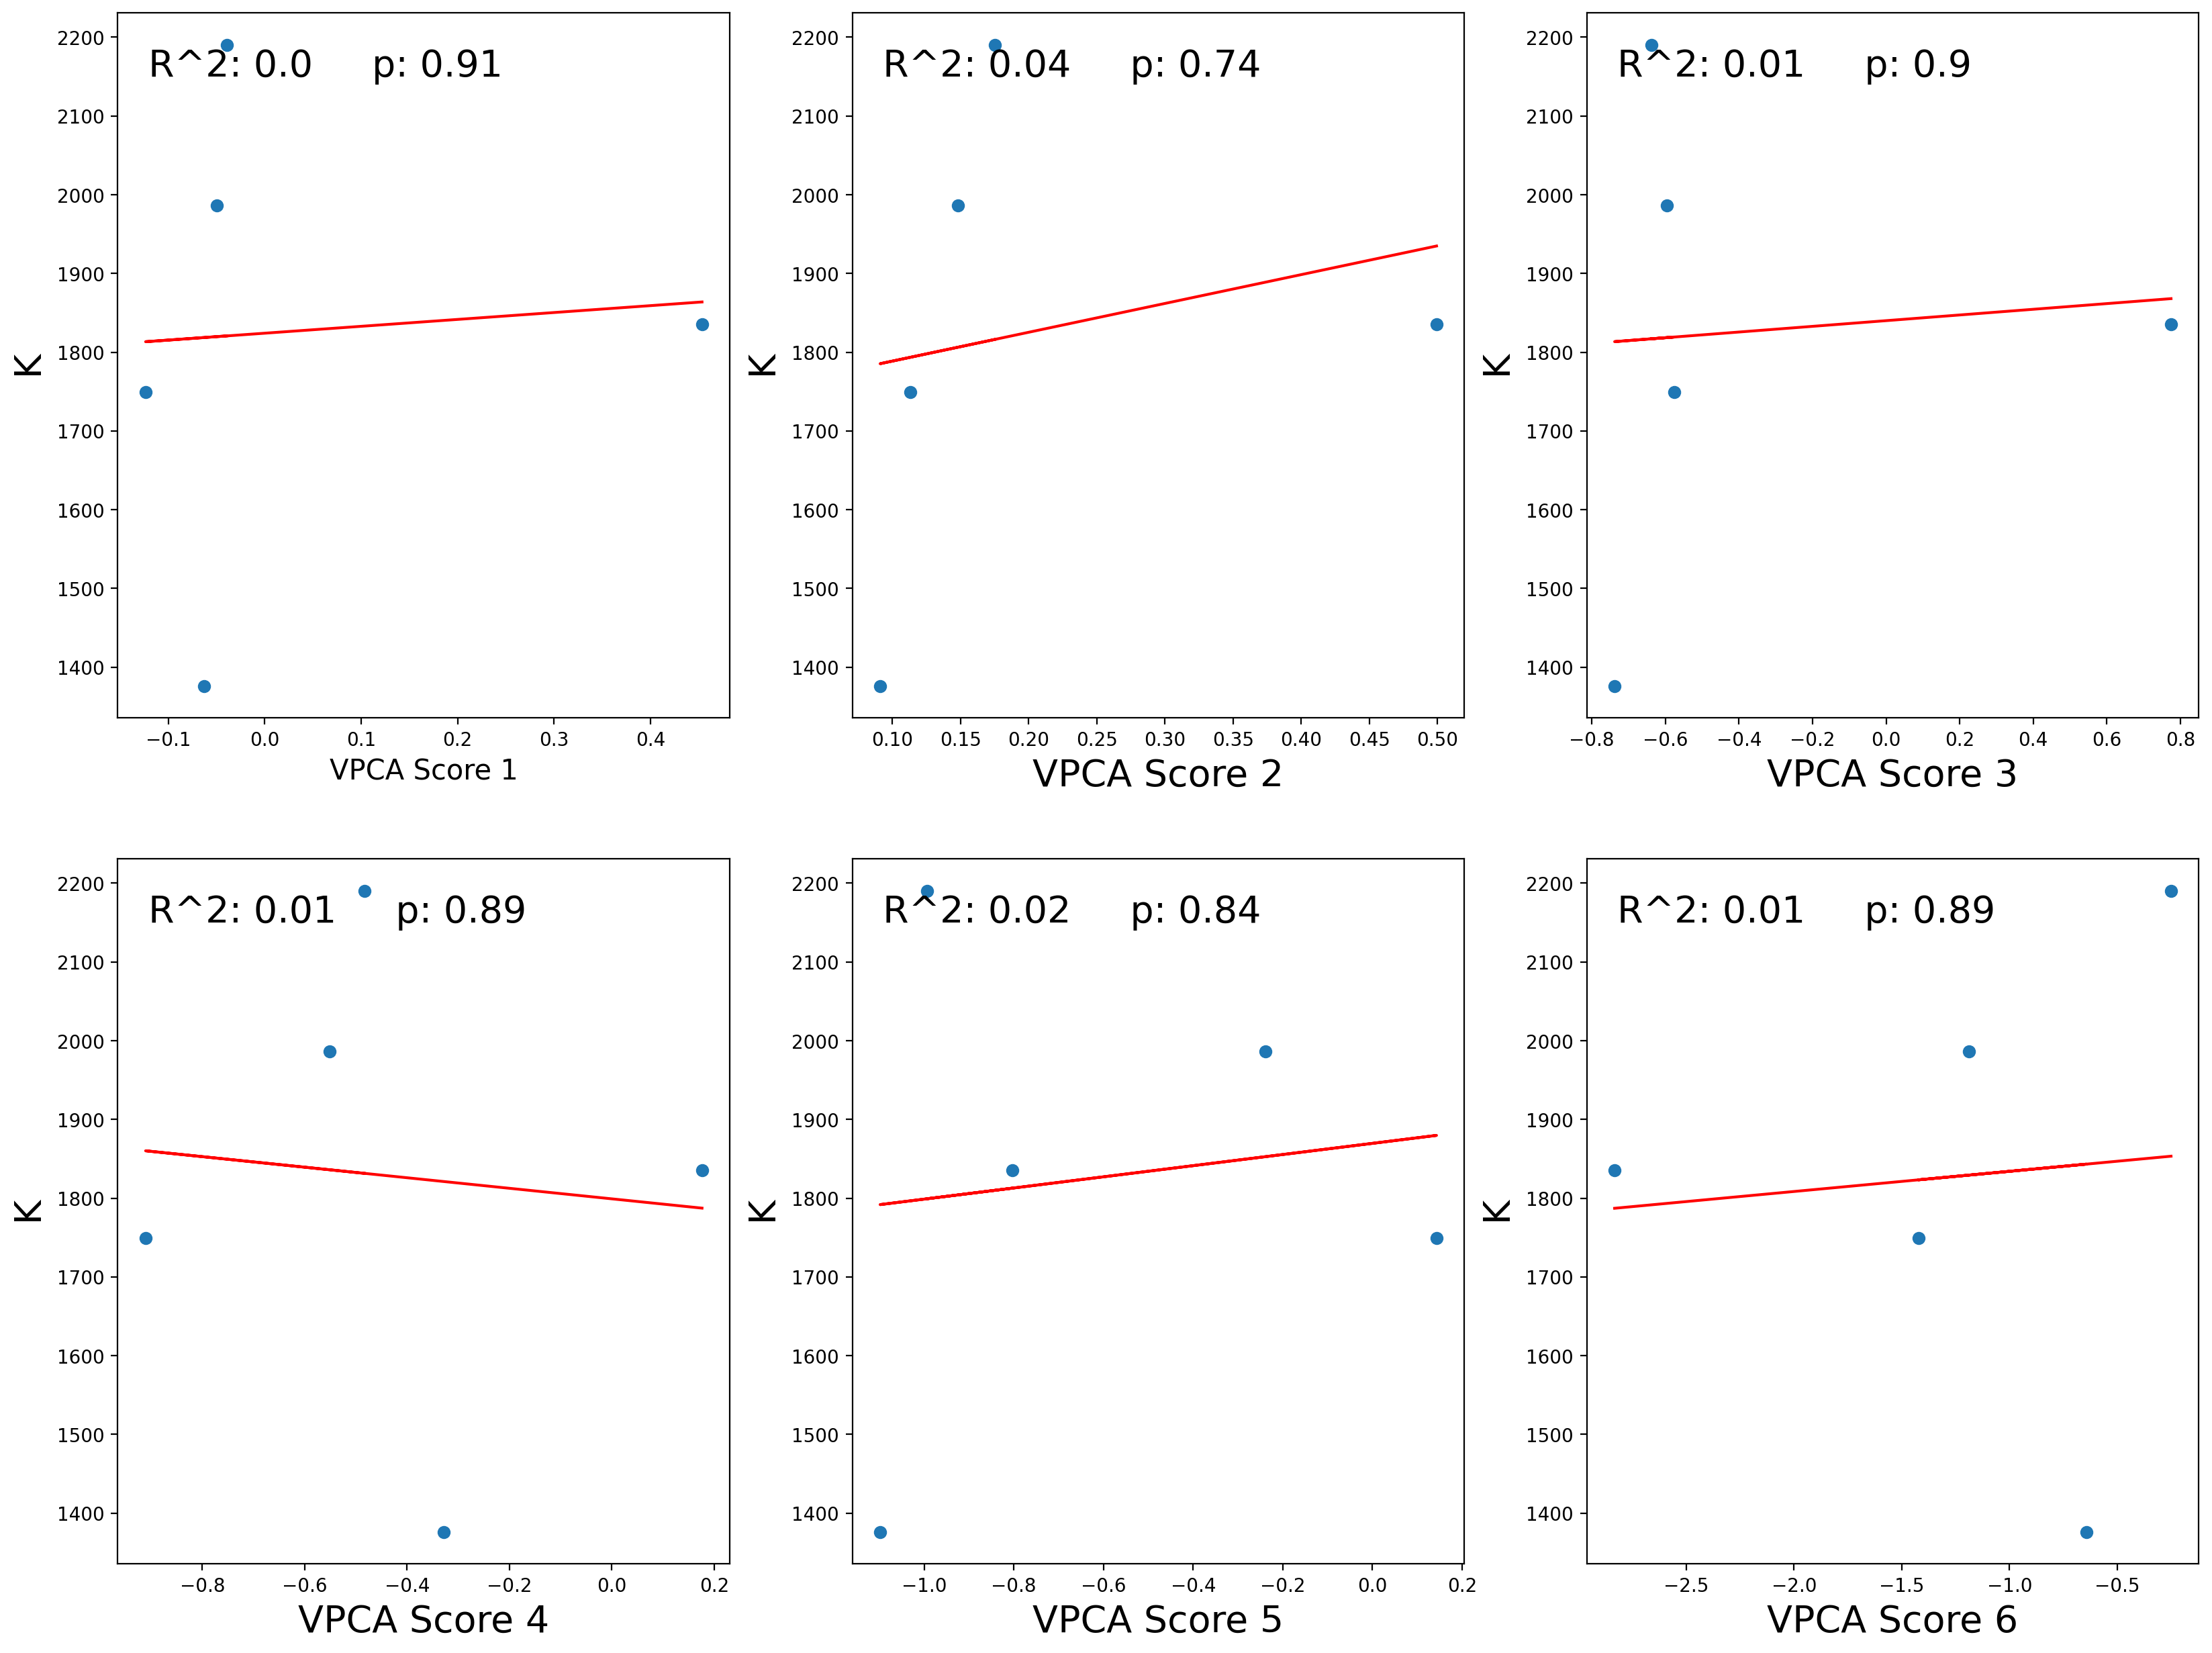

In [ ]:
from scipy.stats import linregress
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(2,3 , figsize= (20,15))
ax[0,0].scatter(LynnW_score_soil['6VPCA Score 1'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 1'].astype(float), LynnW_shallow[' K '].astype(float))
ax[0,0].plot(LynnW_score_soil['6VPCA Score 1'], intercept + slope*LynnW_score_soil['6VPCA Score 1'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,0].text(0.05, 0.95, text1, transform=ax[0,0].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,0].set_ylabel(' K ',fontsize=20)
ax[0,0].set_xlabel('VPCA Score 1',fontsize=15)




ax[0,1].scatter(LynnW_score_soil['6VPCA Score 2'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 2'].astype(float), LynnW_shallow[' K '].astype(float))
ax[0,1].plot(LynnW_score_soil['6VPCA Score 2'], intercept + slope*LynnW_score_soil['6VPCA Score 2'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,1].text(0.05, 0.95, text1, transform=ax[0,1].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,1].set_ylabel(' K ',fontsize=20)
ax[0,1].set_xlabel('VPCA Score 2',fontsize=20)


ax[0,2].scatter(LynnW_score_soil['6VPCA Score 3'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 3'].astype(float), LynnW_shallow[' K '].astype(float))
ax[0,2].plot(LynnW_score_soil['6VPCA Score 3'], intercept + slope*LynnW_score_soil['6VPCA Score 3'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,2].text(0.05, 0.95, text1, transform=ax[0,2].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,2].set_ylabel(' K ',fontsize=20)
ax[0,2].set_xlabel('VPCA Score 3',fontsize=20)

ax[1,0].scatter(LynnW_score_soil['6VPCA Score 4'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 4'].astype(float), LynnW_shallow[' K '].astype(float))
ax[1,0].plot(LynnW_score_soil['6VPCA Score 4'], intercept + slope*LynnW_score_soil['6VPCA Score 4'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,0].text(0.05, 0.95, text1, transform=ax[1,0].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,0].set_ylabel(' K ',fontsize=20)
ax[1,0].set_xlabel('VPCA Score 4',fontsize=20)


ax[1,1].scatter(LynnW_score_soil['6VPCA Score 5'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 5'].astype(float), LynnW_shallow[' K '].astype(float))
ax[1,1].plot(LynnW_score_soil['6VPCA Score 5'], intercept + slope*LynnW_score_soil['6VPCA Score 5'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,1].text(0.05, 0.95, text1, transform=ax[1,1].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,1].set_ylabel(' K ',fontsize=20)
ax[1,1].set_xlabel('VPCA Score 5',fontsize=20)


ax[1,2].scatter(LynnW_score_soil['6VPCA Score 6'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 6'].astype(float), LynnW_shallow[' K '].astype(float))
ax[1,2].plot(LynnW_score_soil['6VPCA Score 6'], intercept + slope*LynnW_score_soil['6VPCA Score 6'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,2].text(0.05, 0.95, text1, transform=ax[1,2].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,2].set_ylabel(' K ',fontsize=20)
ax[1,2].set_xlabel('VPCA Score 6',fontsize=20)

Text(0.5, 0, 'VPCA Score 6')

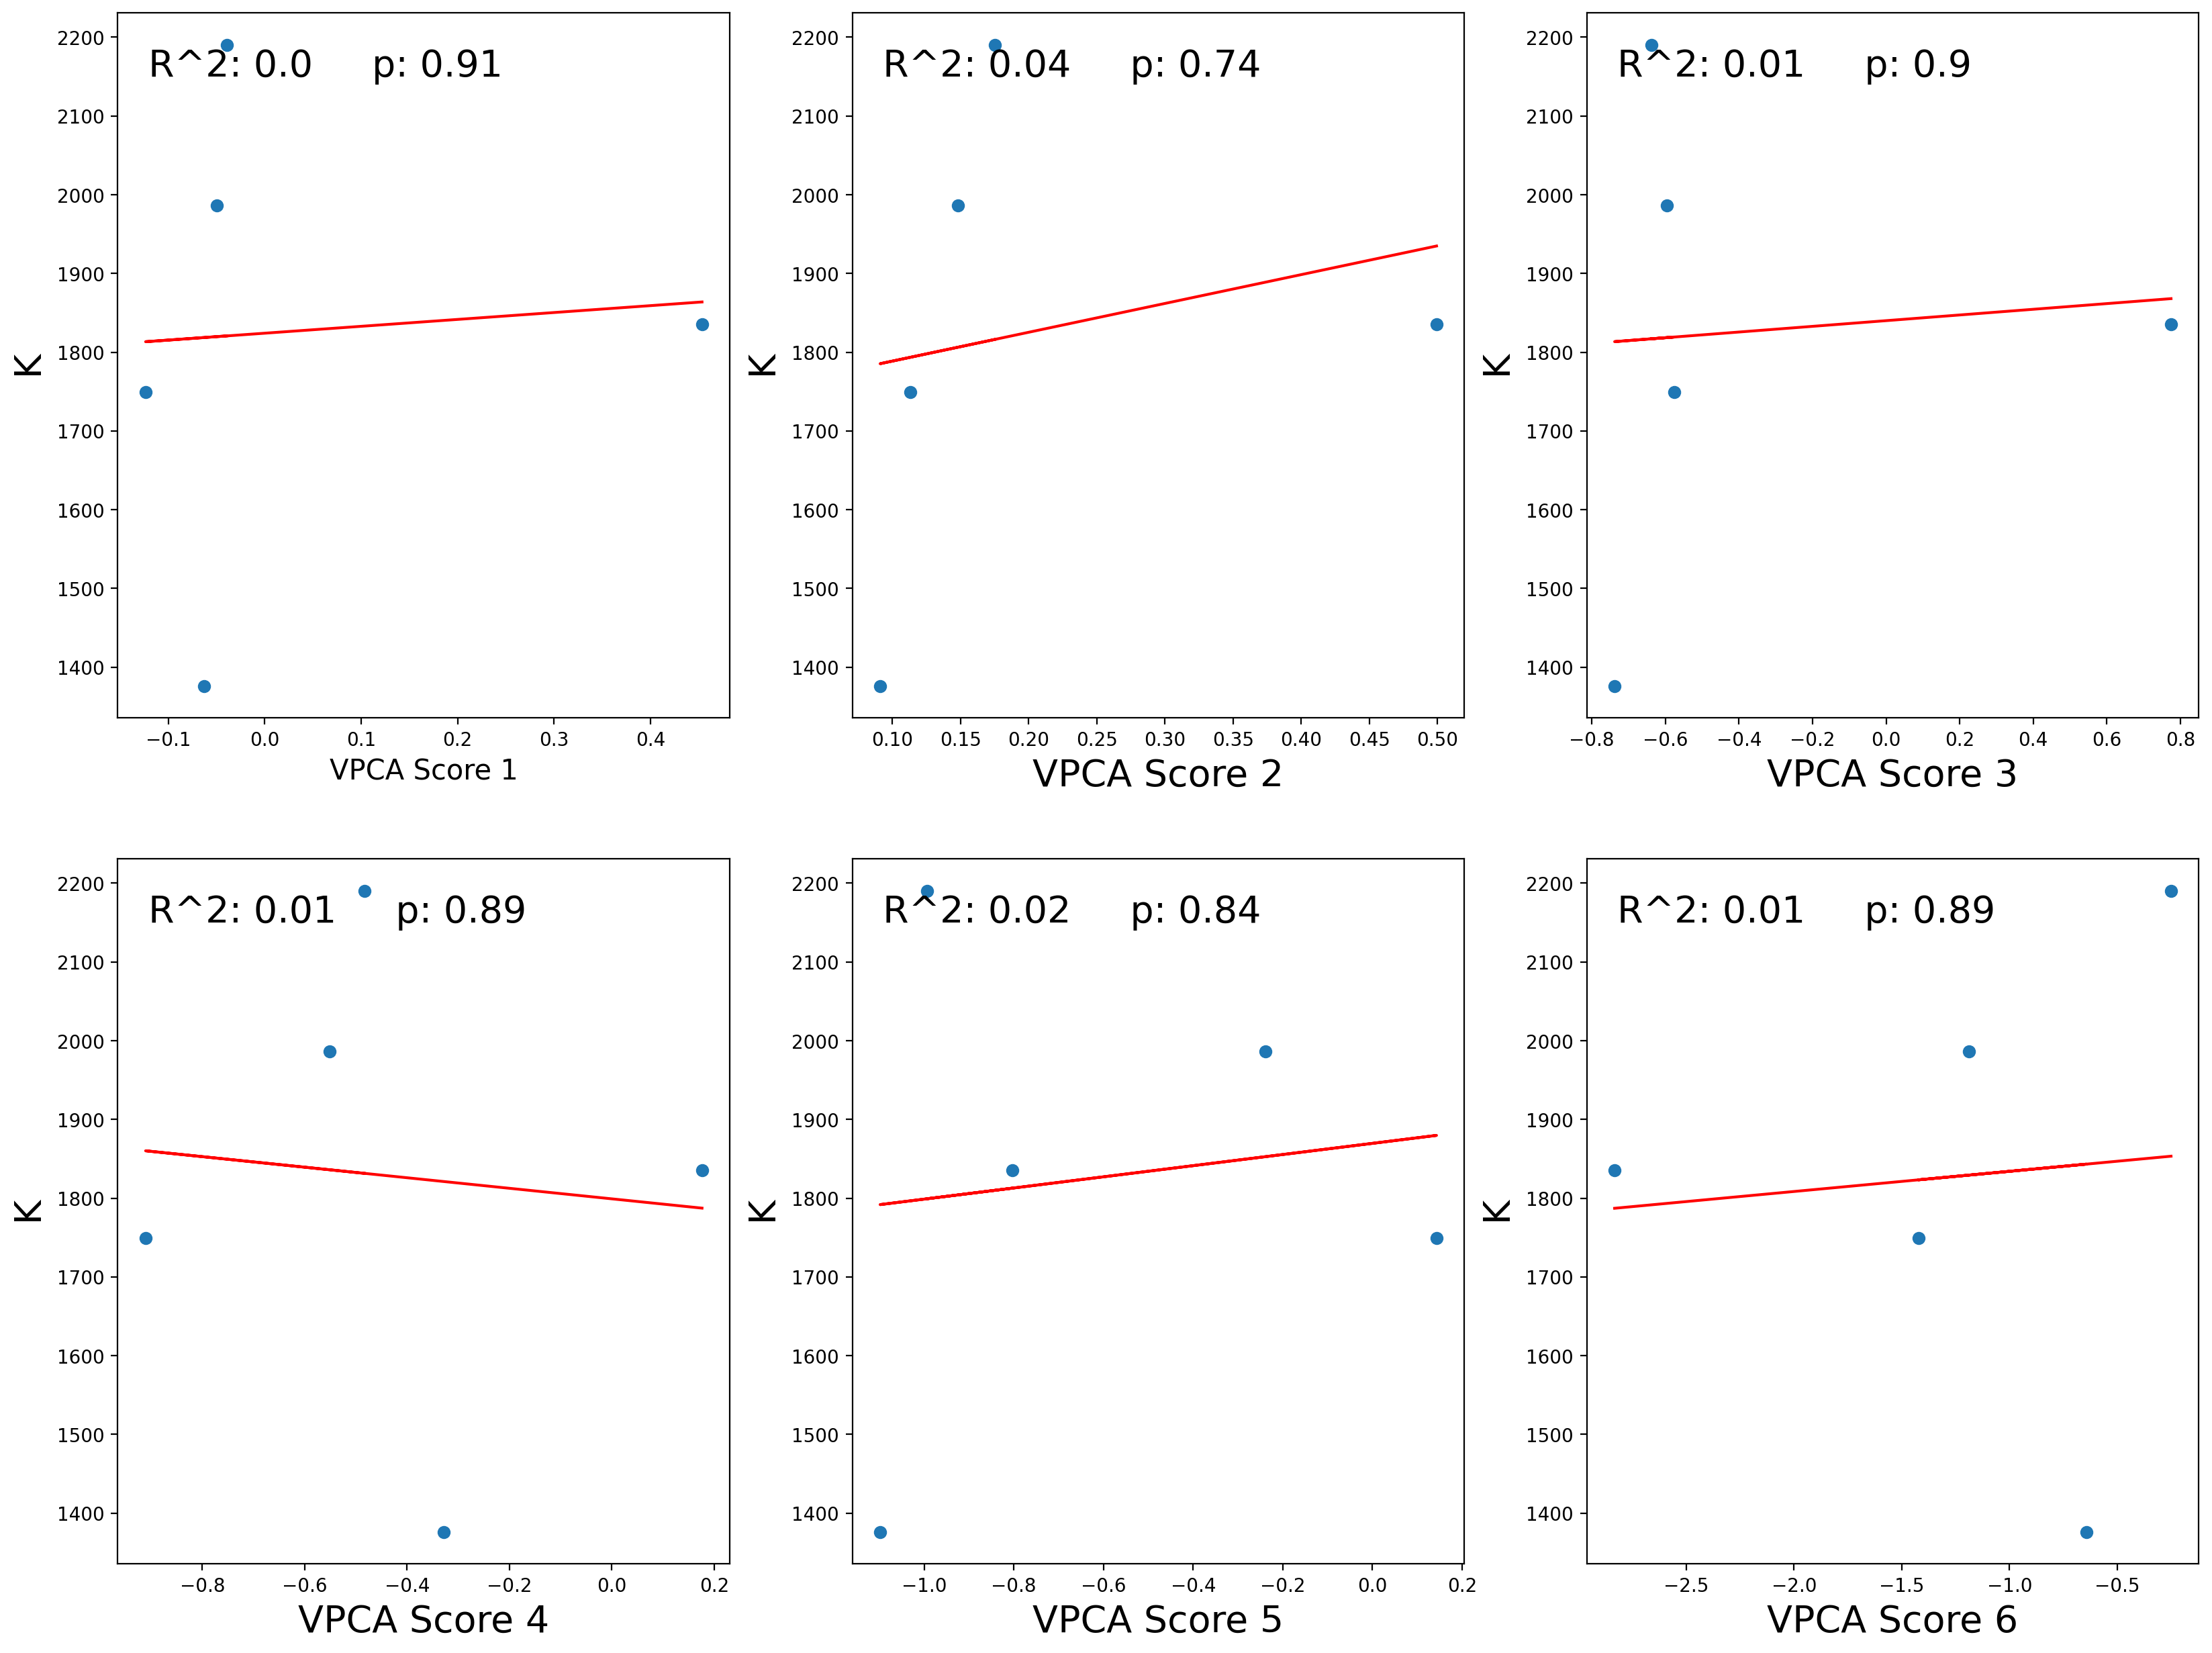

In [ ]:
from scipy.stats import linregress
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(2,3 , figsize= (20,15))
ax[0,0].scatter(LynnW_score_soil['6VPCA Score 1'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 1'].astype(float), LynnW_shallow[' K '].astype(float))
ax[0,0].plot(LynnW_score_soil['6VPCA Score 1'], intercept + slope*LynnW_score_soil['6VPCA Score 1'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,0].text(0.05, 0.95, text1, transform=ax[0,0].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,0].set_ylabel(' K ',fontsize=20)
ax[0,0].set_xlabel('VPCA Score 1',fontsize=15)




ax[0,1].scatter(LynnW_score_soil['6VPCA Score 2'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 2'].astype(float), LynnW_shallow[' K '].astype(float))
ax[0,1].plot(LynnW_score_soil['6VPCA Score 2'], intercept + slope*LynnW_score_soil['6VPCA Score 2'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,1].text(0.05, 0.95, text1, transform=ax[0,1].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,1].set_ylabel(' K ',fontsize=20)
ax[0,1].set_xlabel('VPCA Score 2',fontsize=20)


ax[0,2].scatter(LynnW_score_soil['6VPCA Score 3'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 3'].astype(float), LynnW_shallow[' K '].astype(float))
ax[0,2].plot(LynnW_score_soil['6VPCA Score 3'], intercept + slope*LynnW_score_soil['6VPCA Score 3'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,2].text(0.05, 0.95, text1, transform=ax[0,2].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,2].set_ylabel(' K ',fontsize=20)
ax[0,2].set_xlabel('VPCA Score 3',fontsize=20)

ax[1,0].scatter(LynnW_score_soil['6VPCA Score 4'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 4'].astype(float), LynnW_shallow[' K '].astype(float))
ax[1,0].plot(LynnW_score_soil['6VPCA Score 4'], intercept + slope*LynnW_score_soil['6VPCA Score 4'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,0].text(0.05, 0.95, text1, transform=ax[1,0].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,0].set_ylabel(' K ',fontsize=20)
ax[1,0].set_xlabel('VPCA Score 4',fontsize=20)


ax[1,1].scatter(LynnW_score_soil['6VPCA Score 5'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 5'].astype(float), LynnW_shallow[' K '].astype(float))
ax[1,1].plot(LynnW_score_soil['6VPCA Score 5'], intercept + slope*LynnW_score_soil['6VPCA Score 5'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,1].text(0.05, 0.95, text1, transform=ax[1,1].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,1].set_ylabel(' K ',fontsize=20)
ax[1,1].set_xlabel('VPCA Score 5',fontsize=20)


ax[1,2].scatter(LynnW_score_soil['6VPCA Score 6'], LynnW_shallow[' K '])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 6'].astype(float), LynnW_shallow[' K '].astype(float))
ax[1,2].plot(LynnW_score_soil['6VPCA Score 6'], intercept + slope*LynnW_score_soil['6VPCA Score 6'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,2].text(0.05, 0.95, text1, transform=ax[1,2].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,2].set_ylabel(' K ',fontsize=20)
ax[1,2].set_xlabel('VPCA Score 6',fontsize=20)

Text(0.5, 0, 'VPCA Score 6')

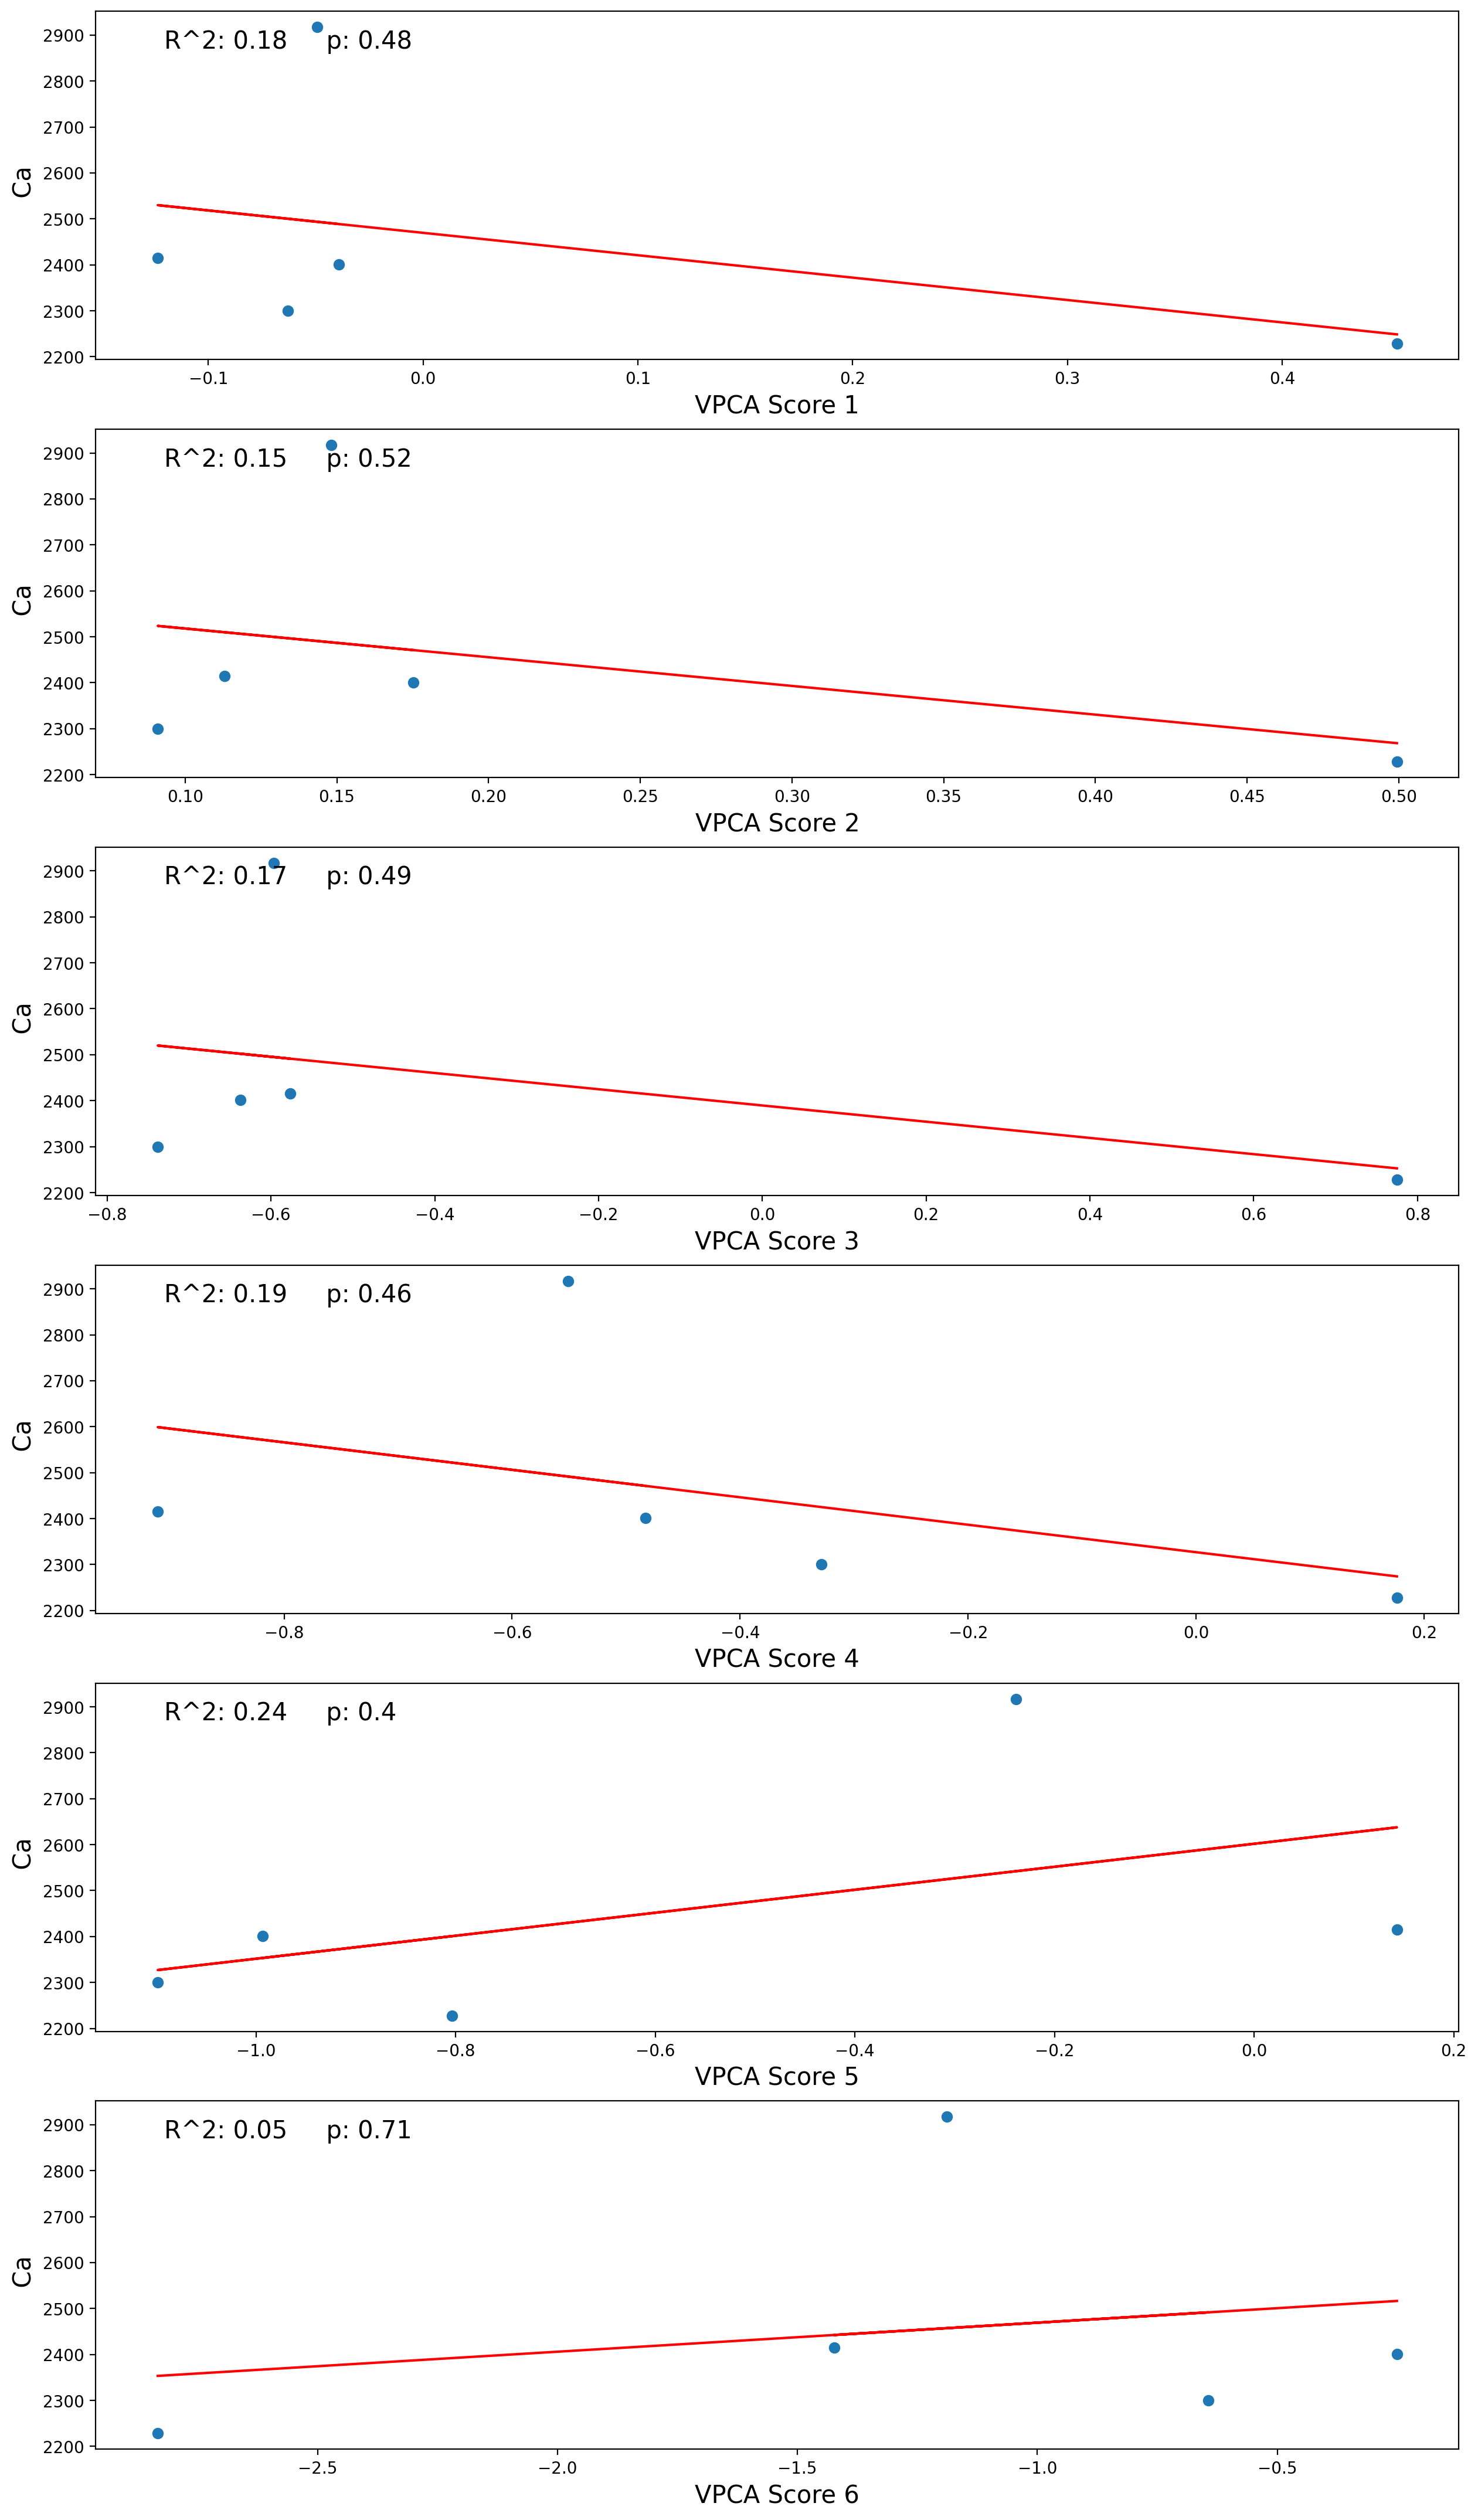

In [ ]:
from scipy.stats import linregress
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(6 , figsize= (15,27))
ax[0].scatter(LynnW_score_soil['6VPCA Score 1'], LynnW_shallow[' Ca'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 1'].astype(float), LynnW_shallow[' Ca'].astype(float))
ax[0].plot(LynnW_score_soil['6VPCA Score 1'], intercept + slope*LynnW_score_soil['6VPCA Score 1'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0].text(0.05, 0.95, text1, transform=ax[0].transAxes,
     fontsize=15, verticalalignment='top')
ax[0].set_ylabel(' Ca',fontsize=15)
ax[0].set_xlabel('VPCA Score 1',fontsize=15)




ax[1].scatter(LynnW_score_soil['6VPCA Score 2'], LynnW_shallow[' Ca'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 2'].astype(float), LynnW_shallow[' Ca'].astype(float))
ax[1].plot(LynnW_score_soil['6VPCA Score 2'], intercept + slope*LynnW_score_soil['6VPCA Score 2'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1].text(0.05, 0.95, text1, transform=ax[1].transAxes,
     fontsize=15, verticalalignment='top')
ax[1].set_ylabel(' Ca',fontsize=15)
ax[1].set_xlabel('VPCA Score 2',fontsize=15)


ax[2].scatter(LynnW_score_soil['6VPCA Score 3'], LynnW_shallow[' Ca'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 3'].astype(float), LynnW_shallow[' Ca'].astype(float))
ax[2].plot(LynnW_score_soil['6VPCA Score 3'], intercept + slope*LynnW_score_soil['6VPCA Score 3'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[2].text(0.05, 0.95, text1, transform=ax[2].transAxes,
     fontsize=15, verticalalignment='top')
ax[2].set_ylabel(' Ca',fontsize=15)
ax[2].set_xlabel('VPCA Score 3',fontsize=15)

ax[3].scatter(LynnW_score_soil['6VPCA Score 4'], LynnW_shallow[' Ca'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 4'].astype(float), LynnW_shallow[' Ca'].astype(float))
ax[3].plot(LynnW_score_soil['6VPCA Score 4'], intercept + slope*LynnW_score_soil['6VPCA Score 4'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[3].text(0.05, 0.95, text1, transform=ax[3].transAxes,
     fontsize=15, verticalalignment='top')
ax[3].set_ylabel(' Ca',fontsize=15)
ax[3].set_xlabel('VPCA Score 4',fontsize=15)


ax[4].scatter(LynnW_score_soil['6VPCA Score 5'], LynnW_shallow[' Ca'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 5'].astype(float), LynnW_shallow[' Ca'].astype(float))
ax[4].plot(LynnW_score_soil['6VPCA Score 5'], intercept + slope*LynnW_score_soil['6VPCA Score 5'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[4].text(0.05, 0.95, text1, transform=ax[4].transAxes,
     fontsize=15, verticalalignment='top')
ax[4].set_ylabel(' Ca',fontsize=15)
ax[4].set_xlabel('VPCA Score 5',fontsize=15)

ax[5].scatter(LynnW_score_soil['6VPCA Score 6'], LynnW_shallow[' Ca'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 6'].astype(float), LynnW_shallow[' Ca'].astype(float))
ax[5].plot(LynnW_score_soil['6VPCA Score 6'], intercept + slope*LynnW_score_soil['6VPCA Score 6'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[5].text(0.05, 0.95, text1, transform=ax[5].transAxes,
     fontsize=15, verticalalignment='top')
ax[5].set_ylabel(' Ca',fontsize=15)
ax[5].set_xlabel('VPCA Score 6',fontsize=15)

0.657333574784953

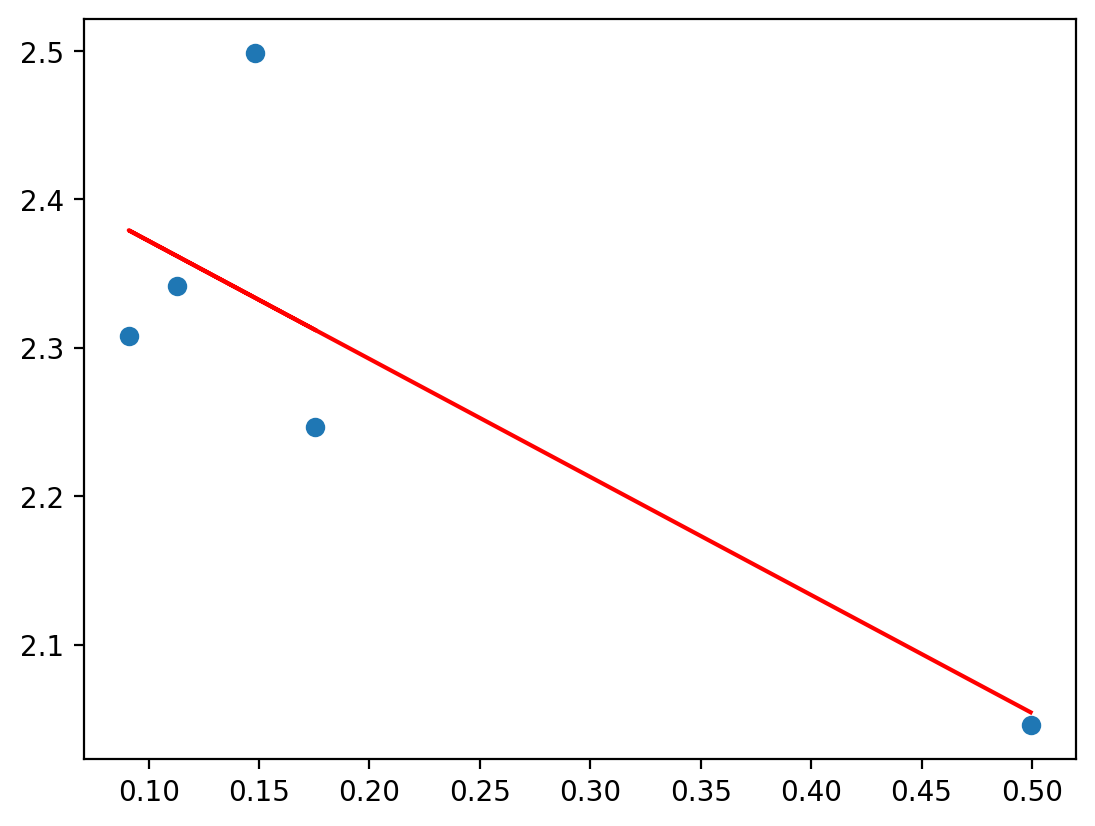

In [ ]:
from scipy.stats import linregress
plt.scatter(LynnW_score_soil['6VPCA Score 2'], LynnW_shallow['%C'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 2'].astype(float), LynnW_shallow['%C'].astype(float))
plt.plot(LynnW_score_soil['6VPCA Score 2'], intercept + slope*LynnW_score_soil['6VPCA Score 2'], 'r', label='fitted line')

r_value**2

0.6352143388602356

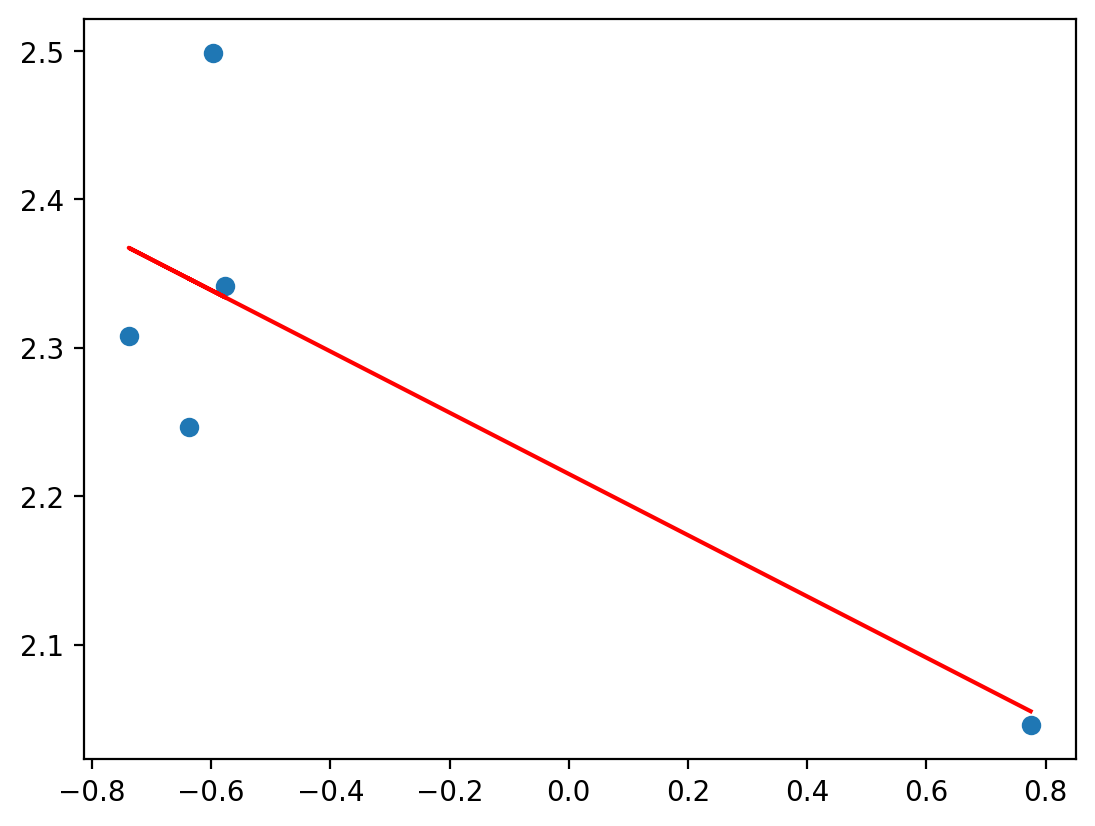

In [ ]:
from scipy.stats import linregress
plt.scatter(LynnW_score_soil['6VPCA Score 3'], LynnW_shallow['%C'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 3'].astype(float), LynnW_shallow['%C'].astype(float))
plt.plot(LynnW_score_soil['6VPCA Score 3'], intercept + slope*LynnW_score_soil['6VPCA Score 3'], 'r', label='fitted line')

r_value**2

0.5564780460971218

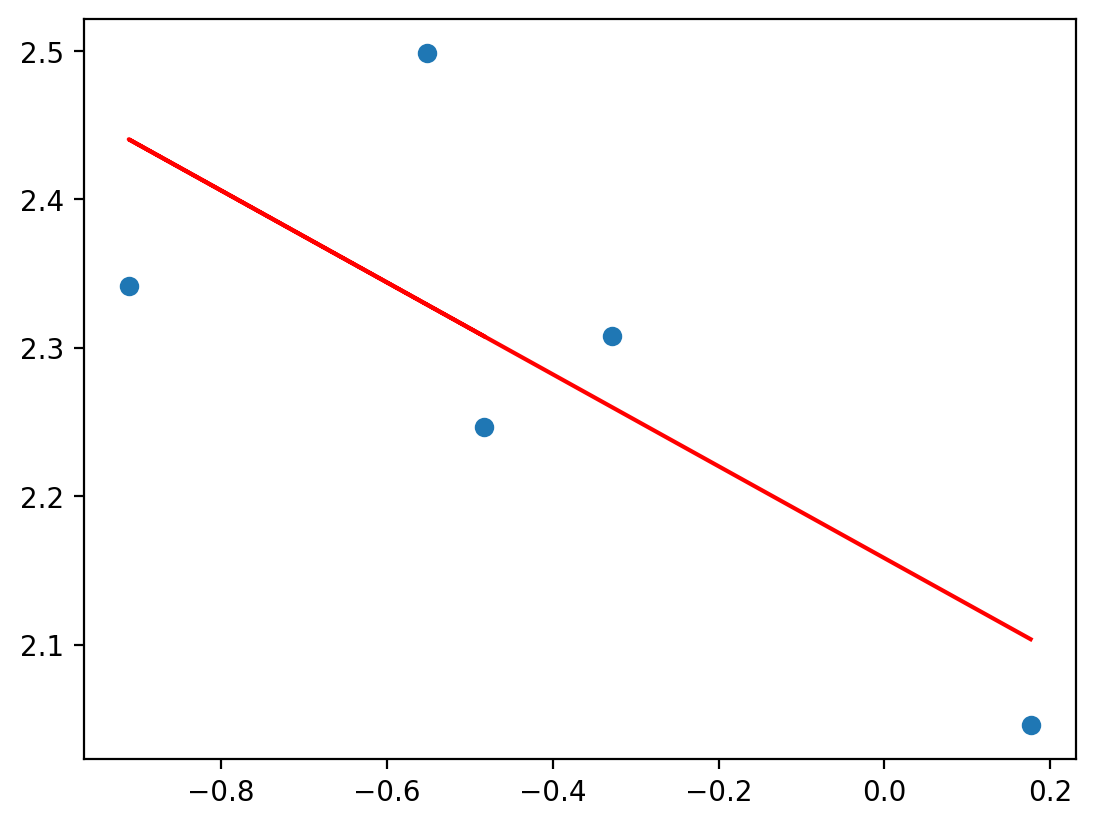

In [ ]:
from scipy.stats import linregress
plt.scatter(LynnW_score_soil['6VPCA Score 4'], LynnW_shallow['%C'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 4'].astype(float), LynnW_shallow['%C'].astype(float))
plt.plot(LynnW_score_soil['6VPCA Score 4'], intercept + slope*LynnW_score_soil['6VPCA Score 4'], 'r', label='fitted line')

r_value**2

0.24173299199585102

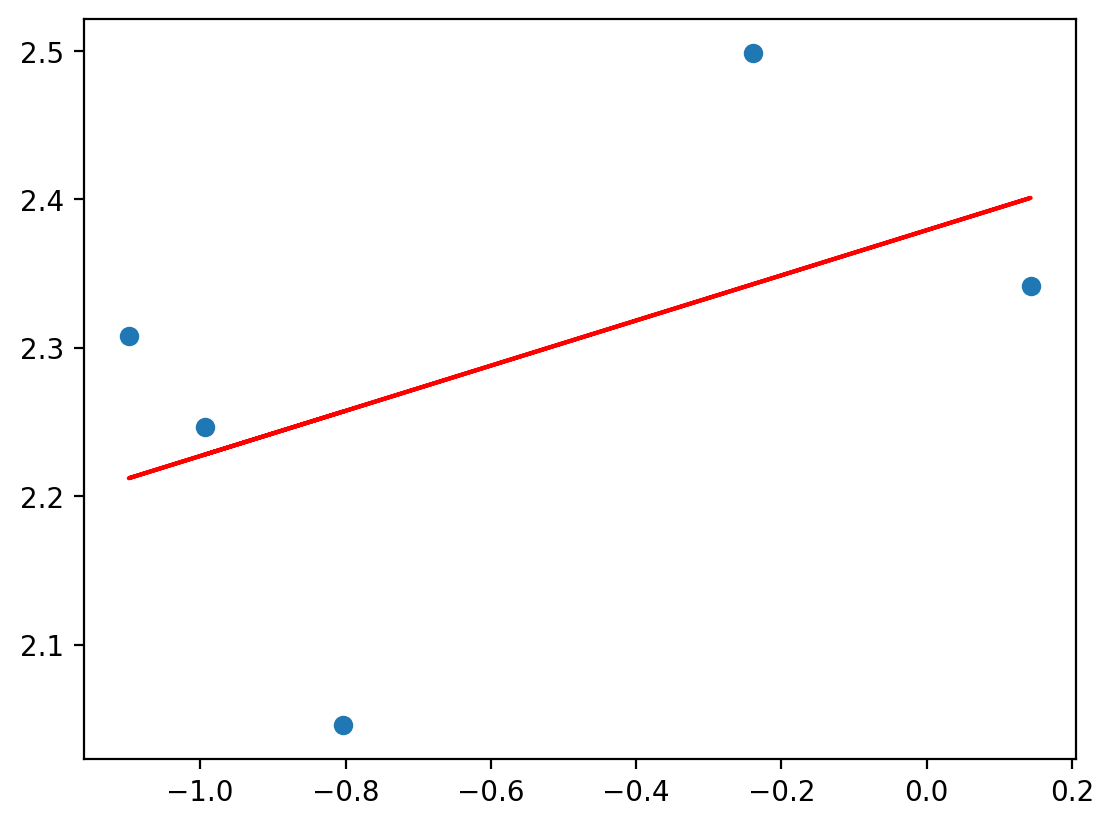

In [ ]:
from scipy.stats import linregress
plt.scatter(LynnW_score_soil['6VPCA Score 5'], LynnW_shallow['%C'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 5'].astype(float), LynnW_shallow['%C'].astype(float))
plt.plot(LynnW_score_soil['6VPCA Score 5'], intercept + slope*LynnW_score_soil['6VPCA Score 5'], 'r', label='fitted line')

r_value**2

0.30409899396228135

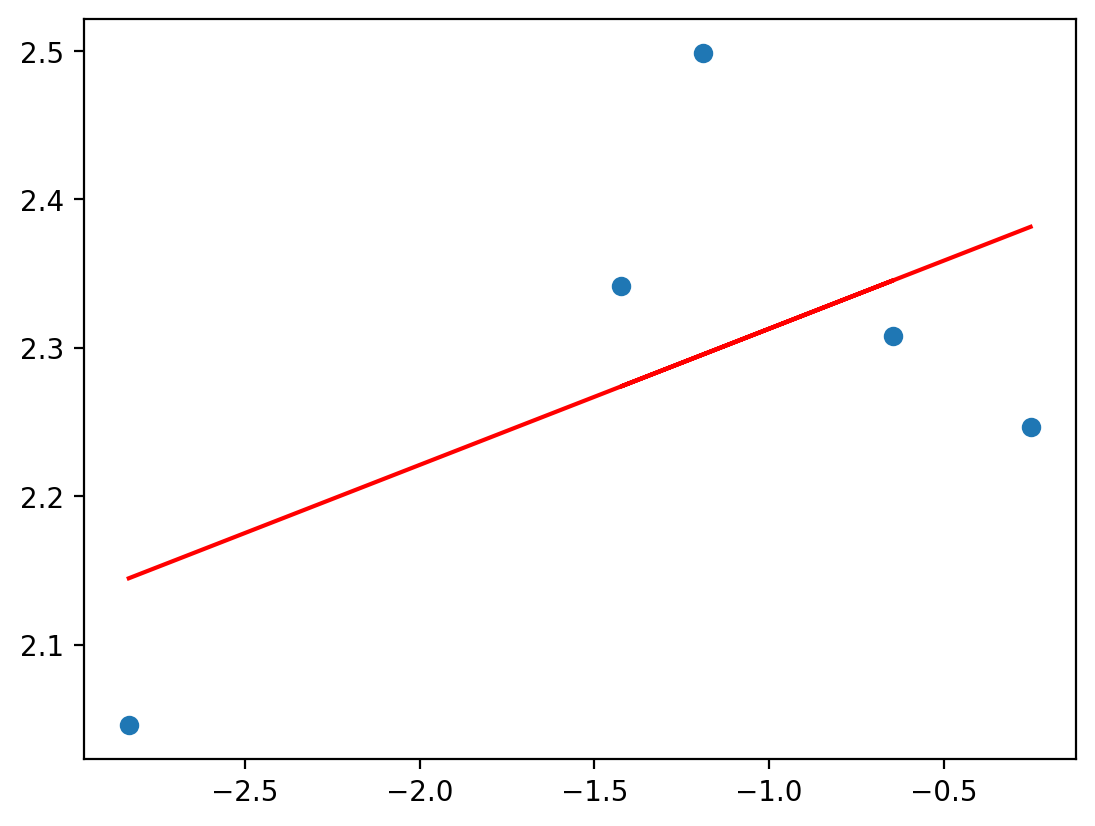

In [ ]:
from scipy.stats import linregress
plt.scatter(LynnW_score_soil['6VPCA Score 6'], LynnW_shallow['%C'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 6'].astype(float), LynnW_shallow['%C'].astype(float))
plt.plot(LynnW_score_soil['6VPCA Score 6'], intercept + slope*LynnW_score_soil['6VPCA Score 6'], 'r', label='fitted line')

r_value**2

0.6136335118883809

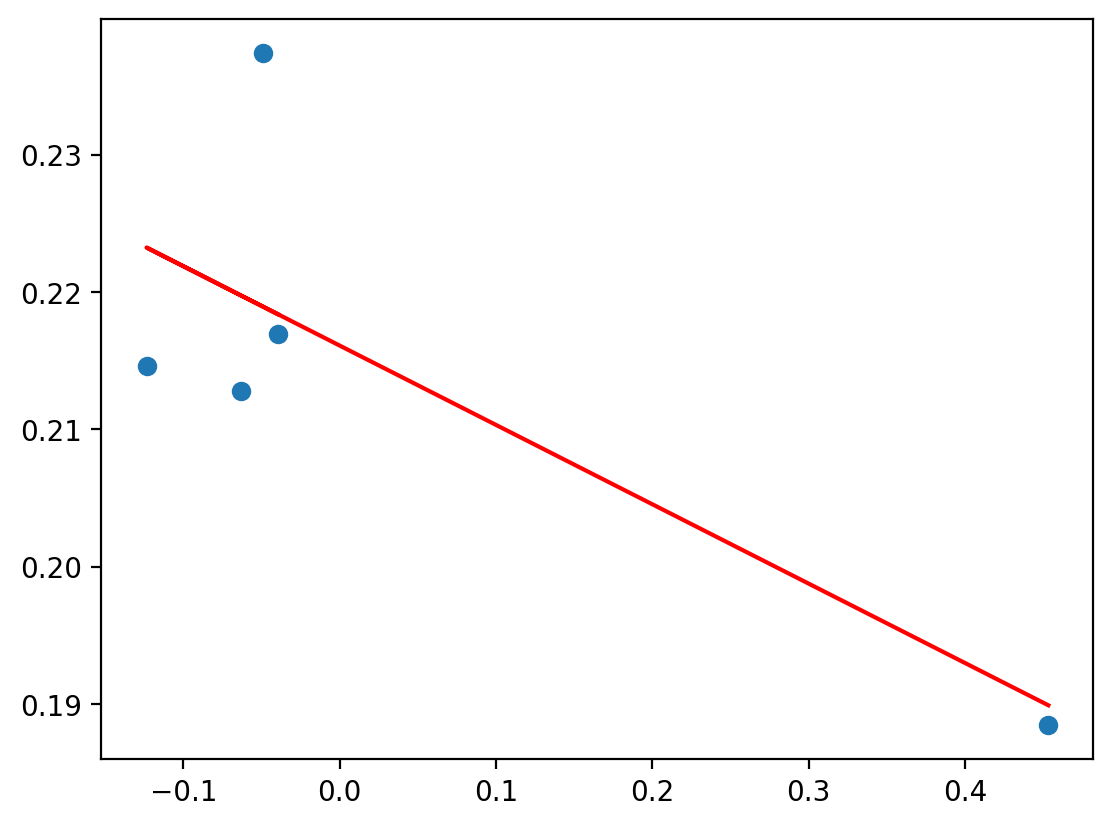

In [ ]:
from scipy.stats import linregress
plt.scatter(LynnW_score_soil['6VPCA Score 1'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 1'].astype(float), LynnW_shallow['%N'].astype(float))
plt.plot(LynnW_score_soil['6VPCA Score 1'], intercept + slope*LynnW_score_soil['6VPCA Score 1'], 'r', label='fitted line')

r_value**2

0.5768321000264246

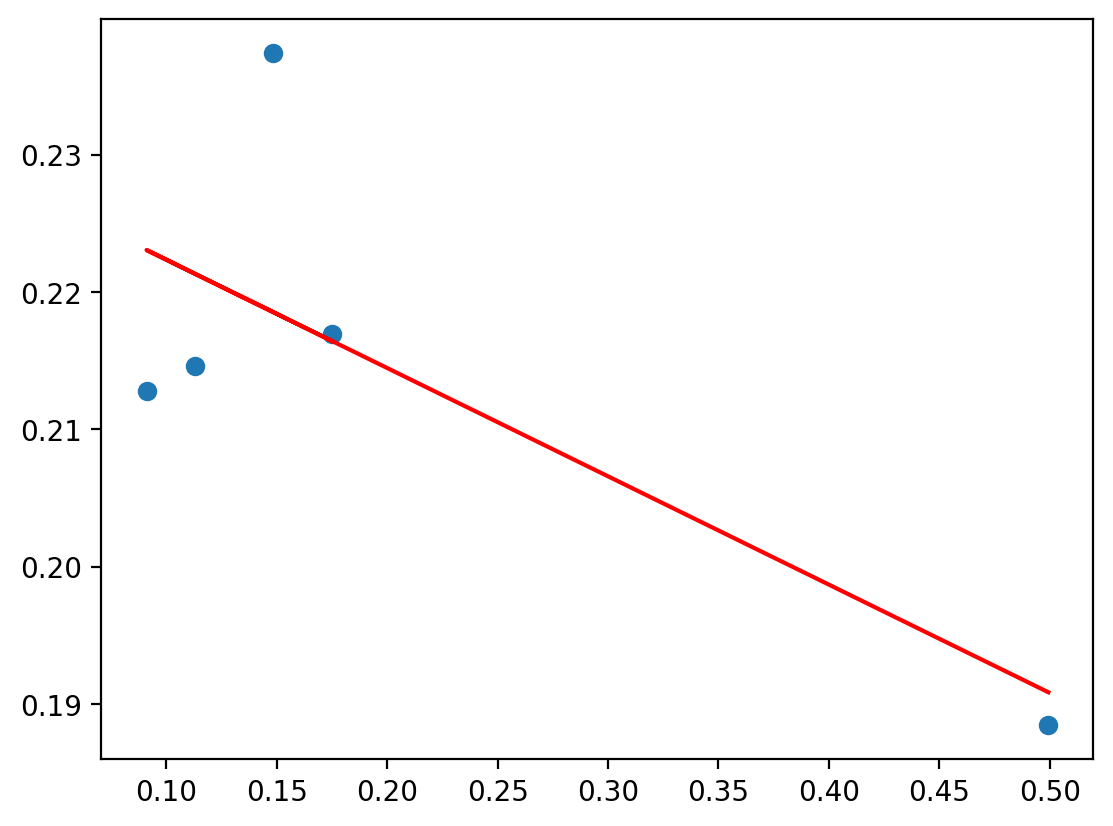

In [ ]:
from scipy.stats import linregress
plt.scatter(LynnW_score_soil['6VPCA Score 2'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 2'].astype(float), LynnW_shallow['%N'].astype(float))
plt.plot(LynnW_score_soil['6VPCA Score 2'], intercept + slope*LynnW_score_soil['6VPCA Score 2'], 'r', label='fitted line')

r_value**2

0.6282571968692348

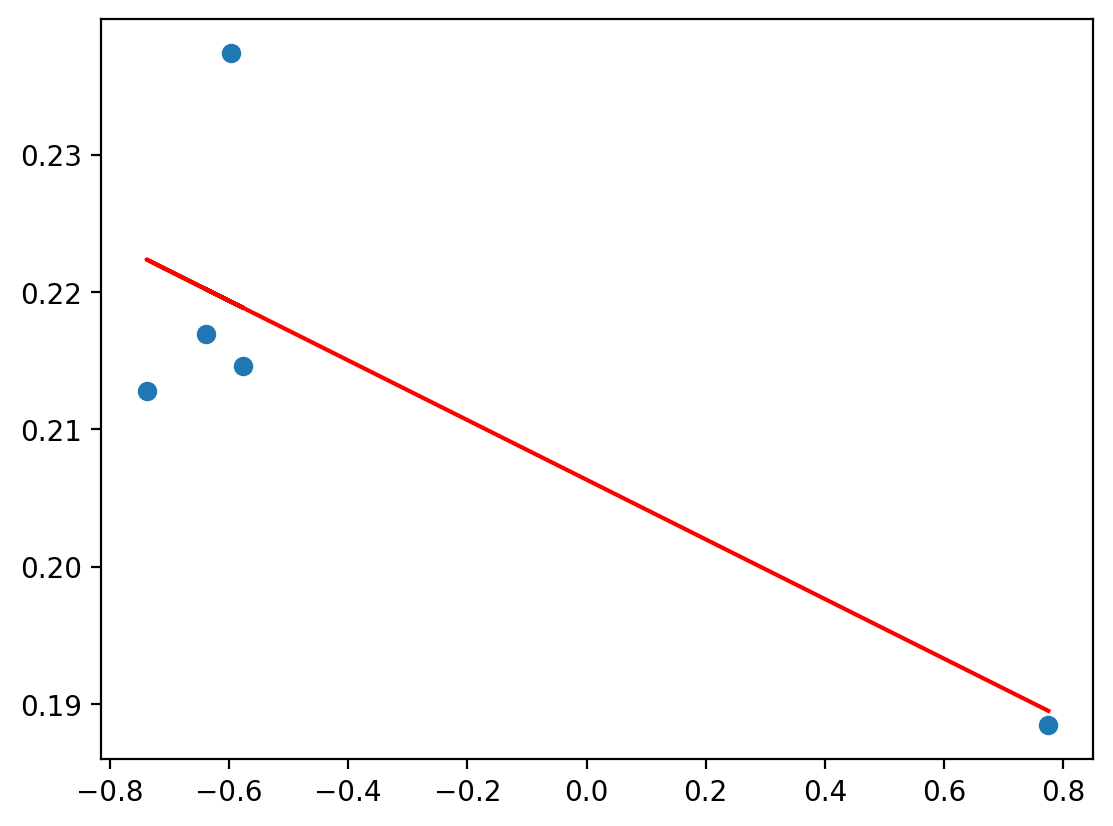

In [ ]:
from scipy.stats import linregress
plt.scatter(LynnW_score_soil['6VPCA Score 3'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 3'].astype(float), LynnW_shallow['%N'].astype(float))
plt.plot(LynnW_score_soil['6VPCA Score 3'], intercept + slope*LynnW_score_soil['6VPCA Score 3'], 'r', label='fitted line')

r_value**2

0.47080079925250445

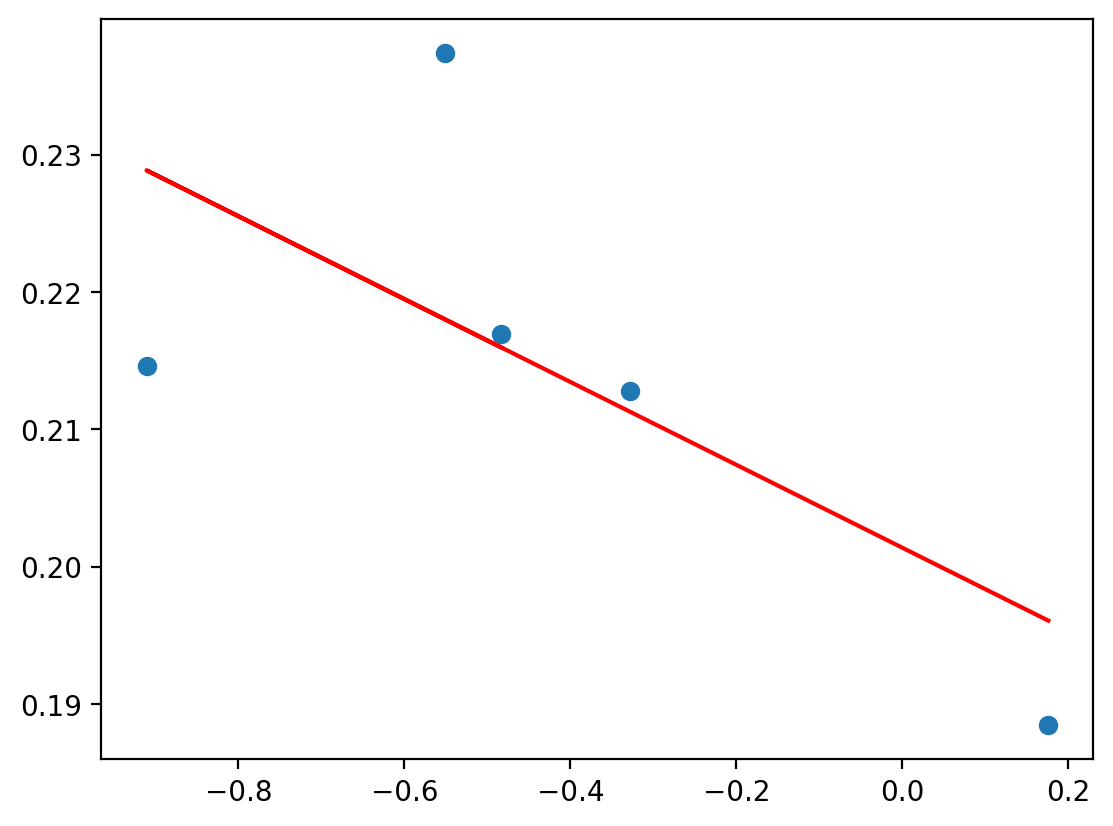

In [ ]:
from scipy.stats import linregress
plt.scatter(LynnW_score_soil['6VPCA Score 4'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 4'].astype(float), LynnW_shallow['%N'].astype(float))
plt.plot(LynnW_score_soil['6VPCA Score 4'], intercept + slope*LynnW_score_soil['6VPCA Score 4'], 'r', label='fitted line')

r_value**2

0.13477920266858393

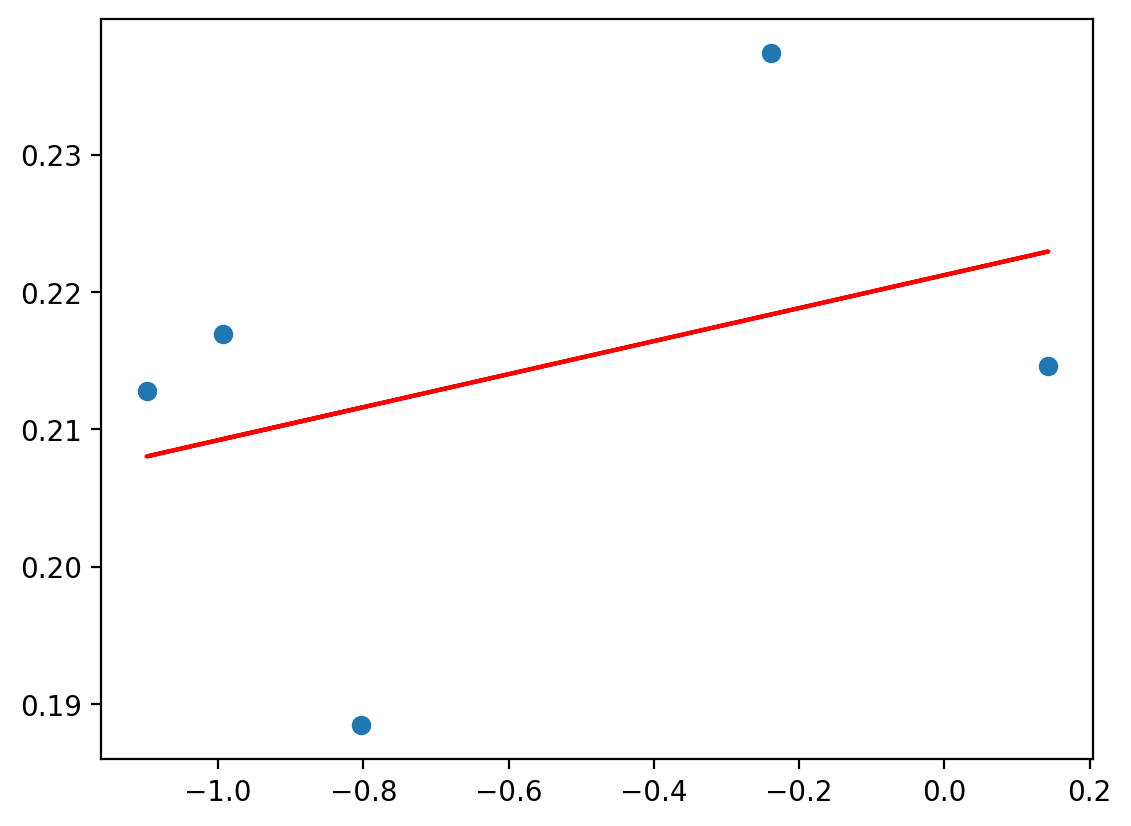

In [ ]:
from scipy.stats import linregress
plt.scatter(LynnW_score_soil['6VPCA Score 5'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 5'].astype(float), LynnW_shallow['%N'].astype(float))
plt.plot(LynnW_score_soil['6VPCA Score 5'], intercept + slope*LynnW_score_soil['6VPCA Score 5'], 'r', label='fitted line')

r_value**2

0.4087597090859375

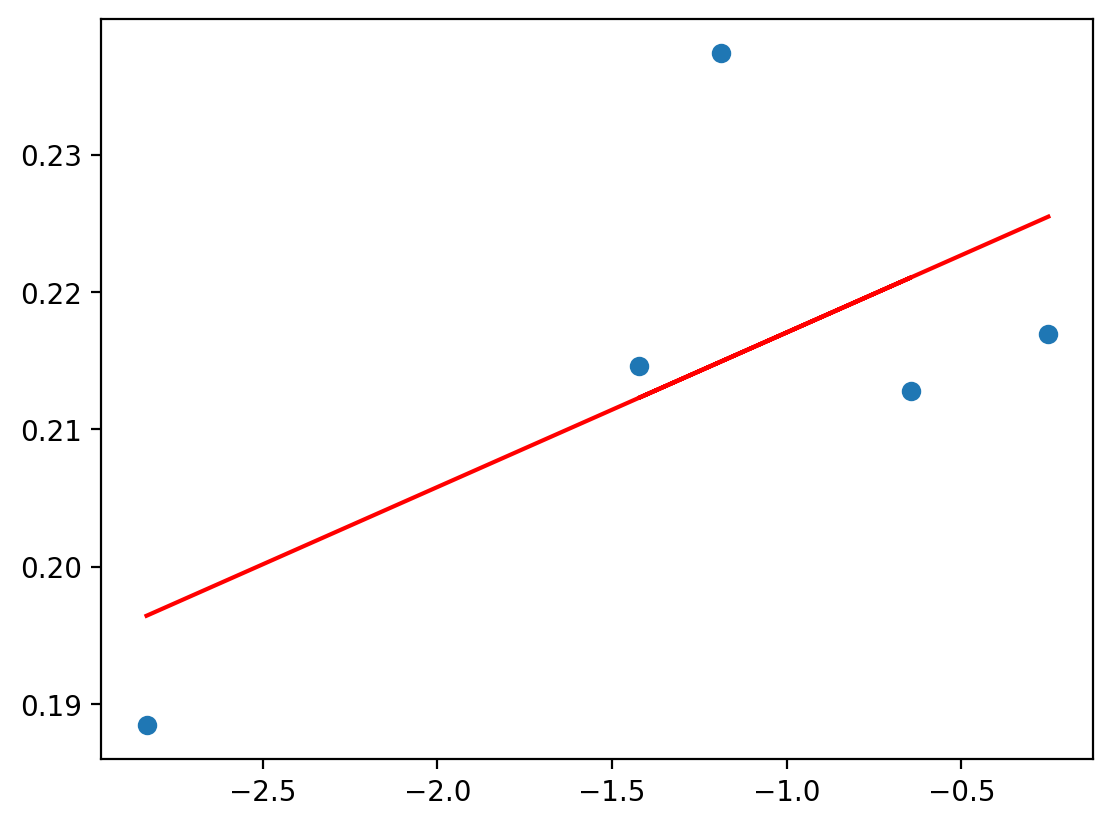

In [ ]:
from scipy.stats import linregress
plt.scatter(LynnW_score_soil['6VPCA Score 6'], LynnW_shallow['%N'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 6'].astype(float), LynnW_shallow['%N'].astype(float))
plt.plot(LynnW_score_soil['6VPCA Score 6'], intercept + slope*LynnW_score_soil['6VPCA Score 6'], 'r', label='fitted line')

r_value**2

0.061085431364154535

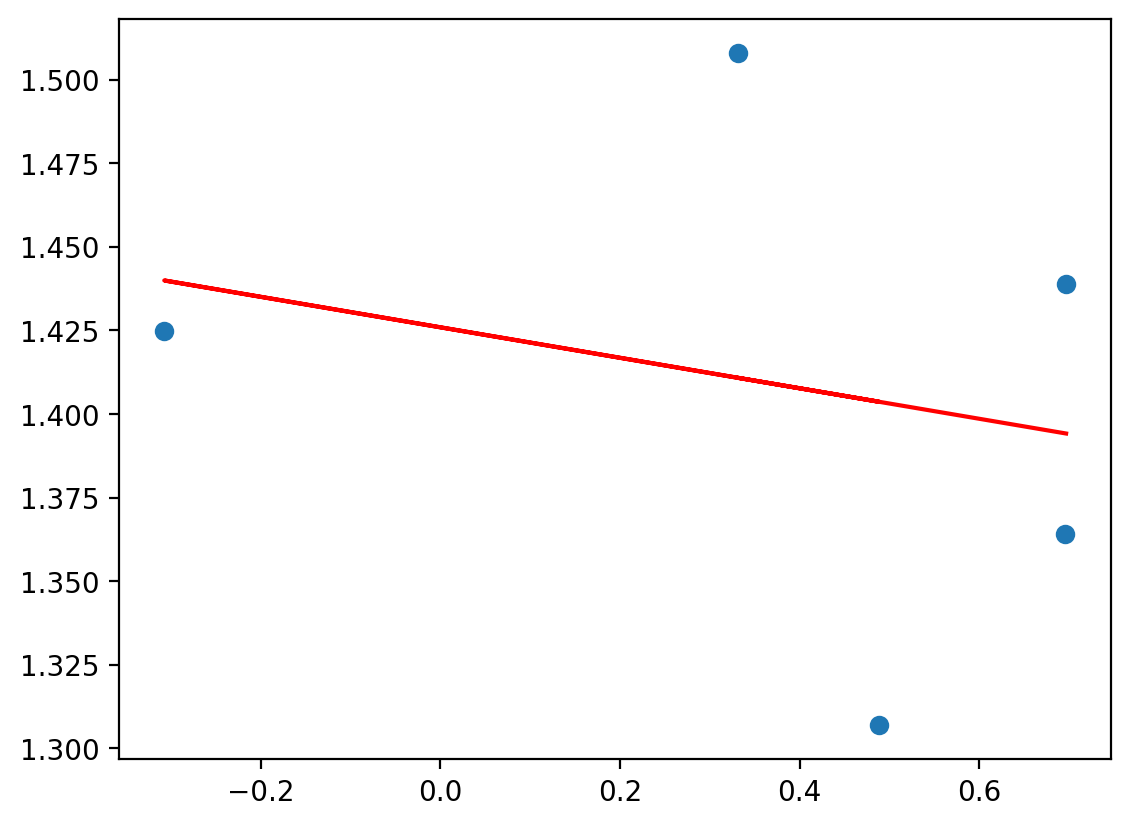

In [ ]:
from scipy.stats import linregress
plt.scatter(JB_score_soil['6VPCA Score 1'], JB_shallow['%C'])
slope, intercept, r_value, p_value, std_err = linregress(JB_score_soil['6VPCA Score 1'].astype(float), JB_shallow['%C'].astype(float))
plt.plot(JB_score_soil['6VPCA Score 1'], intercept + slope*JB_score_soil['6VPCA Score 1'], 'r', label='fitted line')

r_value**2

0.03771264483995542

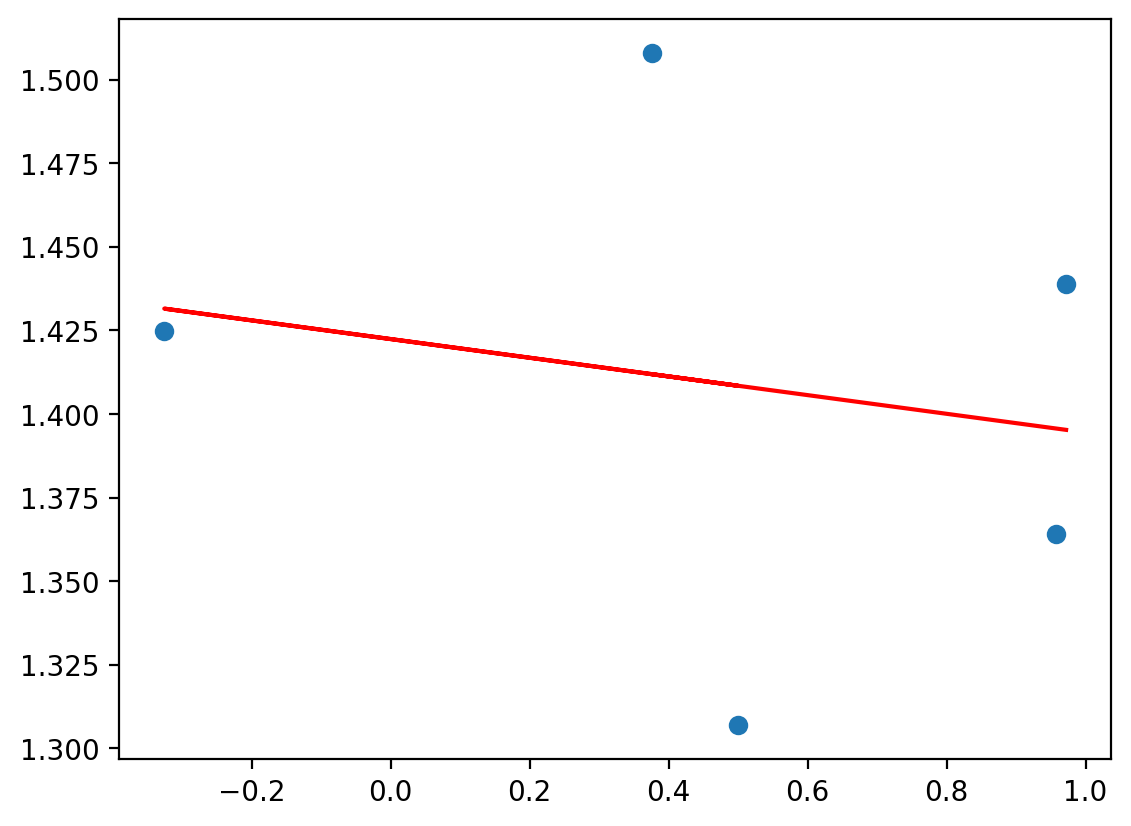

In [ ]:
from scipy.stats import linregress
plt.scatter(JB_score_soil['6VPCA Score 2'], JB_shallow['%C'])
slope, intercept, r_value, p_value, std_err = linregress(JB_score_soil['6VPCA Score 2'].astype(float), JB_shallow['%C'].astype(float))
plt.plot(JB_score_soil['6VPCA Score 2'], intercept + slope*JB_score_soil['6VPCA Score 2'], 'r', label='fitted line')

r_value**2

Text(0.5, 0, 'VPCA Score 6')

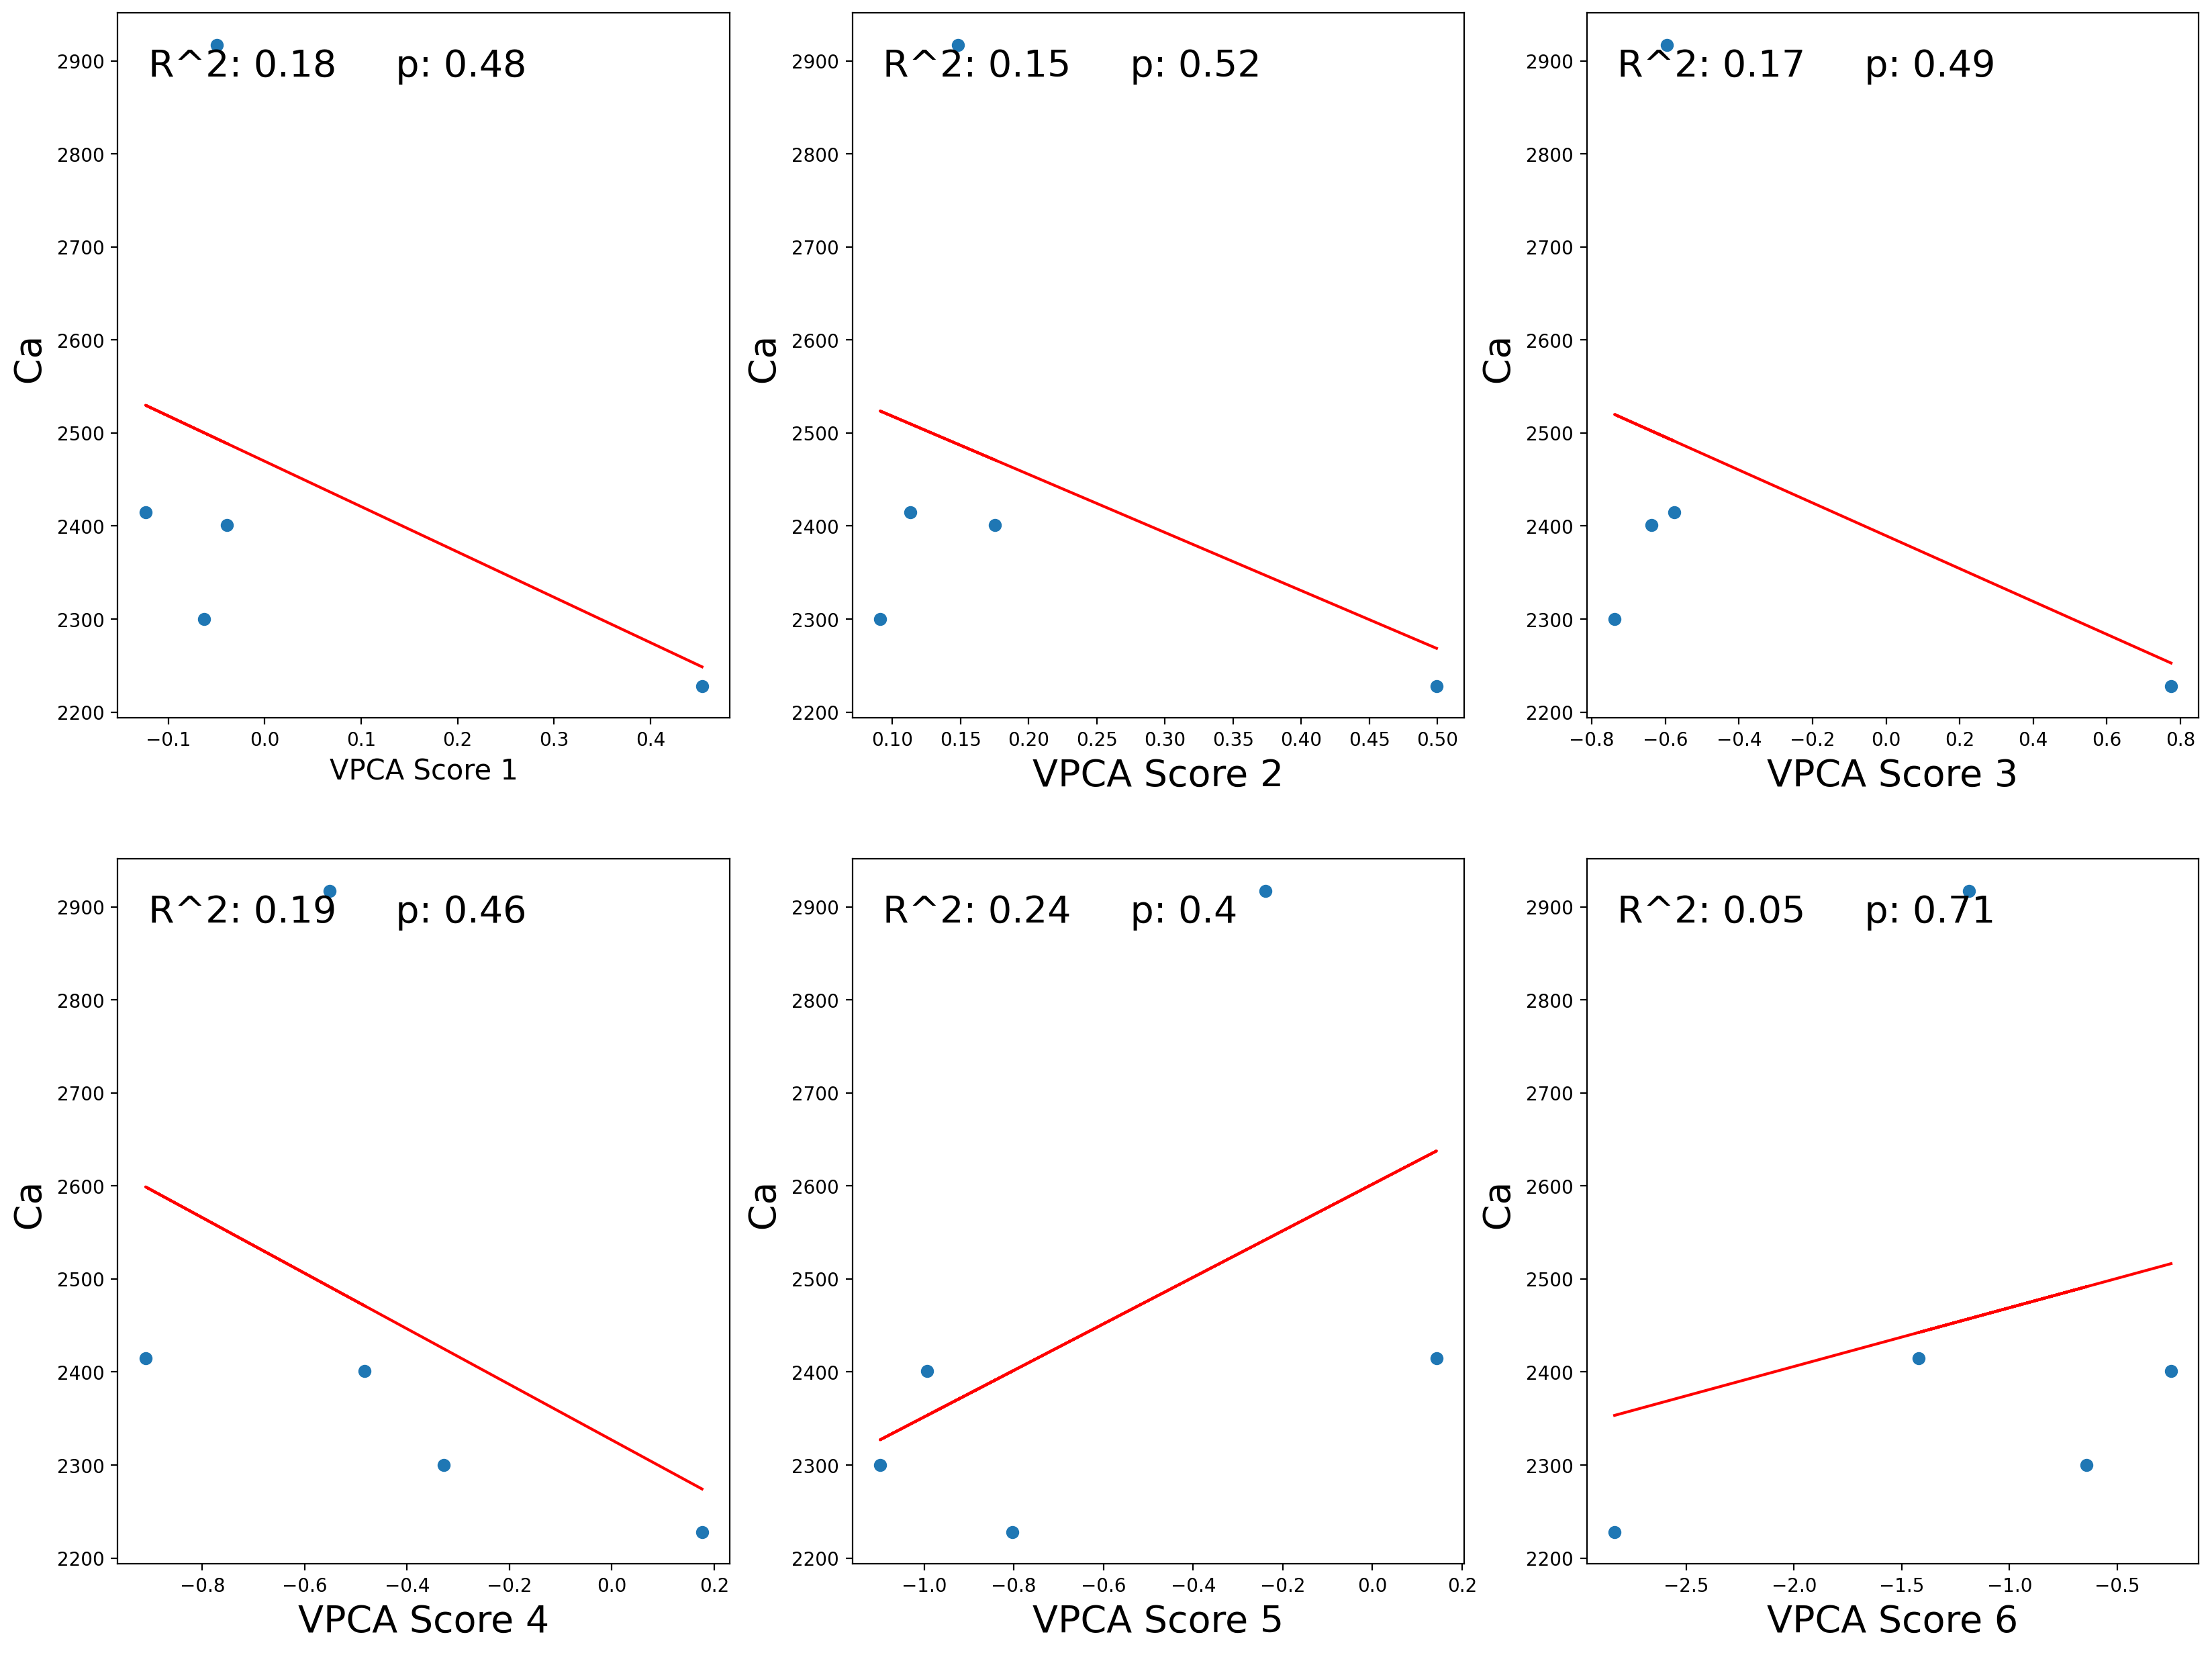

In [ ]:
from scipy.stats import linregress
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(2,3 , figsize= (20,15))
ax[0,0].scatter(LynnW_score_soil['6VPCA Score 1'], LynnW_shallow[' Ca'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 1'].astype(float), LynnW_shallow[' Ca'].astype(float))
ax[0,0].plot(LynnW_score_soil['6VPCA Score 1'], intercept + slope*LynnW_score_soil['6VPCA Score 1'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,0].text(0.05, 0.95, text1, transform=ax[0,0].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,0].set_ylabel(' Ca',fontsize=20)
ax[0,0].set_xlabel('VPCA Score 1',fontsize=15)




ax[0,1].scatter(LynnW_score_soil['6VPCA Score 2'], LynnW_shallow[' Ca'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 2'].astype(float), LynnW_shallow[' Ca'].astype(float))
ax[0,1].plot(LynnW_score_soil['6VPCA Score 2'], intercept + slope*LynnW_score_soil['6VPCA Score 2'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,1].text(0.05, 0.95, text1, transform=ax[0,1].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,1].set_ylabel(' Ca',fontsize=20)
ax[0,1].set_xlabel('VPCA Score 2',fontsize=20)


ax[0,2].scatter(LynnW_score_soil['6VPCA Score 3'], LynnW_shallow[' Ca'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 3'].astype(float), LynnW_shallow[' Ca'].astype(float))
ax[0,2].plot(LynnW_score_soil['6VPCA Score 3'], intercept + slope*LynnW_score_soil['6VPCA Score 3'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,2].text(0.05, 0.95, text1, transform=ax[0,2].transAxes,
     fontsize=20, verticalalignment='top')
ax[0,2].set_ylabel(' Ca',fontsize=20)
ax[0,2].set_xlabel('VPCA Score 3',fontsize=20)

ax[1,0].scatter(LynnW_score_soil['6VPCA Score 4'], LynnW_shallow[' Ca'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 4'].astype(float), LynnW_shallow[' Ca'].astype(float))
ax[1,0].plot(LynnW_score_soil['6VPCA Score 4'], intercept + slope*LynnW_score_soil['6VPCA Score 4'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,0].text(0.05, 0.95, text1, transform=ax[1,0].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,0].set_ylabel(' Ca',fontsize=20)
ax[1,0].set_xlabel('VPCA Score 4',fontsize=20)


ax[1,1].scatter(LynnW_score_soil['6VPCA Score 5'], LynnW_shallow[' Ca'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 5'].astype(float), LynnW_shallow[' Ca'].astype(float))
ax[1,1].plot(LynnW_score_soil['6VPCA Score 5'], intercept + slope*LynnW_score_soil['6VPCA Score 5'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,1].text(0.05, 0.95, text1, transform=ax[1,1].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,1].set_ylabel(' Ca',fontsize=20)
ax[1,1].set_xlabel('VPCA Score 5',fontsize=20)


ax[1,2].scatter(LynnW_score_soil['6VPCA Score 6'], LynnW_shallow[' Ca'])
slope, intercept, r_value, p_value, std_err = linregress(LynnW_score_soil['6VPCA Score 6'].astype(float), LynnW_shallow[' Ca'].astype(float))
ax[1,2].plot(LynnW_score_soil['6VPCA Score 6'], intercept + slope*LynnW_score_soil['6VPCA Score 6'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,2].text(0.05, 0.95, text1, transform=ax[1,2].transAxes,
     fontsize=20, verticalalignment='top')
ax[1,2].set_ylabel(' Ca',fontsize=20)
ax[1,2].set_xlabel('VPCA Score 6',fontsize=20)